In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3)
pd.set_option('mode.chained_assignment', None)

** https://www.kaggle.com/jackdaoud/marketing-data **

In [2]:
df=pd.read_csv('marketing_data.csv')
df.sample(5)


ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
61    10623        1961      Master       Together  $48,330.00         0   
1567  10313        1975  Graduation        Married  $48,178.00         1   
1640   1513        1979    2n Cycle       Together  $60,839.00         1   
413    8207        1957    2n Cycle        Married  $53,233.00         0   
953    4756        1952    2n Cycle       Divorced  $63,998.00         0   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
61           1    11/15/13        2        28  ...                  3   
1567         1    10/28/12       69       159  ...                  4   
1640         1     8/28/12       72       600  ...                 12   
413          1     3/18/14       18        28  ...                  3   
953          0    12/20/13       42       176  ...                 11   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
61                    5             0             0             0   
1567                  8             0             0             0   
1640                  8             0             0             0   
413                   4             0             0             0   
953                   4             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Response  Complain  Country  
61               0             0         0         0       SP  
1567             0             0         0         0       SP  
1640             0             0         0         0       SP  
413              0             0         0         0       CA  
953              0             0         1         0       SP  

[5 rows x 28 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [4]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [5]:
for col in ['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country']:
    print(f'-------{col}-------')
    print(df[col].unique())
    print('________________________'*3)

-------ID-------
[ 1826     1 10476 ...    22   528  4070]
________________________________________________________________________
-------Year_Birth-------
[1970 1961 1958 1967 1989 1954 1947 1979 1959 1981 1969 1977 1960 1966
 1976 1965 1956 1975 1971 1986 1972 1974 1990 1987 1984 1968 1955 1983
 1973 1978 1952 1962 1964 1982 1963 1957 1980 1945 1949 1948 1953 1946
 1985 1992 1944 1951 1988 1950 1994 1993 1991 1893 1996 1995 1899 1943
 1941 1940 1900]
________________________________________________________________________
-------Education-------
['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']
________________________________________________________________________
-------Marital_Status-------
['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']
________________________________________________________________________
------- Income -------
['$84,835.00 ' '$57,091.00 ' '$67,267.00 ' ... '$46,310.00 ' '$65,819.00 '
 '$94,871.00 ']
________________________________

In [6]:
df.corr()

ID  Year_Birth   Kidhome  Teenhome   Recency  \
ID                   1.000000    0.000028  0.002406 -0.002580 -0.046524   
Year_Birth           0.000028    1.000000  0.230176 -0.352111 -0.019871   
Kidhome              0.002406    0.230176  1.000000 -0.036133  0.008827   
Teenhome            -0.002580   -0.352111 -0.036133  1.000000  0.016198   
Recency             -0.046524   -0.019871  0.008827  0.016198  1.000000   
MntWines            -0.022878   -0.157773 -0.496297  0.004846  0.016064   
MntFruits            0.004600   -0.017917 -0.372581 -0.176764 -0.004306   
MntMeatProducts     -0.004437   -0.030872 -0.437129 -0.261160  0.023056   
MntFishProducts     -0.024475   -0.041625 -0.387644 -0.204187  0.001079   
MntSweetProducts    -0.007642   -0.018133 -0.370673 -0.162475  0.022670   
MntGoldProds        -0.013438   -0.061818 -0.349595 -0.021725  0.016693   
NumDealsPurchases   -0.037166   -0.060846  0.221798  0.387741 -0.001098   
NumWebPurchases     -0.018924   -0.145040 -0.361647  0.155500 -0.010726   
NumCatalogPurchases -0.003440   -0.121275 -0.502237 -0.110769  0.025110   
NumStorePurchases   -0.014927   -0.128272 -0.499683  0.050695  0.000799   
NumWebVisitsMonth   -0.007446    0.121139  0.447846  0.134884 -0.021445   
AcceptedCmp3        -0.036040    0.061774  0.014674 -0.042677 -0.032991   
AcceptedCmp4        -0.025387   -0.060510 -0.161600  0.038886  0.018826   
AcceptedCmp5        -0.007517    0.007123 -0.205634 -0.191050  0.000129   
AcceptedCmp1        -0.021614   -0.005930 -0.172339 -0.140090 -0.019283   
AcceptedCmp2        -0.015061   -0.006539 -0.081716 -0.015605 -0.001781   
Response            -0.021968    0.021325 -0.080008 -0.154446 -0.198437   
Complain             0.033883   -0.030128  0.040207  0.003138  0.013231   

                     MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
ID                  -0.022878   0.004600        -0.004437        -0.024475   
Year_Birth          -0.157773  -0.017917        -0.030872        -0.041625   
Kidhome             -0.496297  -0.372581        -0.437129        -0.387644   
Teenhome             0.004846  -0.176764        -0.261160        -0.204187   
Recency              0.016064  -0.004306         0.023056         0.001079   
MntWines             1.000000   0.389637         0.562667         0.399753   
MntFruits            0.389637   1.000000         0.543105         0.594804   
MntMeatProducts      0.562667   0.543105         1.000000         0.568402   
MntFishProducts      0.399753   0.594804         0.568402         1.000000   
MntSweetProducts     0.386581   0.567164         0.523846         0.579870   
MntGoldProds         0.387516   0.392995         0.350609         0.422875   
NumDealsPurchases    0.010940  -0.132114        -0.122415        -0.139361   
NumWebPurchases      0.542265   0.296735         0.293761         0.293681   
NumCatalogPurchases  0.635226   0.487917         0.723827         0.534478   
NumStorePurchases    0.642100   0.461758         0.479659         0.459855   
NumWebVisitsMonth   -0.320653  -0.418383        -0.539470        -0.446003   
AcceptedCmp3         0.062202   0.014727         0.018272         0.000357   
AcceptedCmp4         0.373286   0.010152         0.102912         0.016843   
AcceptedCmp5         0.472613   0.215833         0.373769         0.199578   
AcceptedCmp1         0.354133   0.194748         0.309761         0.260762   
AcceptedCmp2         0.205907  -0.009773         0.043033         0.002577   
Response             0.247254   0.125289         0.236335         0.111331   
Complain            -0.039007  -0.005166        -0.023483        -0.020953   

                     MntSweetProducts  ...  NumCatalogPurchases  \
ID                          -0.007642  ...            -0.003440   
Year_Birth                  -0.018133  ...            -0.121275   
Kidhome                     -0.370673  ...            -0.502237   
Teenhome                    -0.162475  ...            -0.110769   
Recency           

In [7]:
df.describe()

ID   Year_Birth      Kidhome     Teenhome      Recency  \
count   2240.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804     0.444196     0.506250    49.109375   
std     3246.662198    11.984069     0.538398     0.544538    28.962453   
min        0.000000  1893.000000     0.000000     0.000000     0.000000   
25%     2828.250000  1959.000000     0.000000     0.000000    24.000000   
50%     5458.500000  1970.000000     0.000000     0.000000    49.000000   
75%     8427.750000  1977.000000     1.000000     1.000000    74.000000   
max    11191.000000  1996.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2240.000000  2240.000000      2240.000000      2240.000000   
mean    303.935714    26.302232       166.950000        37.525446   
std     336.597393    39.773434       225.715373        54.628979   
min       0.000000     0.000000         0.000000         0.000000   
25%      23.750000     1.000000        16.000000         3.000000   
50%     173.500000     8.000000        67.000000        12.000000   
75%     504.250000    33.000000       232.000000        50.000000   
max    1493.000000   199.000000      1725.000000       259.000000   

       MntSweetProducts  ...  NumCatalogPurchases  NumStorePurchases  \
count       2240.000000  ...          2240.000000        2240.000000   
mean          27.062946  ...             2.662054           5.790179   
std           41.280498  ...             2.923101           3.250958   
min            0.000000  ...             0.000000           0.000000   
25%            1.000000  ...             0.000000           3.000000   
50%            8.000000  ...             2.000000           5.000000   
75%           33.000000  ...             4.000000           8.000000   
max          263.000000  ...            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2240.000000   2240.000000   2240.000000   2240.000000   
mean            5.316518      0.072768      0.074554      0.072768   
std             2.426645      0.259813      0.262728      0.259813   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Response     Complain  
count   2240.000000   2240.000000  2240.000000  2240.000000  
mean       0.064286      0.013393     0.149107     0.009375  
std        0.245316      0.114976     0.356274     0.096391  
min        0.000000      0.000000     0.000000     0.000000  
25%        0.000000      0.000000     0.000000     0.000000  
50%        0.000000      0.000000     0.000000     0.000000  
75%        0.000000      0.000000     0.000000     0.000000  
max        1.000000      1.000000     1.000000     1.000000  

[8 rows x 23 columns]

In [8]:
df['Country'].value_counts()

SP     1095
SA      337
CA      268
AUS     160
IND     148
GER     120
US      109
ME        3
Name: Country, dtype: int64

In [9]:
df.sample(4)

ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
2164    24        1960      Master       Together  $17,144.00         1   
1389   640        1951  Graduation        Married  $57,304.00         0   
1060   880        1966       Basic       Together  $22,634.00         0   
273   5892        1980  Graduation        Married  $34,968.00         1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
2164         1     2/15/14       96        18  ...                  4   
1389         1     3/11/13       61       356  ...                 10   
1060         0     1/16/13       47         2  ...                  2   
273          0     4/10/13       11       158  ...                  5   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
2164                  7             0             0             0   
1389                  5             0             0             0   
1060                  8             0             0             0   
273                   7             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Response  Complain  Country  
2164             0             0         0         0       SA  
1389             0             0         0         0       SP  
1060             0             0         0         0       SP  
273              0             0         0         0       SA  

[4 rows x 28 columns]

## Data Analysis

### Are there any useful variables that you can engineer with the given data?

In [10]:
 df['totalpurchases']=(df['MntWines'])+(df['MntFruits'])+(df['MntMeatProducts'])+(df['MntFishProducts'])+(df['MntSweetProducts'])+(df['MntGoldProds'])

In [11]:
df['Totalkids'] = df['Kidhome'] + df['Teenhome']

In [12]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%m/%d/%y', errors='coerce')
df.head()

ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
0   1826        1970  Graduation       Divorced  $84,835.00         0   
1      1        1961  Graduation         Single  $57,091.00         0   
2  10476        1958  Graduation        Married  $67,267.00         0   
3   1386        1967  Graduation       Together  $32,474.00         1   
4   5371        1989  Graduation         Single  $21,474.00         1   

   Teenhome Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  AcceptedCmp4  \
0         0  2014-06-16        0       189  ...             0             0   
1         0  2014-06-15        0       464  ...             0             0   
2         1  2014-05-13        0       134  ...             0             0   
3         1  2014-05-11        0        10  ...             0             0   
4         0  2014-04-08        0         6  ...             1             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Response  Complain  Country  \
0             0             0             0         1         0       SP   
1             0             0             1         1         0       CA   
2             0             0             0         0         0       US   
3             0             0             0         0         0      AUS   
4             0             0             0         1         0       SP   

   totalpurchases  Totalkids  
0            1190          0  
1             577          0  
2             251          1  
3              11          2  
4              91          1  

[5 rows x 30 columns]

In [13]:
df['Year'] = df['Dt_Customer'].dt.year
df['Month'] = df['Dt_Customer'].dt.month
df['Day'] = df['Dt_Customer'].dt.day

In [14]:
def age_Customer(Customer):
    age_Customer = Customer['Year']  - Customer['Year_Birth']
    return age_Customer

In [15]:
df['age_Customer'] = df.apply(age_Customer, axis=1)
df

ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
0      1826        1970  Graduation       Divorced  $84,835.00         0   
1         1        1961  Graduation         Single  $57,091.00         0   
2     10476        1958  Graduation        Married  $67,267.00         0   
3      1386        1967  Graduation       Together  $32,474.00         1   
4      5371        1989  Graduation         Single  $21,474.00         1   
...     ...         ...         ...            ...          ...      ...   
2235  10142        1976         PhD       Divorced  $66,476.00         0   
2236   5263        1977    2n Cycle        Married  $31,056.00         1   
2237     22        1976  Graduation       Divorced  $46,310.00         1   
2238    528        1978  Graduation        Married  $65,819.00         0   
2239   4070        1969         PhD        Married  $94,871.00         0   

      Teenhome Dt_Customer  Recency  MntWines  ...  AcceptedCmp2  Response  \
0            0  2014-06-16        0       189  ...             0         1   
1            0  2014-06-15        0       464  ...             1         1   
2            1  2014-05-13        0       134  ...             0         0   
3            1  2014-05-11        0        10  ...             0         0   
4            0  2014-04-08        0         6  ...             0         1   
...        ...         ...      ...       ...  ...           ...       ...   
2235         1  2013-03-07       99       372  ...             0         0   
2236         0  2013-01-22       99         5  ...             0         0   
2237         0  2012-12-03       99       185  ...             0         0   
2238         0  2012-11-29       99       267  ...             0         0   
2239         2  2012-09-01       99       169  ...             0         1   

      Complain  Country  totalpurchases  Totalkids  Year  Month  Day  \
0            0       SP            1190          0  2014      6   16   
1            0       CA             577          0  2014      6   15   
2            0       US             251          1  2014      5   13   
3            0      AUS              11          2  2014      5   11   
4            0       SP              91          1  2014      4    8   
...        ...      ...             ...        ...   ...    ...  ...   
2235         0       US             689          1  2013      3    7   
2236         0       SP              55          1  2013      1   22   
2237         0       SP             309          1  2012     12    3   
2238         0      IND            1383          0  2012     11   29   
2239         0       CA            1078          2  2012      9    1   

      age_Customer  
0               44  
1               53  
2               56  
3               47  
4               25  
...            ...  
2235            37  
2236            36  
2237            36  
2238            34  
2239            43  

[2240 rows x 34 columns]

### Are there any variables that warrant transformations?

In [16]:
df['Income']=df[' Income '].str.replace("$","")
df['Income']=df['Income'].str.replace(",","")
df['Income']=df['Income'].astype(float)

<ipython-input-16-911ef1d07b49>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Income']=df[' Income '].str.replace("$","")


### Are there any null values ? How will you wrangle/handle ?


In [17]:
df.isna().sum()/len(df)*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
 Income                1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Response               0.000000
Complain               0.000000
Country                0.000000
totalpurchases         0.000000
Totalkids              0.000000
Year                   0.000000
Month   

In [18]:
df.drop([' Income '], axis=1, inplace=True)


In [19]:
 numerical=['Kidhome','Teenhome','MntWines','MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Income']

In [20]:
from sklearn.impute import SimpleImputer , KNNImputer

In [21]:
imputer = KNNImputer()

In [22]:
for fit in numerical:
    df[fit] = imputer.fit_transform(df[[fit]])

In [23]:
df.isna().sum()/len(df)*100

ID                     0.0
Year_Birth             0.0
Education              0.0
Marital_Status         0.0
Kidhome                0.0
Teenhome               0.0
Dt_Customer            0.0
Recency                0.0
MntWines               0.0
MntFruits              0.0
MntMeatProducts        0.0
MntFishProducts        0.0
MntSweetProducts       0.0
MntGoldProds           0.0
NumDealsPurchases      0.0
NumWebPurchases        0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
NumWebVisitsMonth      0.0
AcceptedCmp3           0.0
AcceptedCmp4           0.0
AcceptedCmp5           0.0
AcceptedCmp1           0.0
AcceptedCmp2           0.0
Response               0.0
Complain               0.0
Country                0.0
totalpurchases         0.0
Totalkids              0.0
Year                   0.0
Month                  0.0
Day                    0.0
age_Customer           0.0
Income                 0.0
dtype: float64

### Do you notice any patterns or anomalies in the data? Can you plot them?

In [24]:
df.describe()

ID   Year_Birth      Kidhome     Teenhome      Recency  \
count   2240.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804     0.444196     0.506250    49.109375   
std     3246.662198    11.984069     0.538398     0.544538    28.962453   
min        0.000000  1893.000000     0.000000     0.000000     0.000000   
25%     2828.250000  1959.000000     0.000000     0.000000    24.000000   
50%     5458.500000  1970.000000     0.000000     0.000000    49.000000   
75%     8427.750000  1977.000000     1.000000     1.000000    74.000000   
max    11191.000000  1996.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2240.000000  2240.000000      2240.000000      2240.000000   
mean    303.935714    26.302232       166.950000        37.525446   
std     336.597393    39.773434       225.715373        54.628979   
min       0.000000     0.000000         0.000000         0.000000   
25%      23.750000     1.000000        16.000000         3.000000   
50%     173.500000     8.000000        67.000000        12.000000   
75%     504.250000    33.000000       232.000000        50.000000   
max    1493.000000   199.000000      1725.000000       259.000000   

       MntSweetProducts  ...  AcceptedCmp2     Response     Complain  \
count       2240.000000  ...   2240.000000  2240.000000  2240.000000   
mean          27.062946  ...      0.013393     0.149107     0.009375   
std           41.280498  ...      0.114976     0.356274     0.096391   
min            0.000000  ...      0.000000     0.000000     0.000000   
25%            1.000000  ...      0.000000     0.000000     0.000000   
50%            8.000000  ...      0.000000     0.000000     0.000000   
75%           33.000000  ...      0.000000     0.000000     0.000000   
max          263.000000  ...      1.000000     1.000000     1.000000   

       totalpurchases    Totalkids         Year        Month          Day  \
count     2240.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean       605.798214     0.950446  2013.028125     6.467411    15.638393   
std        602.249288     0.751803     0.684554     3.486695     8.790680   
min          5.000000     0.000000  2012.000000     1.000000     1.000000   
25%         68.750000     0.000000  2013.000000     3.000000     8.000000   
50%        396.000000     1.000000  2013.000000     6.000000    16.000000   
75%       1045.500000     1.000000  2013.000000    10.000000    23.000000   
max       2525.000000     3.000000  2014.000000    12.000000    31.000000   

       age_Customer         Income  
count   2240.000000    2240.000000  
mean      44.222321   52247.251354  
std       12.022855   25037.797168  
min       16.000000    1730.000000  
25%       36.000000   35538.750000  
50%       43.000000   51741.500000  
75%       54.000000   68289.750000  
max      121.000000  666666.000000  

[8 rows x 30 columns]

<AxesSubplot:xlabel='Income'>

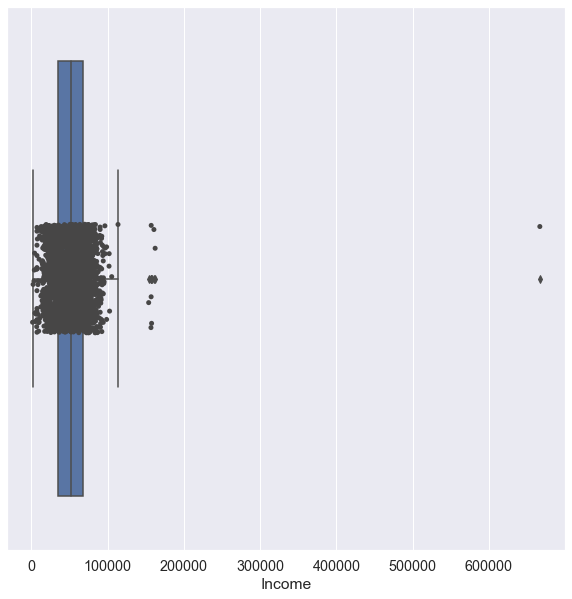

In [25]:
sns.boxplot(x='Income', data=df)
sns.stripplot(x='Income', data=df, color="#474646")

<AxesSubplot:xlabel='NumWebVisitsMonth'>

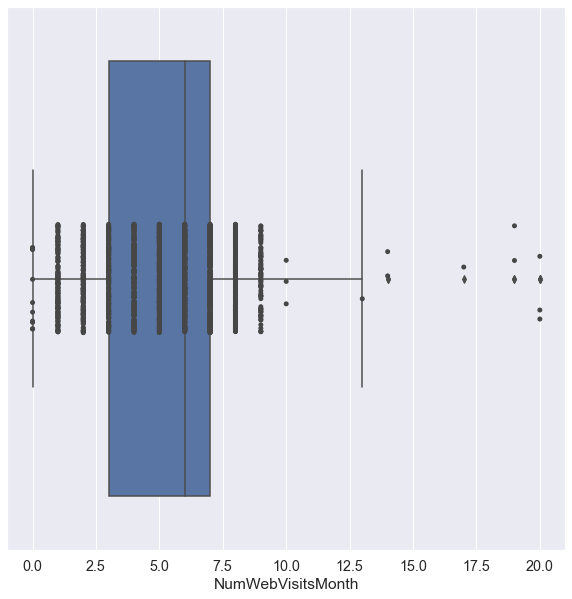

In [151]:
sns.boxplot(x='NumWebVisitsMonth', data=df)
sns.stripplot(x='NumWebVisitsMonth', data=df, color="#474646")

<AxesSubplot:xlabel='NumStorePurchases'>

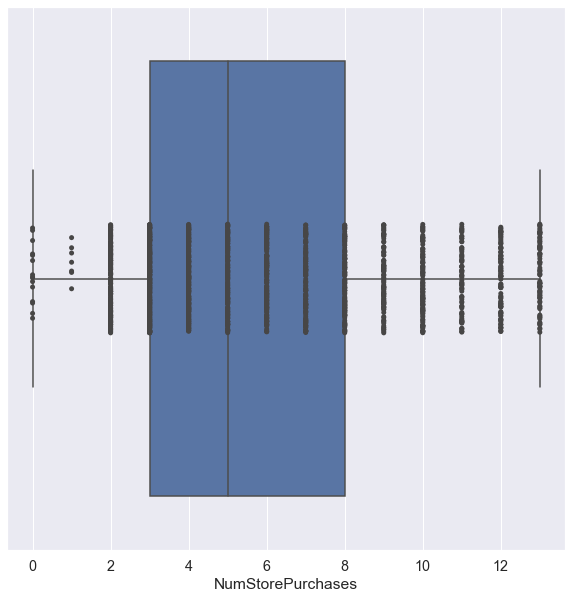

In [118]:
sns.boxplot(x='NumStorePurchases', data=df)
sns.stripplot(x='NumStorePurchases', data=df, color="#474646")

<AxesSubplot:xlabel='MntFruits'>

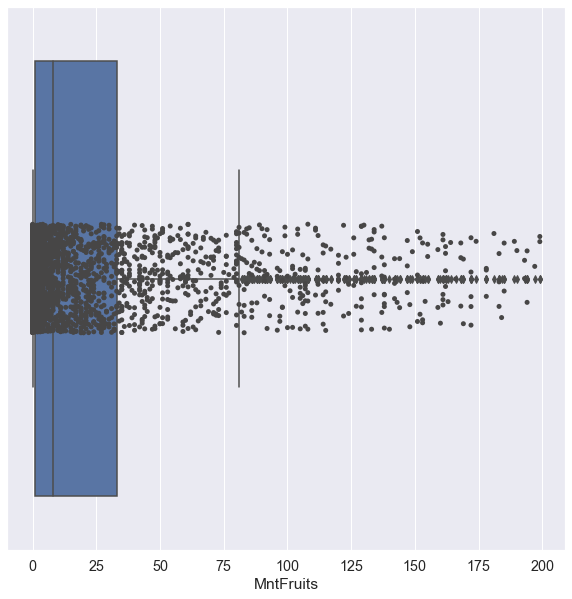

In [119]:
sns.boxplot(x='MntFruits', data=df)
sns.stripplot(x='MntFruits', data=df, color="#474646")

<AxesSubplot:xlabel='MntFishProducts'>

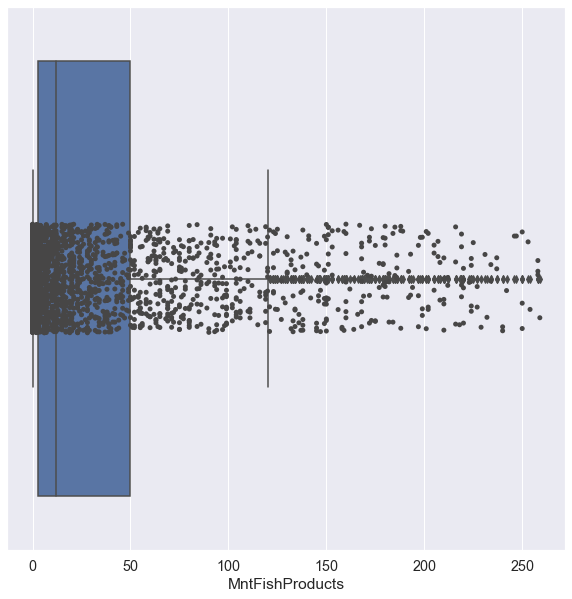

In [120]:
sns.boxplot(x='MntFishProducts', data=df)
sns.stripplot(x='MntFishProducts', data=df, color="#474646")

<AxesSubplot:xlabel='MntMeatProducts'>

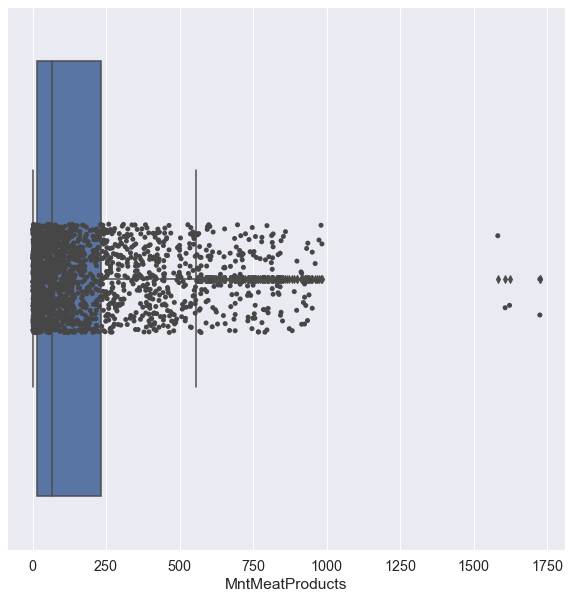

In [121]:
sns.boxplot(x='MntMeatProducts', data=df)
sns.stripplot(x='MntMeatProducts', data=df, color="#474646")

<AxesSubplot:xlabel='MntSweetProducts'>

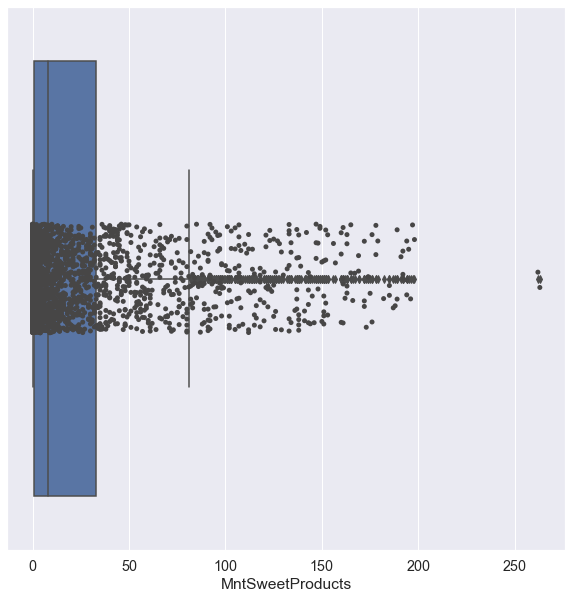

In [122]:
sns.boxplot(x='MntSweetProducts', data=df)
sns.stripplot(x='MntSweetProducts', data=df, color="#474646")

<AxesSubplot:xlabel='MntWines'>

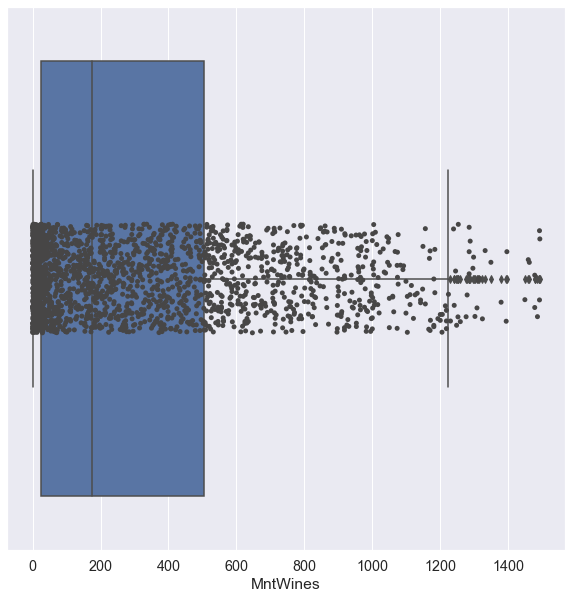

In [123]:
sns.boxplot(x='MntWines', data=df)
sns.stripplot(x='MntWines', data=df, color="#474646")

<AxesSubplot:xlabel='Year', ylabel='Income'>

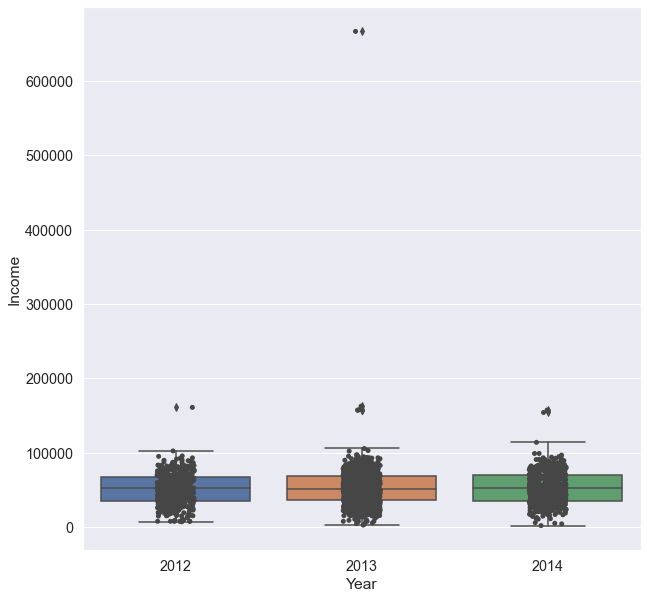

In [124]:
sns.boxplot(x='Year',y='Income', data=df)
sns.stripplot(x='Year',y='Income', data=df, color="#474646")

In [125]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'totalpurchases',
       'Totalkids', 'Year', 'Month', 'Day', 'age_Customer', 'Income'],
      dtype='object')

<AxesSubplot:xlabel='age_Customer'>

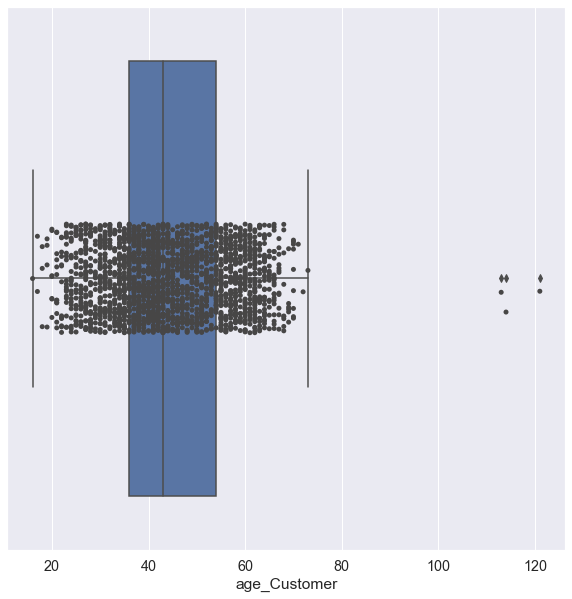

In [37]:
sns.boxplot(x='age_Customer', data=df)
sns.stripplot(x='age_Customer', data=df, color="#474646")

<AxesSubplot:xlabel='Year'>

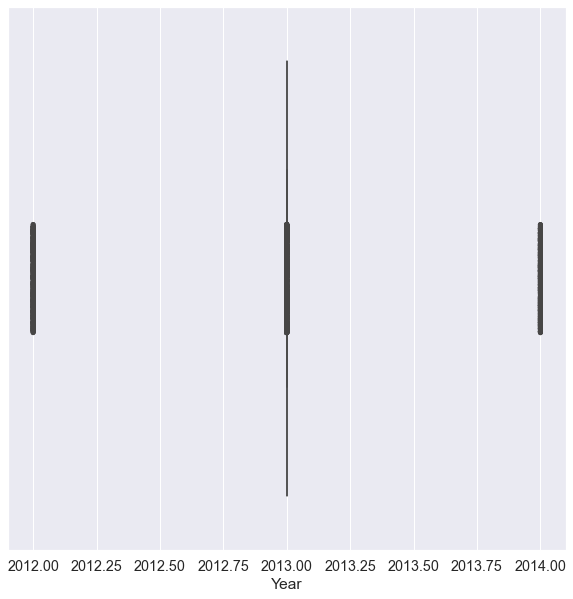

In [38]:
sns.boxplot(x='Year', data=df)
sns.stripplot(x='Year', data=df, color="#474646")

<AxesSubplot:xlabel='Month'>

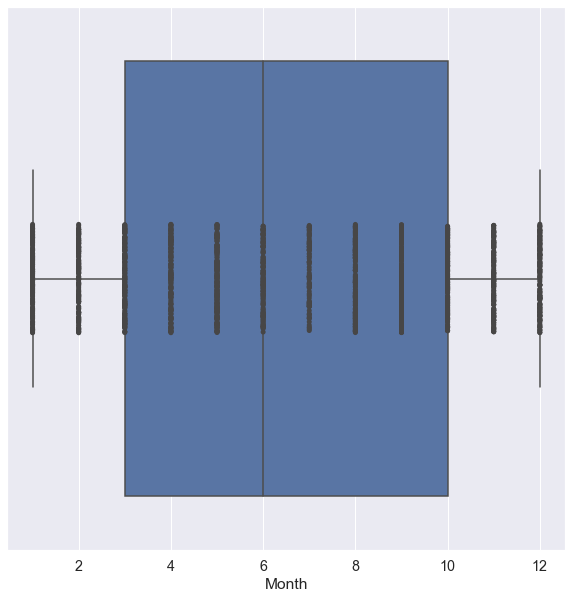

In [39]:
sns.boxplot(x='Month', data=df)
sns.stripplot(x='Month', data=df, color="#474646")

### What factors are significantly related to the number of store purchases?

<AxesSubplot:>

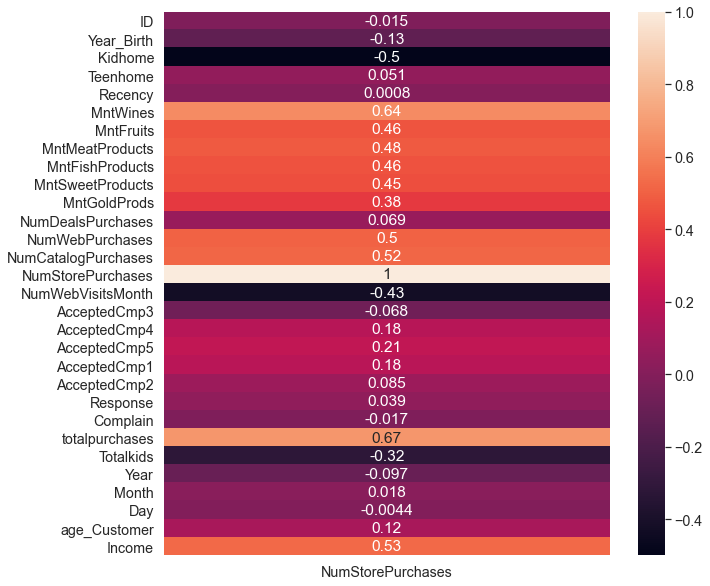

In [40]:
sns.heatmap(df.corr()[['NumStorePurchases']],annot=True)

#### The  factors are significantly related to the number of store purchases is 'MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds', 'NumWebPurchases','NumCatalogPurchases','Income','totalpurchases'

### Does US fare significantly better than the Rest of the World in terms of total purchases?

In [421]:
df.groupby("Country").sum()['totalpurchases'].transpose()

Country
AUS     89763
CA     168532
GER     74913
IND     79485
ME       3122
SA     211071
SP     662220
US      67882
Name: totalpurchases, dtype: int64

#### NO SP The best  

### Your supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 75.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 54.2% of the points

<AxesSubplot:xlabel='Income', ylabel='MntGoldProds'>

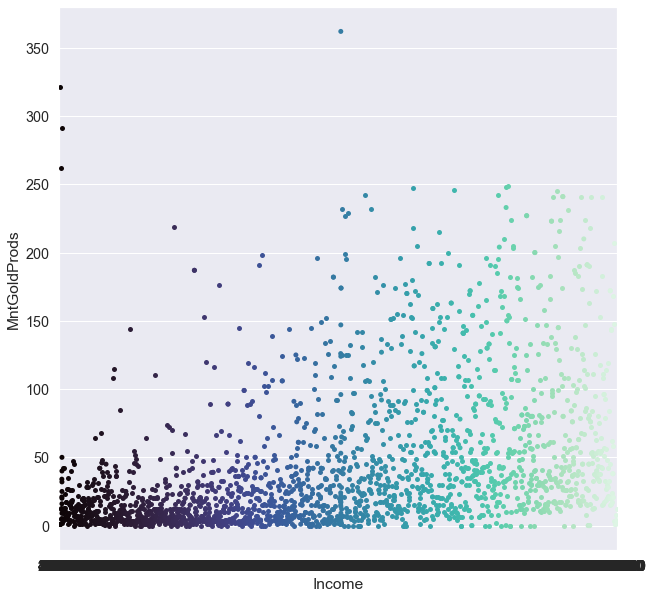

In [41]:
sns.swarmplot(x='Income',y='MntGoldProds',data=df,palette='mako')

In [ ]:
sns.jointplot(x='MntGoldProds', y='Income', data=df, height=8, kind='kde', cmap='rocket')

In [42]:
df[ (df['Year']==2012.0)]['MntGoldProds'].mean()

53.012145748987855

In [43]:
df[ (df['Year']==2012.0)][df['MntGoldProds']>53.012145748987855]['MntGoldProds'].sum()

<ipython-input-43-d51c83263e61>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[ (df['Year']==2012.0)][df['MntGoldProds']>53.012145748987855]['MntGoldProds'].sum()


18897.0

In [44]:
df[ (df['Year']==2013.0)]['MntGoldProds'].mean()

46.136248948696384

In [45]:
df[ (df['Year']==2013.0)][df['MntGoldProds']>46.136248948696384]['MntGoldProds'].sum()

<ipython-input-45-c503d2cefbf9>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[ (df['Year']==2013.0)][df['MntGoldProds']>46.136248948696384]['MntGoldProds'].sum()


41166.0

In [46]:
df[ (df['Year']==2014.0)]['MntGoldProds'].mean()

31.53500897666068

In [47]:
df[ (df['Year']==2014.0)][df['MntGoldProds']>31.53500897666068]['MntGoldProds'].sum()

<ipython-input-47-4eab880ba9f7>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[ (df['Year']==2014.0)][df['MntGoldProds']>31.53500897666068]['MntGoldProds'].sum()


13744.0

In [48]:
df[ (df['Year']==2013.0)+(df['Year']==2014.0)]['MntGoldProds'].mean()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:204: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(


41.478235967926686

In [49]:


df[ (df['Year']==2013.0)+(df['Year']==2014.0)][df['MntGoldProds']>41.478235967926686]['MntGoldProds'].sum()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:204: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(
<ipython-input-49-5c9bf74b8ab9>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[ (df['Year']==2013.0)+(df['Year']==2014.0)][df['MntGoldProds']>41.478235967926686]['MntGoldProds'].sum()


54877.0

In [50]:
df.groupby("Year").describe()['MntGoldProds'].transpose()

Year         2012         2013        2014
count  494.000000  1189.000000  557.000000
mean    53.012146    46.136249   31.535009
std     54.077998    53.008242   46.094651
min      0.000000     0.000000    0.000000
25%     14.000000    10.000000    5.000000
50%     34.000000    26.000000   14.000000
75%     72.000000    61.000000   38.000000
max    245.000000   362.000000  242.000000

#### Yes, this perception is correct, because the average of those who spent in 2013 was less than 2012, and spending was more than the average in 2013.

In [ ]:
df.groupby("Year").describe()[['MntMeatProducts', 'MntFishProducts','MntSweetProducts']]

In [ ]:
df.columns

### do "Married PhD candidates" have a significant relation with amount spent on fish?

In [51]:
df[(df['Marital_Status']==('Married'))&(df['Education']==('PhD'))][['Income','MntFishProducts']].mean()

Income             58076.669285
MntFishProducts       27.015625
dtype: float64

In [52]:
df[(df['Marital_Status']==('Married'))&(df['Education']==('PhD'))][['Income', 'MntFishProducts']].corr()

Income  MntFishProducts
Income           1.000000         0.387047
MntFishProducts  0.387047         1.000000

In [54]:
df[(df['Marital_Status']==('Married'))&(df['Education']==('PhD'))][['Income','MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']].corr()

Income  MntWines  MntFruits  MntMeatProducts  \
Income            1.000000  0.509783   0.386988         0.711841   
MntWines          0.509783  1.000000   0.411185         0.423282   
MntFruits         0.386988  0.411185   1.000000         0.473936   
MntMeatProducts   0.711841  0.423282   0.473936         1.000000   
MntFishProducts   0.387047  0.377577   0.587652         0.463658   
MntSweetProducts  0.373459  0.386958   0.616322         0.412173   
MntGoldProds      0.250066  0.377907   0.382950         0.280495   

                  MntFishProducts  MntSweetProducts  MntGoldProds  
Income                   0.387047          0.373459      0.250066  
MntWines                 0.377577          0.386958      0.377907  
MntFruits                0.587652          0.616322      0.382950  
MntMeatProducts          0.463658          0.412173      0.280495  
MntFishProducts          1.000000          0.565721      0.564976  
MntSweetProducts         0.565721          1.000000      0.268807  
MntGoldProds             0.564976          0.268807      1.000000

#### No 

<AxesSubplot:>

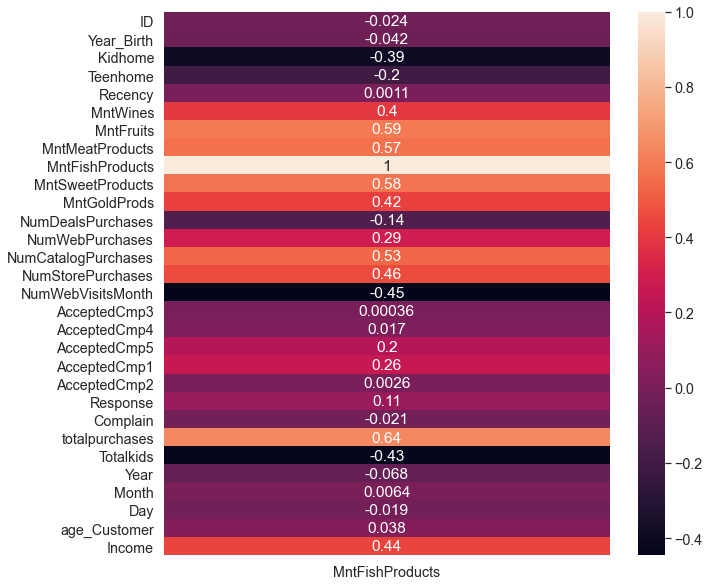

In [55]:
sns.heatmap(df.corr()[['MntFishProducts']],annot=True)

In [56]:
df.corr()[['Kidhome','Teenhome','Totalkids','age_Customer','Year','Income']].loc[['totalpurchases','Response']]

Kidhome  Teenhome  Totalkids  age_Customer      Year  \
totalpurchases -0.556669 -0.138384  -0.498888      0.102735 -0.144235   
Response       -0.080008 -0.154446  -0.169163     -0.030994 -0.171030   

                  Income  
totalpurchases  0.664706  
Response        0.132756

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Kidhome              2240 non-null   float64       
 5   Teenhome             2240 non-null   float64       
 6   Dt_Customer          2240 non-null   datetime64[ns]
 7   Recency              2240 non-null   int64         
 8   MntWines             2240 non-null   float64       
 9   MntFruits            2240 non-null   float64       
 10  MntMeatProducts      2240 non-null   float64       
 11  MntFishProducts      2240 non-null   float64       
 12  MntSweetProducts     2240 non-null   float64       
 13  MntGoldProds         2240 non-nul

In [58]:
['Education','Marital_Status','Kidhome','Teenhome','Totalkids','Country','age_Customer','Year','Income']

['Education',
 'Marital_Status',
 'Kidhome',
 'Teenhome',
 'Totalkids',
 'Country',
 'age_Customer',
 'Year',
 'Income']

<AxesSubplot:>

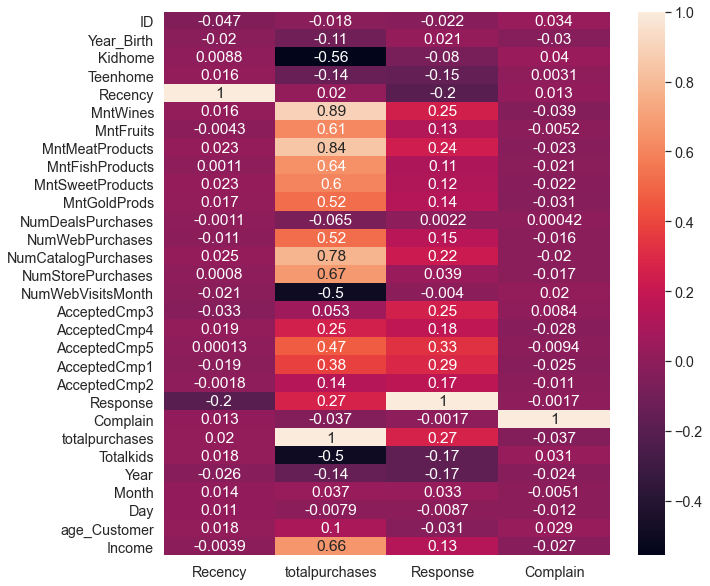

In [59]:
sns.heatmap(df.corr()[['Recency','totalpurchases','Response','Complain']],annot=True)

In [60]:
df.groupby('Education').describe()[['totalpurchases','Response','Complain']].transpose()

Education                2n Cycle       Basic   Graduation       Master  \
totalpurchases count   203.000000   54.000000  1127.000000   370.000000   
               mean    496.527094   81.796296   619.898846   611.781081   
               std     542.353099  123.227260   599.525914   623.393157   
               min      13.000000   14.000000     5.000000    10.000000   
               25%      56.500000   29.750000    70.000000    79.250000   
               50%     198.000000   57.000000   414.000000   387.500000   
               75%     899.000000   80.000000  1073.000000   988.000000   
               max    2257.000000  839.000000  2524.000000  2525.000000   
Response       count   203.000000   54.000000  1127.000000   370.000000   
               mean      0.108374    0.037037     0.134871     0.154054   
               std       0.311621    0.190626     0.341738     0.361489   
               min       0.000000    0.000000     0.000000     0.000000   
               25%       0.000000    0.000000     0.000000     0.000000   
               50%       0.000000    0.000000     0.000000     0.000000   
               75%       0.000000    0.000000     0.000000     0.000000   
               max       1.000000    1.000000     1.000000     1.000000   
Complain       count   203.000000   54.000000  1127.000000   370.000000   
               mean      0.019704    0.000000     0.012422     0.005405   
               std       0.139326    0.000000     0.110810     0.073422   
               min       0.000000    0.000000     0.000000     0.000000   
               25%       0.000000    0.000000     0.000000     0.000000   
               50%       0.000000    0.000000     0.000000     0.000000   
               75%       0.000000    0.000000     0.000000     0.000000   
               max       1.000000    0.000000     1.000000     1.000000   

Education                     PhD  
totalpurchases count   486.000000  
               mean    672.409465  
               std     616.119130  
               min       8.000000  
               25%      88.500000  
               50%     493.000000  
               75%    1157.500000  
               max    2440.000000  
Response       count   486.000000  
               mean      0.207819  
               std       0.406165  
               min       0.000000  
               25%       0.000000  
               50%       0.000000  
               75%       0.000000  
               max       1.000000  
Complain       count   486.000000  
               mean      0.002058  
               std       0.045361  
               min       0.000000  
               25%       0.000000  
               50%       0.000000  
               75%       0.000000  
               max       1.000000

In [61]:
df.groupby('Teenhome').describe()[['totalpurchases','Response','Complain']].transpose()

Teenhome                      0.0          1.0          2.0
totalpurchases count  1158.000000  1030.000000    52.000000
               mean    692.798791   508.826214   589.153846
               std     694.975297   465.454692   482.610401
               min       5.000000     8.000000    18.000000
               25%      61.000000    88.000000   198.750000
               50%     382.000000   395.000000   458.500000
               75%    1289.000000   839.500000   904.000000
               max    2525.000000  2194.000000  1750.000000
Response       count  1158.000000  1030.000000    52.000000
               mean      0.204663     0.089320     0.096154
               std       0.403630     0.285344     0.297678
               min       0.000000     0.000000     0.000000
               25%       0.000000     0.000000     0.000000
               50%       0.000000     0.000000     0.000000
               75%       0.000000     0.000000     0.000000
               max       1.000000     1.000000     1.000000
Complain       count  1158.000000  1030.000000    52.000000
               mean      0.009499     0.008738     0.019231
               std       0.097041     0.093112     0.138675
               min       0.000000     0.000000     0.000000
               25%       0.000000     0.000000     0.000000
               50%       0.000000     0.000000     0.000000
               75%       0.000000     0.000000     0.000000
               max       1.000000     1.000000     1.000000

In [62]:
df.groupby('Year').describe()[['totalpurchases','Response','Complain']].transpose()

Year                         2012         2013         2014
totalpurchases count   494.000000  1189.000000   557.000000
               mean    745.483806   601.703112   490.653501
               std     636.294396   589.860337   572.296139
               min      13.000000     5.000000     6.000000
               25%     126.750000    75.000000    48.000000
               50%     578.500000   401.000000   158.000000
               75%    1240.750000  1027.000000   889.000000
               max    2352.000000  2524.000000  2525.000000
Response       count   494.000000  1189.000000   557.000000
               mean      0.267206     0.129521     0.086176
               std       0.442950     0.335917     0.280876
               min       0.000000     0.000000     0.000000
               25%       0.000000     0.000000     0.000000
               50%       0.000000     0.000000     0.000000
               75%       1.000000     0.000000     0.000000
               max       1.000000     1.000000     1.000000
Complain       count   494.000000  1189.000000   557.000000
               mean      0.012146     0.010093     0.005386
               std       0.109647     0.099995     0.073257
               min       0.000000     0.000000     0.000000
               25%       0.000000     0.000000     0.000000
               50%       0.000000     0.000000     0.000000
               75%       0.000000     0.000000     0.000000
               max       1.000000     1.000000     1.000000

In [63]:
df.groupby('age_Customer').describe()[['totalpurchases','Response','Complain']].transpose()

age_Customer            16           17           18           19   \
totalpurchases count    1.0     2.000000     3.000000     4.000000   
               mean   122.0  1400.000000  1003.333333   555.500000   
               std      NaN    49.497475   987.000169   623.696775   
               min    122.0  1365.000000    16.000000    23.000000   
               25%    122.0  1382.500000   510.000000    23.000000   
               50%    122.0  1400.000000  1004.000000   491.500000   
               75%    122.0  1417.500000  1497.000000  1024.000000   
               max    122.0  1435.000000  1990.000000  1216.000000   
Response       count    1.0     2.000000     3.000000     4.000000   
               mean     1.0     0.500000     0.333333     0.250000   
               std      NaN     0.707107     0.577350     0.500000   
               min      1.0     0.000000     0.000000     0.000000   
               25%      1.0     0.250000     0.000000     0.000000   
               50%      1.0     0.500000     0.000000     0.000000   
               75%      1.0     0.750000     0.500000     0.250000   
               max      1.0     1.000000     1.000000     1.000000   
Complain       count    1.0     2.000000     3.000000     4.000000   
               mean     0.0     0.500000     0.000000     0.000000   
               std      NaN     0.707107     0.000000     0.000000   
               min      0.0     0.000000     0.000000     0.000000   
               25%      0.0     0.250000     0.000000     0.000000   
               50%      0.0     0.500000     0.000000     0.000000   
               75%      0.0     0.750000     0.000000     0.000000   
               max      0.0     1.000000     0.000000     0.000000   

age_Customer                  20           21           22           23   \
totalpurchases count     7.000000    13.000000    13.000000    22.000000   
               mean   1100.142857   695.384615   919.307692   622.227273   
               std     609.814570   667.091390   695.562768   833.957286   
               min     119.000000    29.000000    64.000000    14.000000   
               25%     820.500000   137.000000   358.000000    49.500000   
               50%    1228.000000   241.000000   730.000000    95.500000   
               75%    1318.000000  1253.000000  1598.000000   996.500000   
               max    2077.000000  1820.000000  1991.000000  2525.000000   
Response       count     7.000000    13.000000    13.000000    22.000000   
               mean      0.142857     0.076923     0.230769     0.227273   
               std       0.377964     0.277350     0.438529     0.428932   
               min       0.000000     0.000000     0.000000     0.000000   
               25%       0.000000     0.000000     0.000000     0.000000   
               50%       0.000000     0.000000     0.000000     0.000000   
               75%       0.000000     0.000000     0.000000     0.000000   
               max       1.000000     1.000000     1.000000     1.000000   
Complain       count     7.000000    13.000000    13.000000    22.000000   
               mean      0.000000     0.000000     0.000000     0.000000   
               std       0.000000     0.000000     0.000000     0.000000   
               min       0.000000     0.000000     0.000000     0.000000   
               25%       0.000000     0.000000     0.000000     0.000000   
               50%       0.000000     0.000000     0.000000     0.000000   
               75%       0.000000     0.000000     0.000000     0.000000   
               max       0.000000     0.000000     0.000000     0.000000   

age_Customer                  24           25   ...          67           68   \
totalpurchases count    24.000000    27.000000  ...    12.000000     9.000000   
               mean    612.041667   653.888889  ...   978.833333  1020.333333   
               std     750.657768   729.016795  ...   707.870280   466.289610   
               min      

In [64]:
df.groupby('Country').describe()[['totalpurchases','Response','Complain']].transpose()

Country                       AUS           CA          GER          IND  \
totalpurchases count   160.000000   268.000000   120.000000   148.000000   
               mean    561.018750   628.850746   624.275000   537.060811   
               std     566.686879   602.675272   619.943694   562.583801   
               min       8.000000     8.000000    13.000000     5.000000   
               25%      62.500000    68.750000    65.750000    65.750000   
               50%     329.500000   458.500000   443.000000   291.000000   
               75%     962.000000  1072.750000  1080.750000   990.500000   
               max    2053.000000  2524.000000  2283.000000  2009.000000   
Response       count   160.000000   268.000000   120.000000   148.000000   
               mean      0.143750     0.141791     0.141667     0.087838   
               std       0.351938     0.349488     0.350170     0.284020   
               min       0.000000     0.000000     0.000000     0.000000   
               25%       0.000000     0.000000     0.000000     0.000000   
               50%       0.000000     0.000000     0.000000     0.000000   
               75%       0.000000     0.000000     0.000000     0.000000   
               max       1.000000     1.000000     1.000000     1.000000   
Complain       count   160.000000   268.000000   120.000000   148.000000   
               mean      0.000000     0.007463     0.008333     0.006757   
               std       0.000000     0.086225     0.091287     0.082199   
               min       0.000000     0.000000     0.000000     0.000000   
               25%       0.000000     0.000000     0.000000     0.000000   
               50%       0.000000     0.000000     0.000000     0.000000   
               75%       0.000000     0.000000     0.000000     0.000000   
               max       0.000000     1.000000     1.000000     1.000000   

Country                        ME           SA           SP           US  
totalpurchases count     3.000000   337.000000  1095.000000   109.000000  
               mean   1040.666667   626.323442   604.767123   622.770642  
               std     196.950078   610.035435   613.021937   557.862084  
               min     874.000000     6.000000     6.000000    19.000000  
               25%     932.000000    71.000000    67.500000   129.000000  
               50%     990.000000   409.000000   367.000000   467.000000  
               75%    1124.000000  1101.000000  1045.000000   972.000000  
               max    1258.000000  2525.000000  2525.000000  2114.000000  
Response       count     3.000000   337.000000  1095.000000   109.000000  
               mean      0.666667     0.154303     0.160731     0.119266  
               std       0.577350     0.361776     0.367450     0.325598  
               min       0.000000     0.000000     0.000000     0.000000  
               25%       0.500000     0.000000     0.000000     0.000000  
               50%       1.000000     0.000000     0.000000     0.000000  
               75%       1.000000     0.000000     0.000000     0.000000  
               max       1.000000     1.000000     1.000000     1.000000  
Complain       count     3.000000   337.000000  1095.000000   109.000000  
               mean      0.000000     0.008902     0.012785     0.000000  
               std       0.000000     0.094070     0.112399     0.000000  
               min       0.000000     0.000000     0.000000     0.000000  
               25%       0.000000     0.000000     0.000000     0.000000  
               50%       0.000000     0.000000     0.000000     0.000000  
               75%       0.000000     0.000000     0.000000     0.000000  
               max       0.000000     1.000000     1.000000     0.000000

In [65]:
df.groupby('Kidhome').describe()[['totalpurchases','Response','Complain']].transpose()

Kidhome                       0.0          1.0         2.0
totalpurchases count  1293.000000   899.000000   48.000000
               mean    901.260634   205.434928  145.250000
               std     593.601019   313.211330  183.871197
               min       6.000000     5.000000    8.000000
               25%     397.000000    42.000000   25.250000
               50%     904.000000    72.000000   65.500000
               75%    1334.000000   223.000000  163.750000
               max    2525.000000  2053.000000  727.000000
Response       count  1293.000000   899.000000   48.000000
               mean      0.171694     0.122358    0.041667
               std       0.377260     0.327881    0.201941
               min       0.000000     0.000000    0.000000
               25%       0.000000     0.000000    0.000000
               50%       0.000000     0.000000    0.000000
               75%       0.000000     0.000000    0.000000
               max       1.000000     1.000000    1.000000
Complain       count  1293.000000   899.000000   48.000000
               mean      0.006187     0.013348    0.020833
               std       0.078445     0.114824    0.144338
               min       0.000000     0.000000    0.000000
               25%       0.000000     0.000000    0.000000
               50%       0.000000     0.000000    0.000000
               75%       0.000000     0.000000    0.000000
               max       1.000000     1.000000    1.000000

In [66]:
df.groupby('Marital_Status').describe()[['totalpurchases','Response','Complain']].transpose()

Marital_Status             Absurd       Alone     Divorced      Married  \
totalpurchases count     2.000000    3.000000   232.000000   864.000000   
               mean   1192.500000  256.666667   610.629310   590.802083   
               std      33.234019  325.662914   580.628672   590.652817   
               min    1169.000000   49.000000     6.000000     8.000000   
               25%    1180.750000   69.000000    61.250000    68.000000   
               50%    1192.500000   89.000000   395.000000   396.500000   
               75%    1204.250000  360.500000  1073.000000  1001.000000   
               max    1216.000000  632.000000  2074.000000  2486.000000   
Response       count     2.000000    3.000000   232.000000   864.000000   
               mean      0.500000    0.333333     0.206897     0.113426   
               std       0.707107    0.577350     0.405957     0.317296   
               min       0.000000    0.000000     0.000000     0.000000   
               25%       0.250000    0.000000     0.000000     0.000000   
               50%       0.500000    0.000000     0.000000     0.000000   
               75%       0.750000    0.500000     0.000000     0.000000   
               max       1.000000    1.000000     1.000000     1.000000   
Complain       count     2.000000    3.000000   232.000000   864.000000   
               mean      0.000000    0.000000     0.008621     0.009259   
               std       0.000000    0.000000     0.092646     0.095834   
               min       0.000000    0.000000     0.000000     0.000000   
               25%       0.000000    0.000000     0.000000     0.000000   
               50%       0.000000    0.000000     0.000000     0.000000   
               75%       0.000000    0.000000     0.000000     0.000000   
               max       0.000000    0.000000     1.000000     1.000000   

Marital_Status             Single     Together        Widow        YOLO  
totalpurchases count   480.000000   580.000000    77.000000    2.000000  
               mean    606.483333   608.387931   738.818182  424.000000  
               std     628.609324   609.814904   580.955559    0.000000  
               min       5.000000     8.000000    15.000000  424.000000  
               25%      70.750000    69.000000   138.000000  424.000000  
               50%     361.000000   393.500000   636.000000  424.000000  
               75%    1100.250000  1039.250000  1156.000000  424.000000  
               max    2525.000000  2524.000000  2088.000000  424.000000  
Response       count   480.000000   580.000000    77.000000    2.000000  
               mean      0.220833     0.103448     0.246753    0.500000  
               std       0.415241     0.304806     0.433949    0.707107  
               min       0.000000     0.000000     0.000000    0.000000  
               25%       0.000000     0.000000     0.000000    0.250000  
               50%       0.000000     0.000000     0.000000    0.500000  
               75%       0.000000     0.000000     0.000000    0.750000  
               max       1.000000     1.000000     1.000000    1.000000  
Complain       count   480.000000   580.000000    77.000000    2.000000  
               mean      0.012500     0.008621     0.000000    0.000000  
               std       0.111218     0.092526     0.000000    0.000000  
               min       0.000000     0.000000     0.000000    0.000000  
               25%       0.000000     0.000000     0.000000    0.000000  
               50%       0.000000     0.000000     0.000000    0.000000  
               75%       0.000000     0.000000     0.000000    0.000000  
               max       1.000000     1.000000     0.000000    0.000000

In [67]:
df.groupby('NumWebVisitsMonth').describe()[['totalpurchases','Response','Complain']].transpose()

NumWebVisitsMonth            0.0          1.0          2.0          3.0   \
totalpurchases count    11.000000   153.000000   202.000000   205.000000   
               mean   1031.000000  1242.921569  1186.346535   973.946341   
               std     628.098559   465.360041   592.490954   634.660711   
               min       6.000000    59.000000    10.000000    10.000000   
               25%     671.000000   963.000000   843.000000   409.000000   
               50%    1165.000000  1198.000000  1169.000000   976.000000   
               75%    1515.500000  1536.000000  1609.750000  1507.000000   
               max    1717.000000  2525.000000  2352.000000  2217.000000   
Response       count    11.000000   153.000000   202.000000   205.000000   
               mean      0.000000     0.196078     0.198020     0.160976   
               std       0.000000     0.398332     0.399497     0.368408   
               min       0.000000     0.000000     0.000000     0.000000   
               25%       0.000000     0.000000     0.000000     0.000000   
               50%       0.000000     0.000000     0.000000     0.000000   
               75%       0.000000     0.000000     0.000000     0.000000   
               max       0.000000     1.000000     1.000000     1.000000   
Complain       count    11.000000   153.000000   202.000000   205.000000   
               mean      0.000000     0.006536     0.009901     0.009756   
               std       0.000000     0.080845     0.099256     0.098531   
               min       0.000000     0.000000     0.000000     0.000000   
               25%       0.000000     0.000000     0.000000     0.000000   
               50%       0.000000     0.000000     0.000000     0.000000   
               75%       0.000000     0.000000     0.000000     0.000000   
               max       0.000000     1.000000     1.000000     1.000000   

NumWebVisitsMonth            4.0          5.0          6.0          7.0   \
totalpurchases count   218.000000   281.000000   340.000000   393.000000   
               mean    650.458716   521.064057   485.467647   297.167939   
               std     558.707677   530.305838   544.106934   393.119662   
               min      15.000000    11.000000     8.000000     8.000000   
               25%      95.250000    64.000000    58.500000    45.000000   
               50%     610.000000   358.000000   223.000000    99.000000   
               75%    1034.250000   845.000000   811.000000   415.000000   
               max    2524.000000  2486.000000  2092.000000  2074.000000   
Response       count   218.000000   281.000000   340.000000   393.000000   
               mean      0.119266     0.088968     0.141176     0.114504   
               std       0.324847     0.285205     0.348717     0.318828   
               min       0.000000     0.000000     0.000000     0.000000   
               25%       0.000000     0.000000     0.000000     0.000000   
               50%       0.000000     0.000000     0.000000     0.000000   
               75%       0.000000     0.000000     0.000000     0.000000   
               max       1.000000     1.000000     1.000000     1.000000   
Complain       count   218.000000   281.000000   340.000000   393.000000   
               mean      0.000000     0.010676     0.005882     0.012723   
               std       0.000000     0.102956     0.076583     0.112218   
               min       0.000000     0.000000     0.000000     0.000000   
               25%       0.000000     0.000000     0.000000     0.000000   
               50%       0.000000     0.000000     0.000000     0.000000   
               75%       0.000000     0.000000     0.000000     0.000000   
               max       0.000000     1.000000     1.000000     1.000000   

NumWebVisitsMonth            8.0          9.0         10.0  13.0      14.0  \
totalpurchases count   342.000000    83.000000    3.000000   1.0  2.000000   
               mean    353.122807   288.12

In [152]:
new_df2=pd.pivot_table(data=df, values ='totalpurchases',columns ='Marital_Status',index ='NumWebVisitsMonth')
new_df2

Marital_Status     Absurd  Alone     Divorced      Married       Single  \
NumWebVisitsMonth                                                         
0.0                   NaN    NaN     6.000000  1064.750000   919.500000   
1.0                1216.0    NaN  1149.294118  1201.714286  1277.302326   
2.0                1169.0    NaN  1035.823529  1148.925000  1415.111111   
3.0                   NaN    NaN   995.785714   965.934211   878.036364   
4.0                   NaN    NaN   609.700000   634.164835   701.975000   
5.0                   NaN   49.0   578.107143   573.931373   542.017544   
6.0                   NaN   89.0   525.840000   479.022556   334.552239   
7.0                   NaN    NaN   392.977778   282.884354   273.325581   
8.0                   NaN  632.0   544.419355   340.593548   332.857143   
9.0                   NaN    NaN   189.142857   304.320000   314.037037   
10.0                  NaN    NaN          NaN          NaN   213.000000   
13.0                  NaN    NaN          NaN    32.000000          NaN   
14.0                  NaN    NaN     6.000000          NaN     5.000000   
17.0                  NaN    NaN          NaN          NaN   373.000000   
19.0                  NaN    NaN          NaN     9.000000   178.000000   
20.0                  NaN    NaN     8.000000          NaN          NaN   

Marital_Status        Together        Widow   YOLO  
NumWebVisitsMonth                                   
0.0                1369.000000  1130.000000    NaN  
1.0                1304.222222  1236.142857    NaN  
2.0                1152.177419  1095.166667    NaN  
3.0                1008.176471  1399.777778    NaN  
4.0                 651.206897   672.000000    NaN  
5.0                 439.300000   431.000000    NaN  
6.0                 585.645570   628.700000    NaN  
7.0                 293.173077   320.272727    NaN  
8.0                 293.060241   617.857143  424.0  
9.0                 217.600000   537.750000    NaN  
10.0                211.000000          NaN    NaN  
13.0                       NaN          NaN    NaN  
14.0                       NaN          NaN    NaN  
17.0                       NaN          NaN    NaN  
19.0                       NaN          NaN    NaN  
20.0                 93.000000          NaN    NaN

### Which marketing campaign is most successful?

### Which channels are underperforming?

In [68]:
df.groupby('NumWebVisitsMonth').describe()[['AcceptedCmp5','AcceptedCmp1','AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp2']].transpose()

NumWebVisitsMonth        0.0         1.0         2.0         3.0         4.0   \
AcceptedCmp5 count  11.000000  153.000000  202.000000  205.000000  218.000000   
             mean    0.000000    0.261438    0.237624    0.126829    0.082569   
             std     0.000000    0.440861    0.426685    0.333596    0.275863   
             min     0.000000    0.000000    0.000000    0.000000    0.000000   
             25%     0.000000    0.000000    0.000000    0.000000    0.000000   
             50%     0.000000    0.000000    0.000000    0.000000    0.000000   
             75%     0.000000    1.000000    0.000000    0.000000    0.000000   
             max     0.000000    1.000000    1.000000    1.000000    1.000000   
AcceptedCmp1 count  11.000000  153.000000  202.000000  205.000000  218.000000   
             mean    0.000000    0.137255    0.168317    0.146341    0.087156   
             std     0.000000    0.345246    0.375077    0.354313    0.282713   
             min     0.000000    0.000000    0.000000    0.000000    0.000000   
             25%     0.000000    0.000000    0.000000    0.000000    0.000000   
             50%     0.000000    0.000000    0.000000    0.000000    0.000000   
             75%     0.000000    0.000000    0.000000    0.000000    0.000000   
             max     0.000000    1.000000    1.000000    1.000000    1.000000   
AcceptedCmp3 count  11.000000  153.000000  202.000000  205.000000  218.000000   
             mean    0.000000    0.078431    0.039604    0.039024    0.064220   
             std     0.000000    0.269732    0.195511    0.194127    0.245709   
             min     0.000000    0.000000    0.000000    0.000000    0.000000   
             25%     0.000000    0.000000    0.000000    0.000000    0.000000   
             50%     0.000000    0.000000    0.000000    0.000000    0.000000   
             75%     0.000000    0.000000    0.000000    0.000000    0.000000   
             max     0.000000    1.000000    1.000000    1.000000    1.000000   
AcceptedCmp4 count  11.000000  153.000000  202.000000  205.000000  218.000000   
             mean    0.090909    0.071895    0.108911    0.068293    0.073394   
             std     0.301511    0.259163    0.312301    0.252865    0.261383   
             min     0.000000    0.000000    0.000000    0.000000    0.000000   
             25%     0.000000    0.000000    0.000000    0.000000    0.000000   
             50%     0.000000    0.000000    0.000000    0.000000    0.000000   
             75%     0.000000    0.000000    0.000000    0.000000    0.000000   
             max     1.000000    1.000000    1.000000    1.000000    1.000000   
AcceptedCmp2 count  11.000000  153.000000  202.000000  205.000000  218.000000   
             mean    0.000000    0.013072    0.019802    0.009756    0.009174   
             std     0.000000    0.113956    0.139665    0.098531    0.095562   
             min     0.000000    0.000000    0.000000    0.000000    0.000000   
             25%     0.000000    0.000000    0.000000    0.000000    0.000000   
             50%     0.000000    0.000000    0.000000    0.000000    0.000000   
             75%     0.000000    0.000000    0.000000    0.000000    0.000000   
             max     0.000000    1.000000    1.000000    1.000000    1.000000   

NumWebVisitsMonth         5.0         6.0         7.0         8.0        9.0   \
AcceptedCmp5 count  281.000000  340.000000  393.000000  342.000000  83.000000   
             mean     0.032028    0.044118    0.010178    0.005848   0.012048   
             std      0.176390    0.205659    0.100500    0.076360   0.109764   
             min      0.000000    0.000000    0.000000    0.000000   0.000000   
             25%      0.000000    0.000000    0.000000    0.000000   0.000000   
             50%      0.000000    0.000000    0.000000    0.000000   0.000000   
             75%      0.000000    0.000000    0.000000    0.000000   0.000000   
             max      1.000000

In [69]:
df.groupby('Income').describe()[['AcceptedCmp5','AcceptedCmp1']]

AcceptedCmp5                                   AcceptedCmp1           \
                count mean std  min  25%  50%  75%  max        count mean std   
Income                                                                          
1730.0            1.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0          1.0  0.0 NaN   
2447.0            1.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0          1.0  0.0 NaN   
3502.0            1.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0          1.0  0.0 NaN   
4023.0            1.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0          1.0  0.0 NaN   
4428.0            1.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0          1.0  0.0 NaN   
...               ...  ...  ..  ...  ...  ...  ...  ...          ...  ...  ..   
157243.0          1.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0          1.0  0.0 NaN   
157733.0          1.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0          1.0  0.0 NaN   
160803.0          1.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0          1.0  0.0 NaN   
162397.0          1.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0          1.0  0.0 NaN   
666666.0          1.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0          1.0  0.0 NaN   

                                   
          min  25%  50%  75%  max  
Income                             
1730.0    0.0  0.0  0.0  0.0  0.0  
2447.0    0.0  0.0  0.0  0.0  0.0  
3502.0    0.0  0.0  0.0  0.0  0.0  
4023.0    0.0  0.0  0.0  0.0  0.0  
4428.0    0.0  0.0  0.0  0.0  0.0  
...       ...  ...  ...  ...  ...  
157243.0  0.0  0.0  0.0  0.0  0.0  
157733.0  0.0  0.0  0.0  0.0  0.0  
160803.0  0.0  0.0  0.0  0.0  0.0  
162397.0  0.0  0.0  0.0  0.0  0.0  
666666.0  0.0  0.0  0.0  0.0  0.0  

[1975 rows x 16 columns]

In [70]:
df.groupby('Education').describe()[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2']].transpose()

Education             2n Cycle      Basic   Graduation      Master         PhD
AcceptedCmp3 count  203.000000  54.000000  1127.000000  370.000000  486.000000
             mean     0.073892   0.111111     0.069210    0.064865    0.082305
             std      0.262241   0.317221     0.253924    0.246621    0.275111
             min      0.000000   0.000000     0.000000    0.000000    0.000000
             25%      0.000000   0.000000     0.000000    0.000000    0.000000
             50%      0.000000   0.000000     0.000000    0.000000    0.000000
             75%      0.000000   0.000000     0.000000    0.000000    0.000000
             max      1.000000   1.000000     1.000000    1.000000    1.000000
AcceptedCmp4 count  203.000000  54.000000  1127.000000  370.000000  486.000000
             mean     0.049261   0.000000     0.071872    0.083784    0.092593
             std      0.216948   0.000000     0.258391    0.277438    0.290159
             min      0.000000   0.000000     0.000000    0.000000    0.000000
             25%      0.000000   0.000000     0.000000    0.000000    0.000000
             50%      0.000000   0.000000     0.000000    0.000000    0.000000
             75%      0.000000   0.000000     0.000000    0.000000    0.000000
             max      1.000000   0.000000     1.000000    1.000000    1.000000
AcceptedCmp5 count  203.000000  54.000000  1127.000000  370.000000  486.000000
             mean     0.049261   0.000000     0.076309    0.075676    0.080247
             std      0.216948   0.000000     0.265609    0.264837    0.271955
             min      0.000000   0.000000     0.000000    0.000000    0.000000
             25%      0.000000   0.000000     0.000000    0.000000    0.000000
             50%      0.000000   0.000000     0.000000    0.000000    0.000000
             75%      0.000000   0.000000     0.000000    0.000000    0.000000
             max      1.000000   0.000000     1.000000    1.000000    1.000000
AcceptedCmp1 count  203.000000  54.000000  1127.000000  370.000000  486.000000
             mean     0.068966   0.000000     0.072760    0.048649    0.061728
             std      0.254022   0.000000     0.259857    0.215424    0.240910
             min      0.000000   0.000000     0.000000    0.000000    0.000000
             25%      0.000000   0.000000     0.000000    0.000000    0.000000
             50%      0.000000   0.000000     0.000000    0.000000    0.000000
             75%      0.000000   0.000000     0.000000    0.000000    0.000000
             max      1.000000   0.000000     1.000000    1.000000    1.000000
AcceptedCmp2 count  203.000000  54.000000  1127.000000  370.000000  486.000000
             mean     0.009852   0.000000     0.014197    0.005405    0.020576
             std      0.099012   0.000000     0.118355    0.073422    0.142107
             min      0.000000   0.000000     0.000000    0.000000    0.000000
             25%      0.000000   0.000000     0.000000    0.000000    0.000000
             50%      0.000000   0.000000     0.000000    0.000000    0.000000
             75%      0.000000   0.000000     0.000000    0.000000    0.000000
             max      1.000000   0.000000     1.000000    1.000000    1.000000

In [71]:
new_df2=pd.pivot_table(data=df, values ='totalpurchases',columns ='Marital_Status',index ='AcceptedCmp5')
new_df2

Marital_Status  Absurd       Alone     Divorced      Married       Single  \
AcceptedCmp5                                                                
0               1169.0  256.666667   558.949772   508.251880   534.757238   
1               1216.0         NaN  1481.230769  1588.909091  1645.354839   

Marital_Status     Together        Widow   YOLO  
AcceptedCmp5                                     
0                516.082090   667.449275  424.0  
1               1732.840909  1354.375000    NaN

In [72]:
df.groupby('Education').describe()[['AcceptedCmp5','AcceptedCmp1']]

AcceptedCmp5                                               \
                  count      mean       std  min  25%  50%  75%  max   
Education                                                              
2n Cycle          203.0  0.049261  0.216948  0.0  0.0  0.0  0.0  1.0   
Basic              54.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
Graduation       1127.0  0.076309  0.265609  0.0  0.0  0.0  0.0  1.0   
Master            370.0  0.075676  0.264837  0.0  0.0  0.0  0.0  1.0   
PhD               486.0  0.080247  0.271955  0.0  0.0  0.0  0.0  1.0   

           AcceptedCmp1                                               
                  count      mean       std  min  25%  50%  75%  max  
Education                                                             
2n Cycle          203.0  0.068966  0.254022  0.0  0.0  0.0  0.0  1.0  
Basic              54.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
Graduation       1127.0  0.072760  0.259857  0.0  0.0  0.0  0.0  1.0  
Master            370.0  0.048649  0.215424  0.0  0.0  0.0  0.0  1.0  
PhD               486.0  0.061728  0.240910  0.0  0.0  0.0  0.0  1.0

In [73]:
df.groupby('Year').describe()[[ 'AcceptedCmp5', 'AcceptedCmp1']]

AcceptedCmp5                                              AcceptedCmp1  \
            count      mean       std  min  25%  50%  75%  max        count   
Year                                                                          
2012        494.0  0.064777  0.246382  0.0  0.0  0.0  0.0  1.0        494.0   
2013       1189.0  0.072330  0.259142  0.0  0.0  0.0  0.0  1.0       1189.0   
2014        557.0  0.080790  0.272757  0.0  0.0  0.0  0.0  1.0        557.0   

                                                   
          mean       std  min  25%  50%  75%  max  
Year                                               
2012  0.048583  0.215213  0.0  0.0  0.0  0.0  1.0  
2013  0.065601  0.247688  0.0  0.0  0.0  0.0  1.0  
2014  0.075404  0.264279  0.0  0.0  0.0  0.0  1.0

In [74]:
df.groupby('Year').describe()[['AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp2']]

AcceptedCmp3                                              AcceptedCmp4  \
            count      mean       std  min  25%  50%  75%  max        count   
Year                                                                          
2012        494.0  0.074899  0.263495  0.0  0.0  0.0  0.0  1.0        494.0   
2013       1189.0  0.067283  0.250618  0.0  0.0  0.0  0.0  1.0       1189.0   
2014        557.0  0.082585  0.275502  0.0  0.0  0.0  0.0  1.0        557.0   

                ...           AcceptedCmp2                                     \
          mean  ...  75%  max        count      mean       std  min  25%  50%   
Year            ...                                                             
2012  0.089069  ...  0.0  1.0        494.0  0.014170  0.118311  0.0  0.0  0.0   
2013  0.066442  ...  0.0  1.0       1189.0  0.012616  0.111656  0.0  0.0  0.0   
2014  0.078995  ...  0.0  1.0        557.0  0.014363  0.119087  0.0  0.0  0.0   

                
      75%  max  
Year            
2012  0.0  1.0  
2013  0.0  1.0  
2014  0.0  1.0  

[3 rows x 24 columns]

In [75]:
df.groupby('Totalkids').describe()[[ 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4']].transpose()

Totalkids                    0            1           2          3
AcceptedCmp5 count  638.000000  1128.000000  421.000000  53.000000
             mean     0.216301     0.018617    0.007126   0.018868
             std      0.412045     0.135228    0.084214   0.137361
             min      0.000000     0.000000    0.000000   0.000000
             25%      0.000000     0.000000    0.000000   0.000000
             50%      0.000000     0.000000    0.000000   0.000000
             75%      0.000000     0.000000    0.000000   0.000000
             max      1.000000     1.000000    1.000000   1.000000
AcceptedCmp1 count  638.000000  1128.000000  421.000000  53.000000
             mean     0.172414     0.023936    0.009501   0.056604
             std      0.378036     0.152918    0.097125   0.233295
             min      0.000000     0.000000    0.000000   0.000000
             25%      0.000000     0.000000    0.000000   0.000000
             50%      0.000000     0.000000    0.000000   0.000000
             75%      0.000000     0.000000    0.000000   0.000000
             max      1.000000     1.000000    1.000000   1.000000
AcceptedCmp2 count  638.000000  1128.000000  421.000000  53.000000
             mean     0.028213     0.007979    0.007126   0.000000
             std      0.165711     0.089006    0.084214   0.000000
             min      0.000000     0.000000    0.000000   0.000000
             25%      0.000000     0.000000    0.000000   0.000000
             50%      0.000000     0.000000    0.000000   0.000000
             75%      0.000000     0.000000    0.000000   0.000000
             max      1.000000     1.000000    1.000000   0.000000
AcceptedCmp3 count  638.000000  1128.000000  421.000000  53.000000
             mean     0.075235     0.075355    0.068884   0.018868
             std      0.263977     0.264080    0.253557   0.137361
             min      0.000000     0.000000    0.000000   0.000000
             25%      0.000000     0.000000    0.000000   0.000000
             50%      0.000000     0.000000    0.000000   0.000000
             75%      0.000000     0.000000    0.000000   0.000000
             max      1.000000     1.000000    1.000000   1.000000
AcceptedCmp4 count  638.000000  1128.000000  421.000000  53.000000
             mean     0.108150     0.070035    0.038005   0.056604
             std      0.310814     0.255320    0.191435   0.233295
             min      0.000000     0.000000    0.000000   0.000000
             25%      0.000000     0.000000    0.000000   0.000000
             50%      0.000000     0.000000    0.000000   0.000000
             75%      0.000000     0.000000    0.000000   0.000000
             max      1.000000     1.000000    1.000000   1.000000

In [76]:
df.groupby('MntWines').describe()[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2']].transpose()

MntWines               0.0        1.0        2.0        3.0        4.0     \
AcceptedCmp3 count  13.000000  37.000000  42.000000  30.000000  33.000000   
             mean    0.076923   0.135135   0.047619   0.100000   0.060606   
             std     0.277350   0.346583   0.215540   0.305129   0.242306   
             min     0.000000   0.000000   0.000000   0.000000   0.000000   
             25%     0.000000   0.000000   0.000000   0.000000   0.000000   
             50%     0.000000   0.000000   0.000000   0.000000   0.000000   
             75%     0.000000   0.000000   0.000000   0.000000   0.000000   
             max     1.000000   1.000000   1.000000   1.000000   1.000000   
AcceptedCmp4 count  13.000000  37.000000  42.000000  30.000000  33.000000   
             mean    0.000000   0.000000   0.000000   0.000000   0.000000   
             std     0.000000   0.000000   0.000000   0.000000   0.000000   
             min     0.000000   0.000000   0.000000   0.000000   0.000000   
             25%     0.000000   0.000000   0.000000   0.000000   0.000000   
             50%     0.000000   0.000000   0.000000   0.000000   0.000000   
             75%     0.000000   0.000000   0.000000   0.000000   0.000000   
             max     0.000000   0.000000   0.000000   0.000000   0.000000   
AcceptedCmp5 count  13.000000  37.000000  42.000000  30.000000  33.000000   
             mean    0.000000   0.000000   0.000000   0.000000   0.000000   
             std     0.000000   0.000000   0.000000   0.000000   0.000000   
             min     0.000000   0.000000   0.000000   0.000000   0.000000   
             25%     0.000000   0.000000   0.000000   0.000000   0.000000   
             50%     0.000000   0.000000   0.000000   0.000000   0.000000   
             75%     0.000000   0.000000   0.000000   0.000000   0.000000   
             max     0.000000   0.000000   0.000000   0.000000   0.000000   
AcceptedCmp1 count  13.000000  37.000000  42.000000  30.000000  33.000000   
             mean    0.000000   0.000000   0.000000   0.000000   0.000000   
             std     0.000000   0.000000   0.000000   0.000000   0.000000   
             min     0.000000   0.000000   0.000000   0.000000   0.000000   
             25%     0.000000   0.000000   0.000000   0.000000   0.000000   
             50%     0.000000   0.000000   0.000000   0.000000   0.000000   
             75%     0.000000   0.000000   0.000000   0.000000   0.000000   
             max     0.000000   0.000000   0.000000   0.000000   0.000000   
AcceptedCmp2 count  13.000000  37.000000  42.000000  30.000000  33.000000   
             mean    0.000000   0.000000   0.000000   0.000000   0.000000   
             std     0.000000   0.000000   0.000000   0.000000   0.000000   
             min     0.000000   0.000000   0.000000   0.000000   0.000000   
             25%     0.000000   0.000000   0.000000   0.000000   0.000000   
             50%     0.000000   0.000000   0.000000   0.000000   0.000000   
             75%     0.000000   0.000000   0.000000   0.000000   0.000000   
             max     0.000000   0.000000   0.000000   0.000000   0.000000   

MntWines               5.0        6.0        7.0        8.0        9.0     \
AcceptedCmp3 count  40.000000  37.000000  22.000000  30.000000  28.000000   
             mean    0.025000   0.108108   0.136364   0.066667   0.035714   
             std     0.158114   0.314800   0.351250   0.253708   0.188982   
             min     0.000000   0.000000   0.000000   0.000000   0.000000   
             25%     0.000000   0.000000   0.000000   0.000000   0.000000   
             50%     0.000000   0.000000   0.000000   0.000000   0.000000   
             75%     0.000000   0.000000   0.000000   0.000000   0.000000   
             max     1.000000   1.000000   1.000000   1.000000   1.000000   
AcceptedCmp4 count  40.000000  37.000000  22.000000  30.000000  28.000000   
             mean    0.000000   0.000000   0.000000   0.000000   0.00000

In [77]:
df.groupby('Month').describe()[[ 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4']].transpose()

Month                       1           2           3           4   \
AcceptedCmp5 count  197.000000  178.000000  211.000000  182.000000   
             mean     0.086294    0.084270    0.085308    0.076923   
             std      0.281514    0.278575    0.280004    0.267204   
             min      0.000000    0.000000    0.000000    0.000000   
             25%      0.000000    0.000000    0.000000    0.000000   
             50%      0.000000    0.000000    0.000000    0.000000   
             75%      0.000000    0.000000    0.000000    0.000000   
             max      1.000000    1.000000    1.000000    1.000000   
AcceptedCmp1 count  197.000000  178.000000  211.000000  182.000000   
             mean     0.060914    0.067416    0.080569    0.049451   
             std      0.239781    0.251448    0.272819    0.217405   
             min      0.000000    0.000000    0.000000    0.000000   
             25%      0.000000    0.000000    0.000000    0.000000   
             50%      0.000000    0.000000    0.000000    0.000000   
             75%      0.000000    0.000000    0.000000    0.000000   
             max      1.000000    1.000000    1.000000    1.000000   
AcceptedCmp2 count  197.000000  178.000000  211.000000  182.000000   
             mean     0.020305    0.005618    0.009479    0.021978   
             std      0.141399    0.074953    0.097126    0.147016   
             min      0.000000    0.000000    0.000000    0.000000   
             25%      0.000000    0.000000    0.000000    0.000000   
             50%      0.000000    0.000000    0.000000    0.000000   
             75%      0.000000    0.000000    0.000000    0.000000   
             max      1.000000    1.000000    1.000000    1.000000   
AcceptedCmp3 count  197.000000  178.000000  211.000000  182.000000   
             mean     0.091371    0.101124    0.066351    0.049451   
             std      0.288869    0.302343    0.249486    0.217405   
             min      0.000000    0.000000    0.000000    0.000000   
             25%      0.000000    0.000000    0.000000    0.000000   
             50%      0.000000    0.000000    0.000000    0.000000   
             75%      0.000000    0.000000    0.000000    0.000000   
             max      1.000000    1.000000    1.000000    1.000000   
AcceptedCmp4 count  197.000000  178.000000  211.000000  182.000000   
             mean     0.076142    0.056180    0.099526    0.065934   
             std      0.265901    0.230918    0.300079    0.248851   
             min      0.000000    0.000000    0.000000    0.000000   
             25%      0.000000    0.000000    0.000000    0.000000   
             50%      0.000000    0.000000    0.000000    0.000000   
             75%      0.000000    0.000000    0.000000    0.000000   
             max      1.000000    1.000000    1.000000    1.000000   

Month                       5           6           7           8   \
AcceptedCmp5 count  216.000000  166.000000  101.000000  222.000000   
             mean     0.106481    0.036145    0.039604    0.063063   
             std      0.309169    0.187215    0.196000    0.243626   
             min      0.000000    0.000000    0.000000    0.000000   
             25%      0.000000    0.000000    0.000000    0.000000   
             50%      0.000000    0.000000    0.000000    0.000000   
             75%      0.000000    0.000000    0.000000    0.000000   
             max      1.000000    1.000000    1.000000    1.000000   
AcceptedCmp1 count  216.000000  166.000000  101.000000  222.000000   
             mean     0.087963    0.078313    0.029703    0.058559   
             std      0.283899    0.269477    0.170613    0.235327   
             min      0.000000    0.000000    0.000000    0.000000   
             25%      0.000000    0.000000    0.000000    0.000000   
             50%      0.000000    0.000000    0.000000    0.000000   
             75%      0.000000    0.000000    0.000000    0.000000   
         

In [78]:
df.groupby('MntSweetProducts').describe()[[ 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4']].transpose()

MntSweetProducts         0.0         1.0         2.0         3.0        4.0    \
AcceptedCmp5 count  419.000000  161.000000  128.000000  101.000000  82.000000   
             mean     0.028640    0.000000    0.000000    0.000000   0.000000   
             std      0.166991    0.000000    0.000000    0.000000   0.000000   
             min      0.000000    0.000000    0.000000    0.000000   0.000000   
             25%      0.000000    0.000000    0.000000    0.000000   0.000000   
             50%      0.000000    0.000000    0.000000    0.000000   0.000000   
             75%      0.000000    0.000000    0.000000    0.000000   0.000000   
             max      1.000000    0.000000    0.000000    0.000000   0.000000   
AcceptedCmp1 count  419.000000  161.000000  128.000000  101.000000  82.000000   
             mean     0.031026    0.000000    0.007812    0.019802   0.012195   
             std      0.173596    0.000000    0.088388    0.140014   0.110432   
             min      0.000000    0.000000    0.000000    0.000000   0.000000   
             25%      0.000000    0.000000    0.000000    0.000000   0.000000   
             50%      0.000000    0.000000    0.000000    0.000000   0.000000   
             75%      0.000000    0.000000    0.000000    0.000000   0.000000   
             max      1.000000    0.000000    1.000000    1.000000   1.000000   
AcceptedCmp2 count  419.000000  161.000000  128.000000  101.000000  82.000000   
             mean     0.028640    0.000000    0.000000    0.000000   0.000000   
             std      0.166991    0.000000    0.000000    0.000000   0.000000   
             min      0.000000    0.000000    0.000000    0.000000   0.000000   
             25%      0.000000    0.000000    0.000000    0.000000   0.000000   
             50%      0.000000    0.000000    0.000000    0.000000   0.000000   
             75%      0.000000    0.000000    0.000000    0.000000   0.000000   
             max      1.000000    0.000000    0.000000    0.000000   0.000000   
AcceptedCmp3 count  419.000000  161.000000  128.000000  101.000000  82.000000   
             mean     0.078759    0.111801    0.101562    0.049505   0.048780   
             std      0.269684    0.316105    0.303259    0.218002   0.216734   
             min      0.000000    0.000000    0.000000    0.000000   0.000000   
             25%      0.000000    0.000000    0.000000    0.000000   0.000000   
             50%      0.000000    0.000000    0.000000    0.000000   0.000000   
             75%      0.000000    0.000000    0.000000    0.000000   0.000000   
             max      1.000000    1.000000    1.000000    1.000000   1.000000   
AcceptedCmp4 count  419.000000  161.000000  128.000000  101.000000  82.000000   
             mean     0.121718    0.006211    0.007812    0.039604   0.036585   
             std      0.327351    0.078811    0.088388    0.196000   0.188897   
             min      0.000000    0.000000    0.000000    0.000000   0.000000   
             25%      0.000000    0.000000    0.000000    0.000000   0.000000   
             50%      0.000000    0.000000    0.000000    0.000000   0.000000   
             75%      0.000000    0.000000    0.000000    0.000000   0.000000   
             max      1.000000    1.000000    1.000000    1.000000   1.000000   

MntSweetProducts        5.0        6.0        7.0        8.0        9.0    \
AcceptedCmp5 count  65.000000  64.000000  57.000000  56.000000  42.000000   
             mean    0.000000   0.000000   0.000000   0.017857   0.000000   
             std     0.000000   0.000000   0.000000   0.133631   0.000000   
             min     0.000000   0.000000   0.000000   0.000000   0.000000   
             25%     0.000000   0.000000   0.000000   0.000000   0.000000   
             50%     0.000000   0.000000   0.000000   0.000000   0.000000   
             75%     0.000000   0.000000   0.000000   0.000000   0.000000   
             max     0.000000   0.000000   0.000000   1.000000

In [79]:
df.groupby('NumStorePurchases').describe()[[ 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4']].transpose()

NumStorePurchases        0.0       1.0         2.0         3.0         4.0   \
AcceptedCmp5 count  15.000000  7.000000  223.000000  490.000000  323.000000   
             mean    0.000000  0.000000    0.000000    0.000000    0.043344   
             std     0.000000  0.000000    0.000000    0.000000    0.203945   
             min     0.000000  0.000000    0.000000    0.000000    0.000000   
             25%     0.000000  0.000000    0.000000    0.000000    0.000000   
             50%     0.000000  0.000000    0.000000    0.000000    0.000000   
             75%     0.000000  0.000000    0.000000    0.000000    0.000000   
             max     0.000000  0.000000    0.000000    0.000000    1.000000   
AcceptedCmp1 count  15.000000  7.000000  223.000000  490.000000  323.000000   
             mean    0.000000  0.000000    0.000000    0.000000    0.037152   
             std     0.000000  0.000000    0.000000    0.000000    0.189427   
             min     0.000000  0.000000    0.000000    0.000000    0.000000   
             25%     0.000000  0.000000    0.000000    0.000000    0.000000   
             50%     0.000000  0.000000    0.000000    0.000000    0.000000   
             75%     0.000000  0.000000    0.000000    0.000000    0.000000   
             max     0.000000  0.000000    0.000000    0.000000    1.000000   
AcceptedCmp2 count  15.000000  7.000000  223.000000  490.000000  323.000000   
             mean    0.000000  0.000000    0.000000    0.004082    0.015480   
             std     0.000000  0.000000    0.000000    0.063822    0.123643   
             min     0.000000  0.000000    0.000000    0.000000    0.000000   
             25%     0.000000  0.000000    0.000000    0.000000    0.000000   
             50%     0.000000  0.000000    0.000000    0.000000    0.000000   
             75%     0.000000  0.000000    0.000000    0.000000    0.000000   
             max     0.000000  0.000000    0.000000    1.000000    1.000000   
AcceptedCmp3 count  15.000000  7.000000  223.000000  490.000000  323.000000   
             mean    0.066667  0.000000    0.215247    0.051020    0.037152   
             std     0.258199  0.000000    0.411918    0.220264    0.189427   
             min     0.000000  0.000000    0.000000    0.000000    0.000000   
             25%     0.000000  0.000000    0.000000    0.000000    0.000000   
             50%     0.000000  0.000000    0.000000    0.000000    0.000000   
             75%     0.000000  0.000000    0.000000    0.000000    0.000000   
             max     1.000000  0.000000    1.000000    1.000000    1.000000   
AcceptedCmp4 count  15.000000  7.000000  223.000000  490.000000  323.000000   
             mean    0.000000  0.142857    0.000000    0.004082    0.055728   
             std     0.000000  0.377964    0.000000    0.063822    0.229751   
             min     0.000000  0.000000    0.000000    0.000000    0.000000   
             25%     0.000000  0.000000    0.000000    0.000000    0.000000   
             50%     0.000000  0.000000    0.000000    0.000000    0.000000   
             75%     0.000000  0.000000    0.000000    0.000000    0.000000   
             max     0.000000  1.000000    0.000000    1.000000    1.000000   

NumStorePurchases         5.0         6.0         7.0         8.0   \
AcceptedCmp5 count  212.000000  178.000000  143.000000  149.000000   
             mean     0.075472    0.140449    0.132867    0.120805   
             std      0.264776    0.348433    0.340624    0.327000   
             min      0.000000    0.000000    0.000000    0.000000   
             25%      0.000000    0.000000    0.000000    0.000000   
             50%      0.000000    0.000000    0.000000    0.000000   
             75%      0.000000    0.000000    0.000000    0.000000   
             max      1.000000    1.000000    1.000000    1.000000   
AcceptedCmp1 count  212.000000  178.000000  143.000000  149.000000   
             mean     0.089623    0.117978    0.104895    0.

In [80]:
df.groupby('NumDealsPurchases').describe()[[ 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4']].transpose()

NumDealsPurchases        0.0         1.0         2.0         3.0         4.0   \
AcceptedCmp5 count  46.000000  970.000000  497.000000  297.000000  189.000000   
             mean    0.456522    0.129897    0.018109    0.010101    0.010582   
             std     0.503610    0.336363    0.133479    0.100164    0.102595   
             min     0.000000    0.000000    0.000000    0.000000    0.000000   
             25%     0.000000    0.000000    0.000000    0.000000    0.000000   
             50%     0.000000    0.000000    0.000000    0.000000    0.000000   
             75%     1.000000    0.000000    0.000000    0.000000    0.000000   
             max     1.000000    1.000000    1.000000    1.000000    1.000000   
AcceptedCmp1 count  46.000000  970.000000  497.000000  297.000000  189.000000   
             mean    0.369565    0.098969    0.020121    0.037037    0.021164   
             std     0.488021    0.298775    0.140555    0.189171    0.144313   
             min     0.000000    0.000000    0.000000    0.000000    0.000000   
             25%     0.000000    0.000000    0.000000    0.000000    0.000000   
             50%     0.000000    0.000000    0.000000    0.000000    0.000000   
             75%     1.000000    0.000000    0.000000    0.000000    0.000000   
             max     1.000000    1.000000    1.000000    1.000000    1.000000   
AcceptedCmp2 count  46.000000  970.000000  497.000000  297.000000  189.000000   
             mean    0.065217    0.018557    0.002012    0.016835    0.005291   
             std     0.249637    0.135023    0.044856    0.128870    0.072739   
             min     0.000000    0.000000    0.000000    0.000000    0.000000   
             25%     0.000000    0.000000    0.000000    0.000000    0.000000   
             50%     0.000000    0.000000    0.000000    0.000000    0.000000   
             75%     0.000000    0.000000    0.000000    0.000000    0.000000   
             max     1.000000    1.000000    1.000000    1.000000    1.000000   
AcceptedCmp3 count  46.000000  970.000000  497.000000  297.000000  189.000000   
             mean    0.130435    0.071134    0.086519    0.037037    0.079365   
             std     0.340503    0.257181    0.281412    0.189171    0.271026   
             min     0.000000    0.000000    0.000000    0.000000    0.000000   
             25%     0.000000    0.000000    0.000000    0.000000    0.000000   
             50%     0.000000    0.000000    0.000000    0.000000    0.000000   
             75%     0.000000    0.000000    0.000000    0.000000    0.000000   
             max     1.000000    1.000000    1.000000    1.000000    1.000000   
AcceptedCmp4 count  46.000000  970.000000  497.000000  297.000000  189.000000   
             mean    0.217391    0.073196    0.044266    0.087542    0.089947   
             std     0.417029    0.260592    0.205892    0.283105    0.286866   
             min     0.000000    0.000000    0.000000    0.000000    0.000000   
             25%     0.000000    0.000000    0.000000    0.000000    0.000000   
             50%     0.000000    0.000000    0.000000    0.000000    0.000000   
             75%     0.000000    0.000000    0.000000    0.000000    0.000000   
             max     1.000000    1.000000    1.000000    1.000000    1.000000   

NumDealsPurchases        5.0        6.0        7.0        8.0       9.0   \
AcceptedCmp5 count  94.000000  61.000000  40.000000  14.000000  8.000000   
             mean    0.010638   0.000000   0.025000   0.000000  0.000000   
             std     0.103142   0.000000   0.158114   0.000000  0.000000   
             min     0.000000   0.000000   0.000000   0.000000  0.000000   
             25%     0.000000   0.000000   0.000000   0.000000  0.000000   
             50%     0.000000   0.000000   0.000000   0.000000  0.000000   
             75%     0.000000   0.000000   0.000000   0.000000  0.000000   
             max     1.000000   0.000000   1.000000   0.000000  0.0000

In [81]:
df.groupby('MntGoldProds').describe()[[ 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4']].transpose()

MntGoldProds            0.0        1.0        2.0        3.0        4.0    \
AcceptedCmp5 count  61.000000  73.000000  62.000000  69.000000  70.000000   
             mean    0.114754   0.000000   0.000000   0.000000   0.000000   
             std     0.321370   0.000000   0.000000   0.000000   0.000000   
             min     0.000000   0.000000   0.000000   0.000000   0.000000   
             25%     0.000000   0.000000   0.000000   0.000000   0.000000   
             50%     0.000000   0.000000   0.000000   0.000000   0.000000   
             75%     0.000000   0.000000   0.000000   0.000000   0.000000   
             max     1.000000   0.000000   0.000000   0.000000   0.000000   
AcceptedCmp1 count  61.000000  73.000000  62.000000  69.000000  70.000000   
             mean    0.081967   0.000000   0.000000   0.000000   0.000000   
             std     0.276591   0.000000   0.000000   0.000000   0.000000   
             min     0.000000   0.000000   0.000000   0.000000   0.000000   
             25%     0.000000   0.000000   0.000000   0.000000   0.000000   
             50%     0.000000   0.000000   0.000000   0.000000   0.000000   
             75%     0.000000   0.000000   0.000000   0.000000   0.000000   
             max     1.000000   0.000000   0.000000   0.000000   0.000000   
AcceptedCmp2 count  61.000000  73.000000  62.000000  69.000000  70.000000   
             mean    0.016393   0.000000   0.000000   0.000000   0.000000   
             std     0.128037   0.000000   0.000000   0.000000   0.000000   
             min     0.000000   0.000000   0.000000   0.000000   0.000000   
             25%     0.000000   0.000000   0.000000   0.000000   0.000000   
             50%     0.000000   0.000000   0.000000   0.000000   0.000000   
             75%     0.000000   0.000000   0.000000   0.000000   0.000000   
             max     1.000000   0.000000   0.000000   0.000000   0.000000   
AcceptedCmp3 count  61.000000  73.000000  62.000000  69.000000  70.000000   
             mean    0.000000   0.013699   0.000000   0.014493   0.014286   
             std     0.000000   0.117041   0.000000   0.120386   0.119523   
             min     0.000000   0.000000   0.000000   0.000000   0.000000   
             25%     0.000000   0.000000   0.000000   0.000000   0.000000   
             50%     0.000000   0.000000   0.000000   0.000000   0.000000   
             75%     0.000000   0.000000   0.000000   0.000000   0.000000   
             max     0.000000   1.000000   0.000000   1.000000   1.000000   
AcceptedCmp4 count  61.000000  73.000000  62.000000  69.000000  70.000000   
             mean    0.098361   0.000000   0.048387   0.028986   0.057143   
             std     0.300273   0.000000   0.216335   0.168995   0.233791   
             min     0.000000   0.000000   0.000000   0.000000   0.000000   
             25%     0.000000   0.000000   0.000000   0.000000   0.000000   
             50%     0.000000   0.000000   0.000000   0.000000   0.000000   
             75%     0.000000   0.000000   0.000000   0.000000   0.000000   
             max     1.000000   0.000000   1.000000   1.000000   1.000000   

MntGoldProds            5.0        6.0        7.0        8.0        9.0    \
AcceptedCmp5 count  63.000000  57.000000  54.000000  40.000000  44.000000   
             mean    0.000000   0.000000   0.000000   0.000000   0.000000   
             std     0.000000   0.000000   0.000000   0.000000   0.000000   
             min     0.000000   0.000000   0.000000   0.000000   0.000000   
             25%     0.000000   0.000000   0.000000   0.000000   0.000000   
             50%     0.000000   0.000000   0.000000   0.000000   0.000000   
             75%     0.000000   0.000000   0.000000   0.000000   0.000000   
             max     0.000000   0.000000   0.000000   0.000000   0.000000   
AcceptedCmp1 count  63.000000  57.000000  54.000000  40.000000  44.000000   
             mean    0.000000   0.017544   0.000000   0.050000   0.00000

In [82]:
df.groupby('MntFishProducts').describe()[[ 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4']].transpose()

MntFishProducts          0.0        1.0         2.0         3.0         4.0    \
AcceptedCmp5 count  384.000000  10.000000  156.000000  130.000000  108.000000   
             mean     0.044271   0.000000    0.000000    0.000000    0.000000   
             std      0.205965   0.000000    0.000000    0.000000    0.000000   
             min      0.000000   0.000000    0.000000    0.000000    0.000000   
             25%      0.000000   0.000000    0.000000    0.000000    0.000000   
             50%      0.000000   0.000000    0.000000    0.000000    0.000000   
             75%      0.000000   0.000000    0.000000    0.000000    0.000000   
             max      1.000000   0.000000    0.000000    0.000000    0.000000   
AcceptedCmp1 count  384.000000  10.000000  156.000000  130.000000  108.000000   
             mean     0.049479   0.000000    0.000000    0.007692    0.000000   
             std      0.217149   0.000000    0.000000    0.087706    0.000000   
             min      0.000000   0.000000    0.000000    0.000000    0.000000   
             25%      0.000000   0.000000    0.000000    0.000000    0.000000   
             50%      0.000000   0.000000    0.000000    0.000000    0.000000   
             75%      0.000000   0.000000    0.000000    0.000000    0.000000   
             max      1.000000   0.000000    0.000000    1.000000    0.000000   
AcceptedCmp2 count  384.000000  10.000000  156.000000  130.000000  108.000000   
             mean     0.028646   0.000000    0.000000    0.000000    0.000000   
             std      0.167027   0.000000    0.000000    0.000000    0.000000   
             min      0.000000   0.000000    0.000000    0.000000    0.000000   
             25%      0.000000   0.000000    0.000000    0.000000    0.000000   
             50%      0.000000   0.000000    0.000000    0.000000    0.000000   
             75%      0.000000   0.000000    0.000000    0.000000    0.000000   
             max      1.000000   0.000000    0.000000    0.000000    0.000000   
AcceptedCmp3 count  384.000000  10.000000  156.000000  130.000000  108.000000   
             mean     0.096354   0.100000    0.070513    0.061538    0.092593   
             std      0.295461   0.316228    0.256834    0.241245    0.291212   
             min      0.000000   0.000000    0.000000    0.000000    0.000000   
             25%      0.000000   0.000000    0.000000    0.000000    0.000000   
             50%      0.000000   0.000000    0.000000    0.000000    0.000000   
             75%      0.000000   0.000000    0.000000    0.000000    0.000000   
             max      1.000000   1.000000    1.000000    1.000000    1.000000   
AcceptedCmp4 count  384.000000  10.000000  156.000000  130.000000  108.000000   
             mean     0.127604   0.000000    0.006410    0.015385    0.027778   
             std      0.334084   0.000000    0.080064    0.123553    0.165102   
             min      0.000000   0.000000    0.000000    0.000000    0.000000   
             25%      0.000000   0.000000    0.000000    0.000000    0.000000   
             50%      0.000000   0.000000    0.000000    0.000000    0.000000   
             75%      0.000000   0.000000    0.000000    0.000000    0.000000   
             max      1.000000   0.000000    1.000000    1.000000    1.000000   

MntFishProducts     5.0        6.0        7.0        8.0        10.0   ...  \
AcceptedCmp5 count    1.0  82.000000  66.000000  58.000000  55.000000  ...   
             mean     0.0   0.000000   0.000000   0.000000   0.000000  ...   
             std      NaN   0.000000   0.000000   0.000000   0.000000  ...   
             min      0.0   0.000000   0.000000   0.000000   0.000000  ...   
             25%      0.0   0.000000   0.000000   0.000000   0.000000  ...   
             50%      0.0   0.000000   0.000000   0.000000   0.000000  ...   
             75%      0.0   0.000000   0.000000   0.000000   0.000000  ...   
             max      0.0   0.000000   0.000000   0.00

In [83]:
df.groupby('MntMeatProducts').describe()[[ 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4']].transpose()

MntMeatProducts     0.0        1.0        2.0        3.0        4.0     \
AcceptedCmp5 count     1.0  14.000000  30.000000  40.000000  30.000000   
             mean      0.0   0.000000   0.000000   0.000000   0.000000   
             std       NaN   0.000000   0.000000   0.000000   0.000000   
             min       0.0   0.000000   0.000000   0.000000   0.000000   
             25%       0.0   0.000000   0.000000   0.000000   0.000000   
             50%       0.0   0.000000   0.000000   0.000000   0.000000   
             75%       0.0   0.000000   0.000000   0.000000   0.000000   
             max       0.0   0.000000   0.000000   0.000000   0.000000   
AcceptedCmp1 count     1.0  14.000000  30.000000  40.000000  30.000000   
             mean      0.0   0.000000   0.000000   0.000000   0.000000   
             std       NaN   0.000000   0.000000   0.000000   0.000000   
             min       0.0   0.000000   0.000000   0.000000   0.000000   
             25%       0.0   0.000000   0.000000   0.000000   0.000000   
             50%       0.0   0.000000   0.000000   0.000000   0.000000   
             75%       0.0   0.000000   0.000000   0.000000   0.000000   
             max       0.0   0.000000   0.000000   0.000000   0.000000   
AcceptedCmp2 count     1.0  14.000000  30.000000  40.000000  30.000000   
             mean      0.0   0.000000   0.066667   0.000000   0.000000   
             std       NaN   0.000000   0.253708   0.000000   0.000000   
             min       0.0   0.000000   0.000000   0.000000   0.000000   
             25%       0.0   0.000000   0.000000   0.000000   0.000000   
             50%       0.0   0.000000   0.000000   0.000000   0.000000   
             75%       0.0   0.000000   0.000000   0.000000   0.000000   
             max       0.0   0.000000   1.000000   0.000000   0.000000   
AcceptedCmp3 count     1.0  14.000000  30.000000  40.000000  30.000000   
             mean      0.0   0.071429   0.166667   0.050000   0.033333   
             std       NaN   0.267261   0.379049   0.220721   0.182574   
             min       0.0   0.000000   0.000000   0.000000   0.000000   
             25%       0.0   0.000000   0.000000   0.000000   0.000000   
             50%       0.0   0.000000   0.000000   0.000000   0.000000   
             75%       0.0   0.000000   0.000000   0.000000   0.000000   
             max       0.0   1.000000   1.000000   1.000000   1.000000   
AcceptedCmp4 count     1.0  14.000000  30.000000  40.000000  30.000000   
             mean      0.0   0.000000   0.000000   0.000000   0.000000   
             std       NaN   0.000000   0.000000   0.000000   0.000000   
             min       0.0   0.000000   0.000000   0.000000   0.000000   
             25%       0.0   0.000000   0.000000   0.000000   0.000000   
             50%       0.0   0.000000   0.000000   0.000000   0.000000   
             75%       0.0   0.000000   0.000000   0.000000   0.000000   
             max       0.0   0.000000   0.000000   0.000000   0.000000   

MntMeatProducts        5.0        6.0        7.0        8.0        9.0     \
AcceptedCmp5 count  50.000000  43.000000  53.000000  46.000000  38.000000   
             mean    0.000000   0.000000   0.000000   0.000000   0.000000   
             std     0.000000   0.000000   0.000000   0.000000   0.000000   
             min     0.000000   0.000000   0.000000   0.000000   0.000000   
             25%     0.000000   0.000000   0.000000   0.000000   0.000000   
             50%     0.000000   0.000000   0.000000   0.000000   0.000000   
             75%     0.000000   0.000000   0.000000   0.000000   0.000000   
             max     0.000000   0.000000   0.000000   0.000000   0.000000   
AcceptedCmp1 count  50.000000  43.000000  53.000000  46.000000  38.000000   
             mean    0.000000   0.000000   0.000000   0.000000   0.000000   
             std     0.000000   0.000000   0.000000   0.000000   0.000000   
             min     0.000000   0.000000 

In [84]:
df.groupby('MntWines').describe()[[ 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4']].transpose()

MntWines               0.0        1.0        2.0        3.0        4.0     \
AcceptedCmp5 count  13.000000  37.000000  42.000000  30.000000  33.000000   
             mean    0.000000   0.000000   0.000000   0.000000   0.000000   
             std     0.000000   0.000000   0.000000   0.000000   0.000000   
             min     0.000000   0.000000   0.000000   0.000000   0.000000   
             25%     0.000000   0.000000   0.000000   0.000000   0.000000   
             50%     0.000000   0.000000   0.000000   0.000000   0.000000   
             75%     0.000000   0.000000   0.000000   0.000000   0.000000   
             max     0.000000   0.000000   0.000000   0.000000   0.000000   
AcceptedCmp1 count  13.000000  37.000000  42.000000  30.000000  33.000000   
             mean    0.000000   0.000000   0.000000   0.000000   0.000000   
             std     0.000000   0.000000   0.000000   0.000000   0.000000   
             min     0.000000   0.000000   0.000000   0.000000   0.000000   
             25%     0.000000   0.000000   0.000000   0.000000   0.000000   
             50%     0.000000   0.000000   0.000000   0.000000   0.000000   
             75%     0.000000   0.000000   0.000000   0.000000   0.000000   
             max     0.000000   0.000000   0.000000   0.000000   0.000000   
AcceptedCmp2 count  13.000000  37.000000  42.000000  30.000000  33.000000   
             mean    0.000000   0.000000   0.000000   0.000000   0.000000   
             std     0.000000   0.000000   0.000000   0.000000   0.000000   
             min     0.000000   0.000000   0.000000   0.000000   0.000000   
             25%     0.000000   0.000000   0.000000   0.000000   0.000000   
             50%     0.000000   0.000000   0.000000   0.000000   0.000000   
             75%     0.000000   0.000000   0.000000   0.000000   0.000000   
             max     0.000000   0.000000   0.000000   0.000000   0.000000   
AcceptedCmp3 count  13.000000  37.000000  42.000000  30.000000  33.000000   
             mean    0.076923   0.135135   0.047619   0.100000   0.060606   
             std     0.277350   0.346583   0.215540   0.305129   0.242306   
             min     0.000000   0.000000   0.000000   0.000000   0.000000   
             25%     0.000000   0.000000   0.000000   0.000000   0.000000   
             50%     0.000000   0.000000   0.000000   0.000000   0.000000   
             75%     0.000000   0.000000   0.000000   0.000000   0.000000   
             max     1.000000   1.000000   1.000000   1.000000   1.000000   
AcceptedCmp4 count  13.000000  37.000000  42.000000  30.000000  33.000000   
             mean    0.000000   0.000000   0.000000   0.000000   0.000000   
             std     0.000000   0.000000   0.000000   0.000000   0.000000   
             min     0.000000   0.000000   0.000000   0.000000   0.000000   
             25%     0.000000   0.000000   0.000000   0.000000   0.000000   
             50%     0.000000   0.000000   0.000000   0.000000   0.000000   
             75%     0.000000   0.000000   0.000000   0.000000   0.000000   
             max     0.000000   0.000000   0.000000   0.000000   0.000000   

MntWines               5.0        6.0        7.0        8.0        9.0     \
AcceptedCmp5 count  40.000000  37.000000  22.000000  30.000000  28.000000   
             mean    0.000000   0.000000   0.000000   0.000000   0.000000   
             std     0.000000   0.000000   0.000000   0.000000   0.000000   
             min     0.000000   0.000000   0.000000   0.000000   0.000000   
             25%     0.000000   0.000000   0.000000   0.000000   0.000000   
             50%     0.000000   0.000000   0.000000   0.000000   0.000000   
             75%     0.000000   0.000000   0.000000   0.000000   0.000000   
             max     0.000000   0.000000   0.000000   0.000000   0.000000   
AcceptedCmp1 count  40.000000  37.000000  22.000000  30.000000  28.000000   
             mean    0.000000   0.000000   0.000000   0.000000   0.00000

In [85]:
df.groupby('NumDealsPurchases').describe()[[ 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4']].transpose()

NumDealsPurchases        0.0         1.0         2.0         3.0         4.0   \
AcceptedCmp5 count  46.000000  970.000000  497.000000  297.000000  189.000000   
             mean    0.456522    0.129897    0.018109    0.010101    0.010582   
             std     0.503610    0.336363    0.133479    0.100164    0.102595   
             min     0.000000    0.000000    0.000000    0.000000    0.000000   
             25%     0.000000    0.000000    0.000000    0.000000    0.000000   
             50%     0.000000    0.000000    0.000000    0.000000    0.000000   
             75%     1.000000    0.000000    0.000000    0.000000    0.000000   
             max     1.000000    1.000000    1.000000    1.000000    1.000000   
AcceptedCmp1 count  46.000000  970.000000  497.000000  297.000000  189.000000   
             mean    0.369565    0.098969    0.020121    0.037037    0.021164   
             std     0.488021    0.298775    0.140555    0.189171    0.144313   
             min     0.000000    0.000000    0.000000    0.000000    0.000000   
             25%     0.000000    0.000000    0.000000    0.000000    0.000000   
             50%     0.000000    0.000000    0.000000    0.000000    0.000000   
             75%     1.000000    0.000000    0.000000    0.000000    0.000000   
             max     1.000000    1.000000    1.000000    1.000000    1.000000   
AcceptedCmp2 count  46.000000  970.000000  497.000000  297.000000  189.000000   
             mean    0.065217    0.018557    0.002012    0.016835    0.005291   
             std     0.249637    0.135023    0.044856    0.128870    0.072739   
             min     0.000000    0.000000    0.000000    0.000000    0.000000   
             25%     0.000000    0.000000    0.000000    0.000000    0.000000   
             50%     0.000000    0.000000    0.000000    0.000000    0.000000   
             75%     0.000000    0.000000    0.000000    0.000000    0.000000   
             max     1.000000    1.000000    1.000000    1.000000    1.000000   
AcceptedCmp3 count  46.000000  970.000000  497.000000  297.000000  189.000000   
             mean    0.130435    0.071134    0.086519    0.037037    0.079365   
             std     0.340503    0.257181    0.281412    0.189171    0.271026   
             min     0.000000    0.000000    0.000000    0.000000    0.000000   
             25%     0.000000    0.000000    0.000000    0.000000    0.000000   
             50%     0.000000    0.000000    0.000000    0.000000    0.000000   
             75%     0.000000    0.000000    0.000000    0.000000    0.000000   
             max     1.000000    1.000000    1.000000    1.000000    1.000000   
AcceptedCmp4 count  46.000000  970.000000  497.000000  297.000000  189.000000   
             mean    0.217391    0.073196    0.044266    0.087542    0.089947   
             std     0.417029    0.260592    0.205892    0.283105    0.286866   
             min     0.000000    0.000000    0.000000    0.000000    0.000000   
             25%     0.000000    0.000000    0.000000    0.000000    0.000000   
             50%     0.000000    0.000000    0.000000    0.000000    0.000000   
             75%     0.000000    0.000000    0.000000    0.000000    0.000000   
             max     1.000000    1.000000    1.000000    1.000000    1.000000   

NumDealsPurchases        5.0        6.0        7.0        8.0       9.0   \
AcceptedCmp5 count  94.000000  61.000000  40.000000  14.000000  8.000000   
             mean    0.010638   0.000000   0.025000   0.000000  0.000000   
             std     0.103142   0.000000   0.158114   0.000000  0.000000   
             min     0.000000   0.000000   0.000000   0.000000  0.000000   
             25%     0.000000   0.000000   0.000000   0.000000  0.000000   
             50%     0.000000   0.000000   0.000000   0.000000  0.000000   
             75%     0.000000   0.000000   0.000000   0.000000  0.000000   
             max     1.000000   0.000000   1.000000   0.000000  0.0000

<AxesSubplot:>

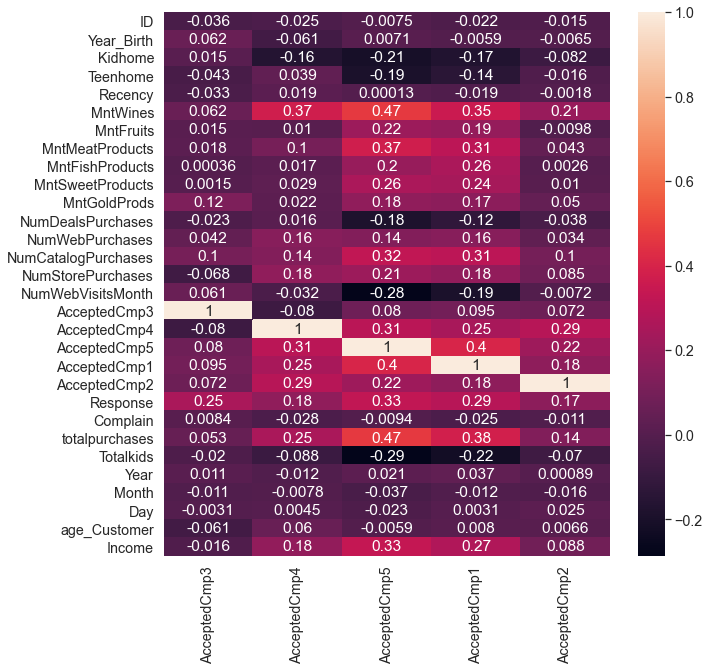

In [87]:
sns.heatmap(df.corr()[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2']],annot=True)

In [ ]:
sns.heatmap(df.corr()[[ 'AcceptedCmp5', 'AcceptedCmp1','totalpurchases','Income']],annot=True)

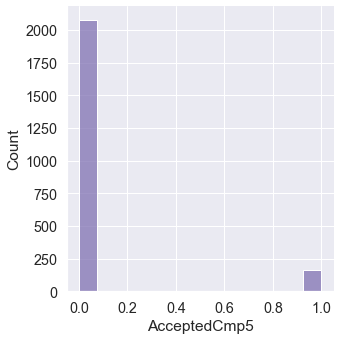

In [88]:
sns.displot(df['AcceptedCmp5'],kde=False,color='m')

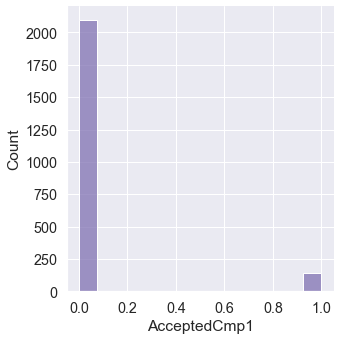

In [91]:
sns.displot(df['AcceptedCmp1'],kde=False,color='m')

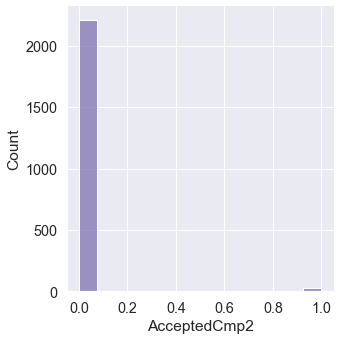

In [92]:
sns.displot(df['AcceptedCmp2'],kde=False,color='m')

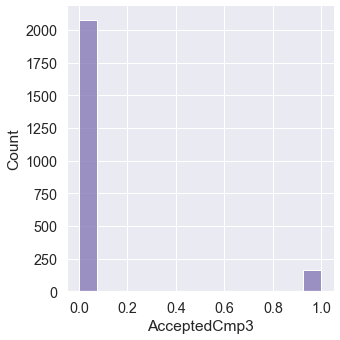

In [93]:
sns.displot(df['AcceptedCmp3'],kde=False,color='m')

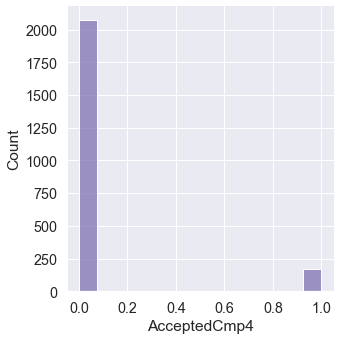

In [94]:
sns.displot(df['AcceptedCmp4'],kde=False,color='m')

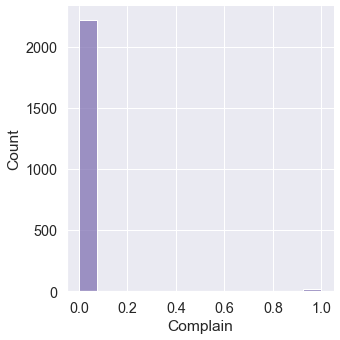

In [219]:
sns.displot(df['Complain'],kde=False,color='m')

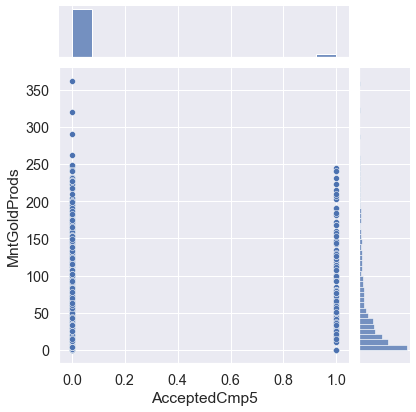

In [156]:
sns.jointplot(y='MntGoldProds',x='AcceptedCmp5',data=df)

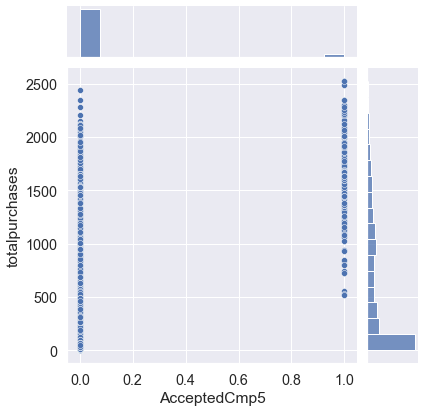

In [148]:
sns.jointplot(y='totalpurchases',x='AcceptedCmp5',data=df)

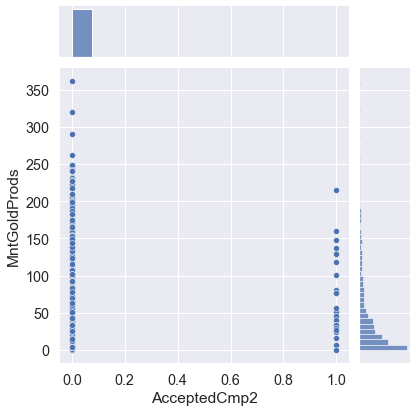

In [159]:
sns.jointplot(y='MntGoldProds',x='AcceptedCmp2',data=df)

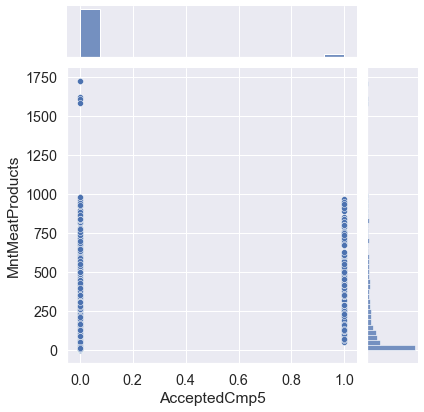

In [154]:
sns.jointplot(y='MntMeatProducts',x='AcceptedCmp5',data=df)

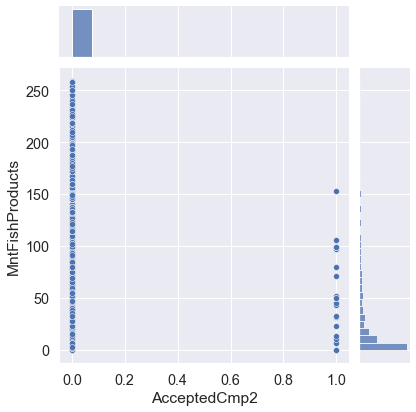

In [162]:
sns.jointplot(y='MntFishProducts',x='AcceptedCmp2',data=df)

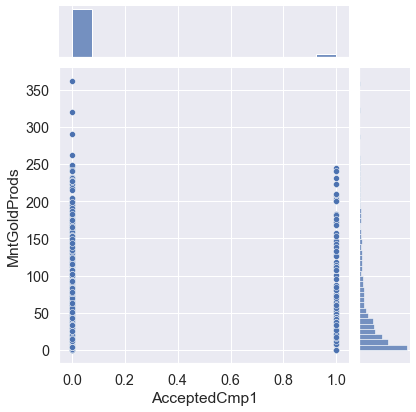

In [158]:
sns.jointplot(y='MntGoldProds',x='AcceptedCmp1',data=df)

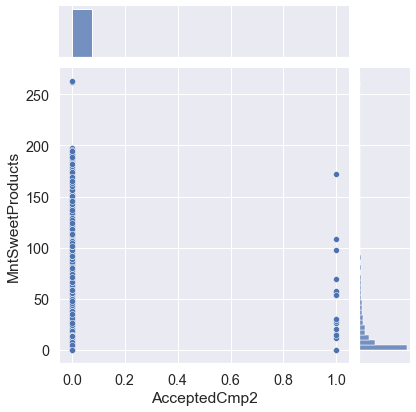

In [161]:
sns.jointplot(y='MntSweetProducts',x='AcceptedCmp2',data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


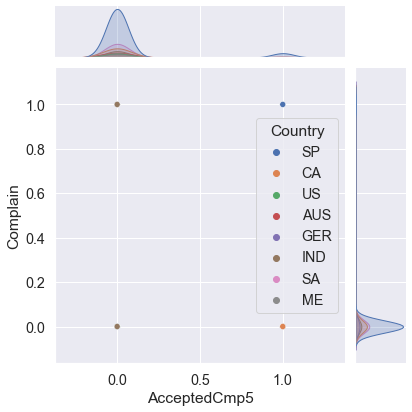

In [166]:
sns.jointplot(y='Complain',x='AcceptedCmp5',data=df,hue='Country')

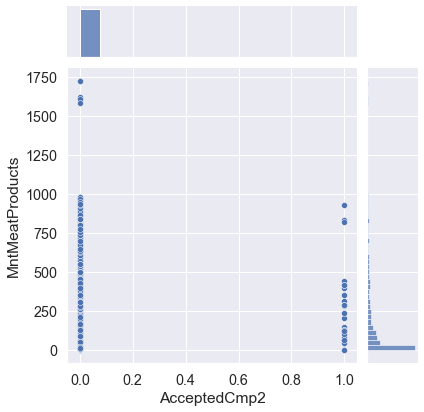

In [163]:
sns.jointplot(y='MntMeatProducts',x='AcceptedCmp2',data=df)

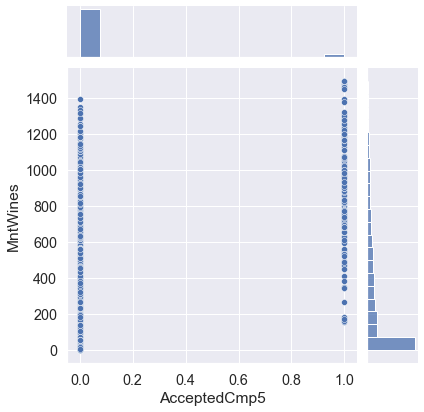

In [157]:
sns.jointplot(y='MntWines',x='AcceptedCmp5',data=df)

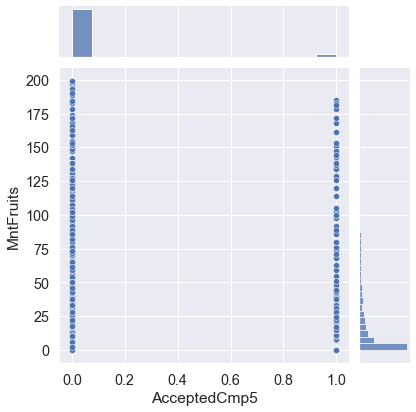

In [155]:
sns.jointplot(y='MntFruits',x='AcceptedCmp5',data=df)

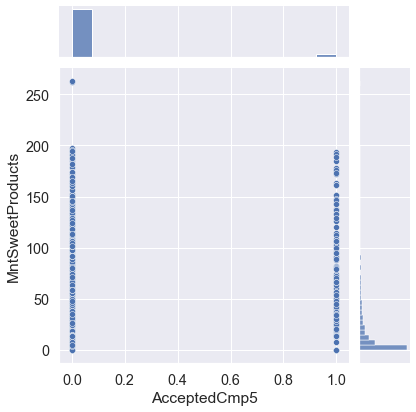

In [152]:
sns.jointplot(x='AcceptedCmp5',y='MntSweetProducts',data=df)

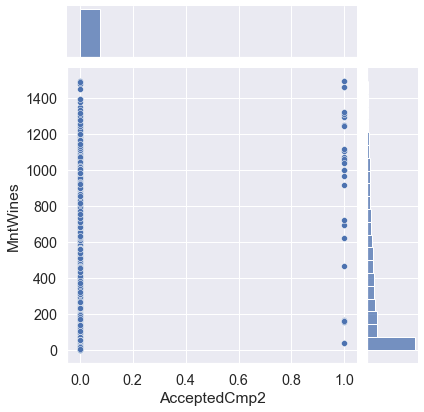

In [160]:
sns.jointplot(y='MntWines',x='AcceptedCmp2',data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


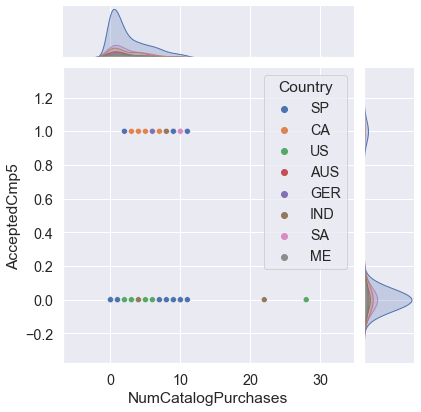

In [192]:
sns.jointplot(x='NumCatalogPurchases',y='AcceptedCmp5',data=df,hue='Country')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


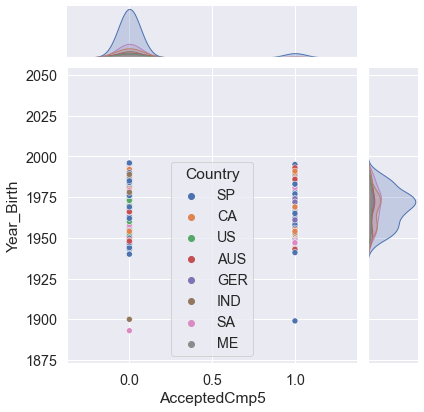

In [189]:
sns.jointplot(y='Year_Birth',x='AcceptedCmp5',data=df,hue='Country')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


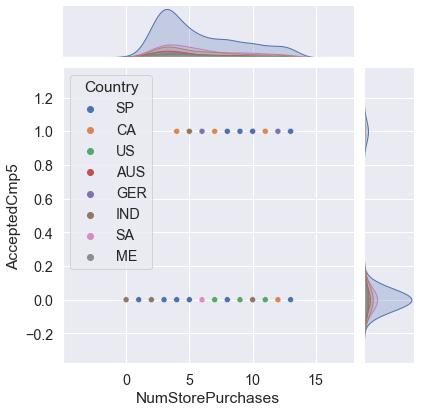

In [193]:
sns.jointplot(x='NumStorePurchases',y='AcceptedCmp5',data=df,hue='Country')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


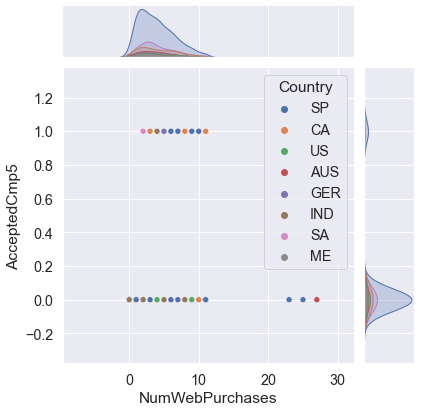

In [191]:
sns.jointplot(x='NumWebPurchases',y='AcceptedCmp5',data=df,hue='Country')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


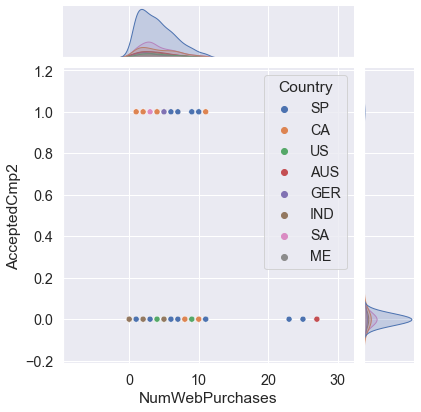

In [194]:
sns.jointplot(x='NumWebPurchases',y='AcceptedCmp2',data=df,hue='Country')

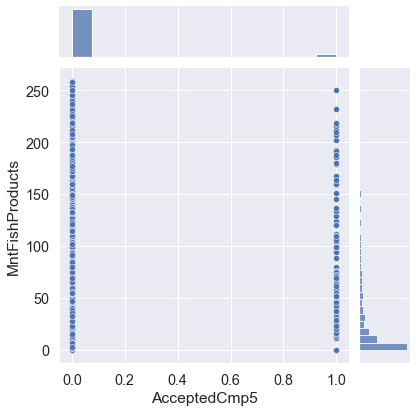

In [153]:
sns.jointplot(y='MntFishProducts',x='AcceptedCmp5',data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


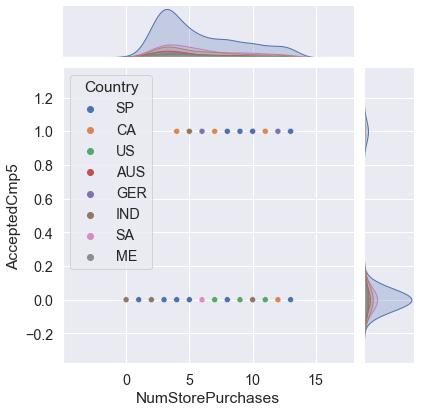

In [196]:
sns.jointplot(x='NumStorePurchases',y='AcceptedCmp5',data=df,hue='Country')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


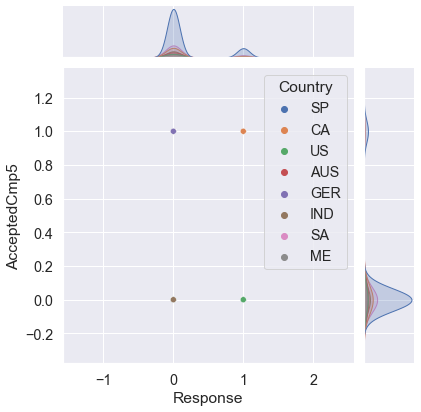

In [165]:
sns.jointplot(x='Response',y='AcceptedCmp5',data=df,hue='Country')


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


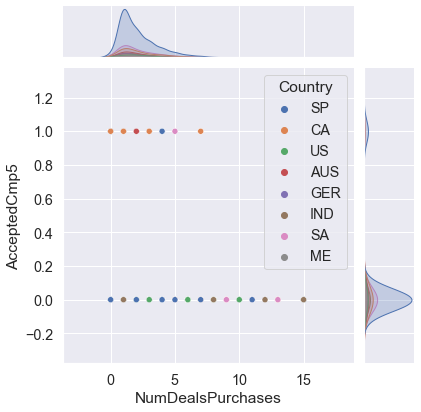

In [195]:
sns.jointplot(x='NumDealsPurchases',y='AcceptedCmp5',data=df,hue='Country')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


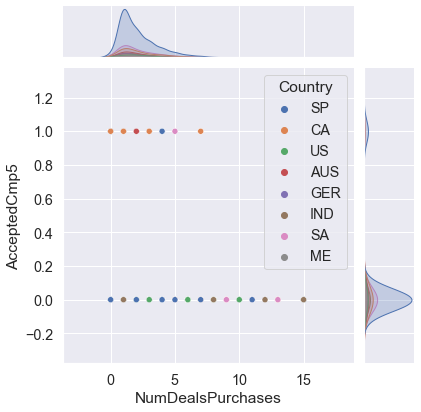

In [190]:
sns.jointplot(x='NumDealsPurchases',y='AcceptedCmp5',data=df,hue='Country')

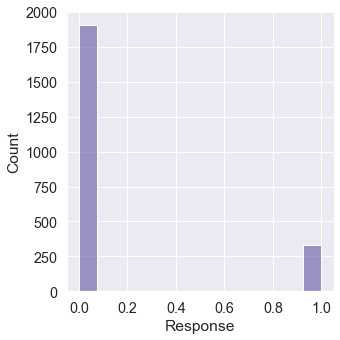

In [220]:
sns.displot(df['Response'],kde=False,color='m')

#### marketing campaign is most successful AcceptedCmp5 & AcceptedCmp1

####  channels are underperforming [AcceptedCmp2,AcceptedCmp3,AcceptedCmp4]

### Which products are performing best?

In [157]:
df.groupby('Income').describe()[[ 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4']].transpose()

Income              1730.0    2447.0    3502.0    4023.0    4428.0    \
AcceptedCmp5 count       1.0       1.0       1.0       1.0       1.0   
             mean        0.0       0.0       0.0       0.0       0.0   
             std         NaN       NaN       NaN       NaN       NaN   
             min         0.0       0.0       0.0       0.0       0.0   
             25%         0.0       0.0       0.0       0.0       0.0   
             50%         0.0       0.0       0.0       0.0       0.0   
             75%         0.0       0.0       0.0       0.0       0.0   
             max         0.0       0.0       0.0       0.0       0.0   
AcceptedCmp1 count       1.0       1.0       1.0       1.0       1.0   
             mean        0.0       0.0       0.0       0.0       0.0   
             std         NaN       NaN       NaN       NaN       NaN   
             min         0.0       0.0       0.0       0.0       0.0   
             25%         0.0       0.0       0.0       0.0       0.0   
             50%         0.0       0.0       0.0       0.0       0.0   
             75%         0.0       0.0       0.0       0.0       0.0   
             max         0.0       0.0       0.0       0.0       0.0   
AcceptedCmp2 count       1.0       1.0       1.0       1.0       1.0   
             mean        0.0       0.0       0.0       0.0       0.0   
             std         NaN       NaN       NaN       NaN       NaN   
             min         0.0       0.0       0.0       0.0       0.0   
             25%         0.0       0.0       0.0       0.0       0.0   
             50%         0.0       0.0       0.0       0.0       0.0   
             75%         0.0       0.0       0.0       0.0       0.0   
             max         0.0       0.0       0.0       0.0       0.0   
AcceptedCmp3 count       1.0       1.0       1.0       1.0       1.0   
             mean        0.0       0.0       0.0       0.0       0.0   
             std         NaN       NaN       NaN       NaN       NaN   
             min         0.0       0.0       0.0       0.0       0.0   
             25%         0.0       0.0       0.0       0.0       0.0   
             50%         0.0       0.0       0.0       0.0       0.0   
             75%         0.0       0.0       0.0       0.0       0.0   
             max         0.0       0.0       0.0       0.0       0.0   
AcceptedCmp4 count       1.0       1.0       1.0       1.0       1.0   
             mean        0.0       0.0       0.0       0.0       0.0   
             std         NaN       NaN       NaN       NaN       NaN   
             min         0.0       0.0       0.0       0.0       0.0   
             25%         0.0       0.0       0.0       0.0       0.0   
             50%         0.0       0.0       0.0       0.0       0.0   
             75%         0.0       0.0       0.0       0.0       0.0   
             max         0.0       0.0       0.0       0.0       0.0   

Income              4861.0    5305.0    5648.0    6560.0    6835.0    ...  \
AcceptedCmp5 count       1.0       1.0       1.0       1.0       1.0  ...   
             mean        0.0       0.0       0.0       0.0       0.0  ...   
             std         NaN       NaN       NaN       NaN       NaN  ...   
             min         0.0       0.0       0.0       0.0       0.0  ...   
             25%         0.0       0.0       0.0       0.0       0.0  ...   
             50%         0.0       0.0       0.0       0.0       0.0  ...   
             75%         0.0       0.0       0.0       0.0       0.0  ...   
             max         0.0       0.0       0.0       0.0       0.0  ...   
AcceptedCmp1 count       1.0       1.0       1.0       1.0       1.0  ...   
             mean        0.0       0.0       0.0       0.0       0.0  ...   
             std         NaN       NaN       NaN       NaN       NaN  ...   
             min         0.0       0.0       0.0       0.0       0.0  ...   
             25%         0.0       0.0       0

In [236]:
df.groupby('MntFishProducts').describe()[[ 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4']].transpose()

MntFishProducts            0          1           2           3           4    \
AcceptedCmp5 count  384.000000  10.000000  156.000000  130.000000  108.000000   
             mean     0.044271   0.000000    0.000000    0.000000    0.000000   
             std      0.205965   0.000000    0.000000    0.000000    0.000000   
             min      0.000000   0.000000    0.000000    0.000000    0.000000   
             25%      0.000000   0.000000    0.000000    0.000000    0.000000   
             50%      0.000000   0.000000    0.000000    0.000000    0.000000   
             75%      0.000000   0.000000    0.000000    0.000000    0.000000   
             max      1.000000   0.000000    0.000000    0.000000    0.000000   
AcceptedCmp1 count  384.000000  10.000000  156.000000  130.000000  108.000000   
             mean     0.049479   0.000000    0.000000    0.007692    0.000000   
             std      0.217149   0.000000    0.000000    0.087706    0.000000   
             min      0.000000   0.000000    0.000000    0.000000    0.000000   
             25%      0.000000   0.000000    0.000000    0.000000    0.000000   
             50%      0.000000   0.000000    0.000000    0.000000    0.000000   
             75%      0.000000   0.000000    0.000000    0.000000    0.000000   
             max      1.000000   0.000000    0.000000    1.000000    0.000000   
AcceptedCmp2 count  384.000000  10.000000  156.000000  130.000000  108.000000   
             mean     0.028646   0.000000    0.000000    0.000000    0.000000   
             std      0.167027   0.000000    0.000000    0.000000    0.000000   
             min      0.000000   0.000000    0.000000    0.000000    0.000000   
             25%      0.000000   0.000000    0.000000    0.000000    0.000000   
             50%      0.000000   0.000000    0.000000    0.000000    0.000000   
             75%      0.000000   0.000000    0.000000    0.000000    0.000000   
             max      1.000000   0.000000    0.000000    0.000000    0.000000   
AcceptedCmp3 count  384.000000  10.000000  156.000000  130.000000  108.000000   
             mean     0.096354   0.100000    0.070513    0.061538    0.092593   
             std      0.295461   0.316228    0.256834    0.241245    0.291212   
             min      0.000000   0.000000    0.000000    0.000000    0.000000   
             25%      0.000000   0.000000    0.000000    0.000000    0.000000   
             50%      0.000000   0.000000    0.000000    0.000000    0.000000   
             75%      0.000000   0.000000    0.000000    0.000000    0.000000   
             max      1.000000   1.000000    1.000000    1.000000    1.000000   
AcceptedCmp4 count  384.000000  10.000000  156.000000  130.000000  108.000000   
             mean     0.127604   0.000000    0.006410    0.015385    0.027778   
             std      0.334084   0.000000    0.080064    0.123553    0.165102   
             min      0.000000   0.000000    0.000000    0.000000    0.000000   
             25%      0.000000   0.000000    0.000000    0.000000    0.000000   
             50%      0.000000   0.000000    0.000000    0.000000    0.000000   
             75%      0.000000   0.000000    0.000000    0.000000    0.000000   
             max      1.000000   0.000000    1.000000    1.000000    1.000000   

MntFishProducts     5          6          7          8          10   ...  \
AcceptedCmp5 count  1.0  82.000000  66.000000  58.000000  55.000000  ...   
             mean   0.0   0.000000   0.000000   0.000000   0.000000  ...   
             std    NaN   0.000000   0.000000   0.000000   0.000000  ...   
             min    0.0   0.000000   0.000000   0.000000   0.000000  ...   
             25%    0.0   0.000000   0.000000   0.000000   0.000000  ...   
             50%    0.0   0.000000   0.000000   0.000000   0.000000  ...   
             75%    0.0   0.000000   0.000000   0.000000   0.000000  ...   
             max    0.0   0.000000   0.000000   0.000000   0.000000  .

In [237]:
df.groupby('MntSweetProducts').describe()[[ 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4']].transpose()

MntSweetProducts           0           1           2           3          4    \
AcceptedCmp5 count  419.000000  161.000000  128.000000  101.000000  82.000000   
             mean     0.028640    0.000000    0.000000    0.000000   0.000000   
             std      0.166991    0.000000    0.000000    0.000000   0.000000   
             min      0.000000    0.000000    0.000000    0.000000   0.000000   
             25%      0.000000    0.000000    0.000000    0.000000   0.000000   
             50%      0.000000    0.000000    0.000000    0.000000   0.000000   
             75%      0.000000    0.000000    0.000000    0.000000   0.000000   
             max      1.000000    0.000000    0.000000    0.000000   0.000000   
AcceptedCmp1 count  419.000000  161.000000  128.000000  101.000000  82.000000   
             mean     0.031026    0.000000    0.007812    0.019802   0.012195   
             std      0.173596    0.000000    0.088388    0.140014   0.110432   
             min      0.000000    0.000000    0.000000    0.000000   0.000000   
             25%      0.000000    0.000000    0.000000    0.000000   0.000000   
             50%      0.000000    0.000000    0.000000    0.000000   0.000000   
             75%      0.000000    0.000000    0.000000    0.000000   0.000000   
             max      1.000000    0.000000    1.000000    1.000000   1.000000   
AcceptedCmp2 count  419.000000  161.000000  128.000000  101.000000  82.000000   
             mean     0.028640    0.000000    0.000000    0.000000   0.000000   
             std      0.166991    0.000000    0.000000    0.000000   0.000000   
             min      0.000000    0.000000    0.000000    0.000000   0.000000   
             25%      0.000000    0.000000    0.000000    0.000000   0.000000   
             50%      0.000000    0.000000    0.000000    0.000000   0.000000   
             75%      0.000000    0.000000    0.000000    0.000000   0.000000   
             max      1.000000    0.000000    0.000000    0.000000   0.000000   
AcceptedCmp3 count  419.000000  161.000000  128.000000  101.000000  82.000000   
             mean     0.078759    0.111801    0.101562    0.049505   0.048780   
             std      0.269684    0.316105    0.303259    0.218002   0.216734   
             min      0.000000    0.000000    0.000000    0.000000   0.000000   
             25%      0.000000    0.000000    0.000000    0.000000   0.000000   
             50%      0.000000    0.000000    0.000000    0.000000   0.000000   
             75%      0.000000    0.000000    0.000000    0.000000   0.000000   
             max      1.000000    1.000000    1.000000    1.000000   1.000000   
AcceptedCmp4 count  419.000000  161.000000  128.000000  101.000000  82.000000   
             mean     0.121718    0.006211    0.007812    0.039604   0.036585   
             std      0.327351    0.078811    0.088388    0.196000   0.188897   
             min      0.000000    0.000000    0.000000    0.000000   0.000000   
             25%      0.000000    0.000000    0.000000    0.000000   0.000000   
             50%      0.000000    0.000000    0.000000    0.000000   0.000000   
             75%      0.000000    0.000000    0.000000    0.000000   0.000000   
             max      1.000000    1.000000    1.000000    1.000000   1.000000   

MntSweetProducts          5          6          7          8          9    \
AcceptedCmp5 count  65.000000  64.000000  57.000000  56.000000  42.000000   
             mean    0.000000   0.000000   0.000000   0.017857   0.000000   
             std     0.000000   0.000000   0.000000   0.133631   0.000000   
             min     0.000000   0.000000   0.000000   0.000000   0.000000   
             25%     0.000000   0.000000   0.000000   0.000000   0.000000   
             50%     0.000000   0.000000   0.000000   0.000000   0.000000   
             75%     0.000000   0.000000   0.000000   0.000000   0.000000   
             max     0.000000   0.000000   0.000000   1.000000

In [238]:
df.groupby('MntGoldProds').describe()[[ 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4']].transpose()

MntGoldProds              0          1          2          3          4    \
AcceptedCmp5 count  61.000000  73.000000  62.000000  69.000000  70.000000   
             mean    0.114754   0.000000   0.000000   0.000000   0.000000   
             std     0.321370   0.000000   0.000000   0.000000   0.000000   
             min     0.000000   0.000000   0.000000   0.000000   0.000000   
             25%     0.000000   0.000000   0.000000   0.000000   0.000000   
             50%     0.000000   0.000000   0.000000   0.000000   0.000000   
             75%     0.000000   0.000000   0.000000   0.000000   0.000000   
             max     1.000000   0.000000   0.000000   0.000000   0.000000   
AcceptedCmp1 count  61.000000  73.000000  62.000000  69.000000  70.000000   
             mean    0.081967   0.000000   0.000000   0.000000   0.000000   
             std     0.276591   0.000000   0.000000   0.000000   0.000000   
             min     0.000000   0.000000   0.000000   0.000000   0.000000   
             25%     0.000000   0.000000   0.000000   0.000000   0.000000   
             50%     0.000000   0.000000   0.000000   0.000000   0.000000   
             75%     0.000000   0.000000   0.000000   0.000000   0.000000   
             max     1.000000   0.000000   0.000000   0.000000   0.000000   
AcceptedCmp2 count  61.000000  73.000000  62.000000  69.000000  70.000000   
             mean    0.016393   0.000000   0.000000   0.000000   0.000000   
             std     0.128037   0.000000   0.000000   0.000000   0.000000   
             min     0.000000   0.000000   0.000000   0.000000   0.000000   
             25%     0.000000   0.000000   0.000000   0.000000   0.000000   
             50%     0.000000   0.000000   0.000000   0.000000   0.000000   
             75%     0.000000   0.000000   0.000000   0.000000   0.000000   
             max     1.000000   0.000000   0.000000   0.000000   0.000000   
AcceptedCmp3 count  61.000000  73.000000  62.000000  69.000000  70.000000   
             mean    0.000000   0.013699   0.000000   0.014493   0.014286   
             std     0.000000   0.117041   0.000000   0.120386   0.119523   
             min     0.000000   0.000000   0.000000   0.000000   0.000000   
             25%     0.000000   0.000000   0.000000   0.000000   0.000000   
             50%     0.000000   0.000000   0.000000   0.000000   0.000000   
             75%     0.000000   0.000000   0.000000   0.000000   0.000000   
             max     0.000000   1.000000   0.000000   1.000000   1.000000   
AcceptedCmp4 count  61.000000  73.000000  62.000000  69.000000  70.000000   
             mean    0.098361   0.000000   0.048387   0.028986   0.057143   
             std     0.300273   0.000000   0.216335   0.168995   0.233791   
             min     0.000000   0.000000   0.000000   0.000000   0.000000   
             25%     0.000000   0.000000   0.000000   0.000000   0.000000   
             50%     0.000000   0.000000   0.000000   0.000000   0.000000   
             75%     0.000000   0.000000   0.000000   0.000000   0.000000   
             max     1.000000   0.000000   1.000000   1.000000   1.000000   

MntGoldProds              5          6          7          8          9    \
AcceptedCmp5 count  63.000000  57.000000  54.000000  40.000000  44.000000   
             mean    0.000000   0.000000   0.000000   0.000000   0.000000   
             std     0.000000   0.000000   0.000000   0.000000   0.000000   
             min     0.000000   0.000000   0.000000   0.000000   0.000000   
             25%     0.000000   0.000000   0.000000   0.000000   0.000000   
             50%     0.000000   0.000000   0.000000   0.000000   0.000000   
             75%     0.000000   0.000000   0.000000   0.000000   0.000000   
             max     0.000000   0.000000   0.000000   0.000000   0.000000   
AcceptedCmp1 count  63.000000  57.000000  54.000000  40.000000  44.000000   
             mean    0.000000   0.017544   0.000000   0.050000   0.00000

In [239]:
df.groupby('MntFruits').describe()[[ 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4']].transpose()

MntFruits                  0           1           2           3    \
AcceptedCmp5 count  400.000000  162.000000  120.000000  116.000000   
             mean     0.027500    0.000000    0.000000    0.000000   
             std      0.163740    0.000000    0.000000    0.000000   
             min      0.000000    0.000000    0.000000    0.000000   
             25%      0.000000    0.000000    0.000000    0.000000   
             50%      0.000000    0.000000    0.000000    0.000000   
             75%      0.000000    0.000000    0.000000    0.000000   
             max      1.000000    0.000000    0.000000    0.000000   
AcceptedCmp1 count  400.000000  162.000000  120.000000  116.000000   
             mean     0.047500    0.000000    0.008333    0.000000   
             std      0.212972    0.000000    0.091287    0.000000   
             min      0.000000    0.000000    0.000000    0.000000   
             25%      0.000000    0.000000    0.000000    0.000000   
             50%      0.000000    0.000000    0.000000    0.000000   
             75%      0.000000    0.000000    0.000000    0.000000   
             max      1.000000    0.000000    1.000000    0.000000   
AcceptedCmp2 count  400.000000  162.000000  120.000000  116.000000   
             mean     0.022500    0.000000    0.000000    0.000000   
             std      0.148489    0.000000    0.000000    0.000000   
             min      0.000000    0.000000    0.000000    0.000000   
             25%      0.000000    0.000000    0.000000    0.000000   
             50%      0.000000    0.000000    0.000000    0.000000   
             75%      0.000000    0.000000    0.000000    0.000000   
             max      1.000000    0.000000    0.000000    0.000000   
AcceptedCmp3 count  400.000000  162.000000  120.000000  116.000000   
             mean     0.075000    0.061728    0.075000    0.068966   
             std      0.263721    0.241408    0.264496    0.254495   
             min      0.000000    0.000000    0.000000    0.000000   
             25%      0.000000    0.000000    0.000000    0.000000   
             50%      0.000000    0.000000    0.000000    0.000000   
             75%      0.000000    0.000000    0.000000    0.000000   
             max      1.000000    1.000000    1.000000    1.000000   
AcceptedCmp4 count  400.000000  162.000000  120.000000  116.000000   
             mean     0.100000    0.012346    0.025000    0.017241   
             std      0.300376    0.110766    0.156780    0.130734   
             min      0.000000    0.000000    0.000000    0.000000   
             25%      0.000000    0.000000    0.000000    0.000000   
             50%      0.000000    0.000000    0.000000    0.000000   
             75%      0.000000    0.000000    0.000000    0.000000   
             max      1.000000    1.000000    1.000000    1.000000   

MntFruits                  4          5          6          7          8    \
AcceptedCmp5 count  104.000000  65.000000  62.000000  67.000000  48.000000   
             mean     0.000000   0.000000   0.000000   0.014925   0.020833   
             std      0.000000   0.000000   0.000000   0.122169   0.144338   
             min      0.000000   0.000000   0.000000   0.000000   0.000000   
             25%      0.000000   0.000000   0.000000   0.000000   0.000000   
             50%      0.000000   0.000000   0.000000   0.000000   0.000000   
             75%      0.000000   0.000000   0.000000   0.000000   0.000000   
             max      0.000000   0.000000   0.000000   1.000000   1.000000   
AcceptedCmp1 count  104.000000  65.000000  62.000000  67.000000  48.000000   
             mean     0.009615   0.000000   0.016129   0.014925   0.020833   
             std      0.098058   0.000000   0.127000   0.122169   0.144338   
             min      0.000000   0.000000   0.000000   0.000000   0.000000   
             25%      0.000000   0.000000   0.000000   0.000000   0.000000   
             50%      0.000000   0.00

In [240]:
df.groupby('MntWines').describe()[[ 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4']].transpose()

MntWines                 0          1          2          3          4     \
AcceptedCmp5 count  13.000000  37.000000  42.000000  30.000000  33.000000   
             mean    0.000000   0.000000   0.000000   0.000000   0.000000   
             std     0.000000   0.000000   0.000000   0.000000   0.000000   
             min     0.000000   0.000000   0.000000   0.000000   0.000000   
             25%     0.000000   0.000000   0.000000   0.000000   0.000000   
             50%     0.000000   0.000000   0.000000   0.000000   0.000000   
             75%     0.000000   0.000000   0.000000   0.000000   0.000000   
             max     0.000000   0.000000   0.000000   0.000000   0.000000   
AcceptedCmp1 count  13.000000  37.000000  42.000000  30.000000  33.000000   
             mean    0.000000   0.000000   0.000000   0.000000   0.000000   
             std     0.000000   0.000000   0.000000   0.000000   0.000000   
             min     0.000000   0.000000   0.000000   0.000000   0.000000   
             25%     0.000000   0.000000   0.000000   0.000000   0.000000   
             50%     0.000000   0.000000   0.000000   0.000000   0.000000   
             75%     0.000000   0.000000   0.000000   0.000000   0.000000   
             max     0.000000   0.000000   0.000000   0.000000   0.000000   
AcceptedCmp2 count  13.000000  37.000000  42.000000  30.000000  33.000000   
             mean    0.000000   0.000000   0.000000   0.000000   0.000000   
             std     0.000000   0.000000   0.000000   0.000000   0.000000   
             min     0.000000   0.000000   0.000000   0.000000   0.000000   
             25%     0.000000   0.000000   0.000000   0.000000   0.000000   
             50%     0.000000   0.000000   0.000000   0.000000   0.000000   
             75%     0.000000   0.000000   0.000000   0.000000   0.000000   
             max     0.000000   0.000000   0.000000   0.000000   0.000000   
AcceptedCmp3 count  13.000000  37.000000  42.000000  30.000000  33.000000   
             mean    0.076923   0.135135   0.047619   0.100000   0.060606   
             std     0.277350   0.346583   0.215540   0.305129   0.242306   
             min     0.000000   0.000000   0.000000   0.000000   0.000000   
             25%     0.000000   0.000000   0.000000   0.000000   0.000000   
             50%     0.000000   0.000000   0.000000   0.000000   0.000000   
             75%     0.000000   0.000000   0.000000   0.000000   0.000000   
             max     1.000000   1.000000   1.000000   1.000000   1.000000   
AcceptedCmp4 count  13.000000  37.000000  42.000000  30.000000  33.000000   
             mean    0.000000   0.000000   0.000000   0.000000   0.000000   
             std     0.000000   0.000000   0.000000   0.000000   0.000000   
             min     0.000000   0.000000   0.000000   0.000000   0.000000   
             25%     0.000000   0.000000   0.000000   0.000000   0.000000   
             50%     0.000000   0.000000   0.000000   0.000000   0.000000   
             75%     0.000000   0.000000   0.000000   0.000000   0.000000   
             max     0.000000   0.000000   0.000000   0.000000   0.000000   

MntWines                 5          6          7          8          9     \
AcceptedCmp5 count  40.000000  37.000000  22.000000  30.000000  28.000000   
             mean    0.000000   0.000000   0.000000   0.000000   0.000000   
             std     0.000000   0.000000   0.000000   0.000000   0.000000   
             min     0.000000   0.000000   0.000000   0.000000   0.000000   
             25%     0.000000   0.000000   0.000000   0.000000   0.000000   
             50%     0.000000   0.000000   0.000000   0.000000   0.000000   
             75%     0.000000   0.000000   0.000000   0.000000   0.000000   
             max     0.000000   0.000000   0.000000   0.000000   0.000000   
AcceptedCmp1 count  40.000000  37.000000  22.000000  30.000000  28.000000   
             mean    0.000000   0.000000   0.000000   0.000000   0.00000

In [168]:
df.groupby('AcceptedCmp5').describe()[[ 'MntWines', 'MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].transpose()

AcceptedCmp5                      0            1
MntWines         count  2077.000000   163.000000
                 mean    259.380838   871.668712
                 std     293.732868   332.379860
                 min       0.000000   152.000000
                 25%      20.000000   665.000000
                 50%     144.000000   901.000000
                 75%     423.000000  1093.500000
                 max    1396.000000  1493.000000
MntFruits        count  2077.000000   163.000000
                 mean     23.897930    56.938650
                 std      37.842058    49.941904
                 min       0.000000     0.000000
                 25%       1.000000    21.000000
                 50%       7.000000    33.000000
                 75%      28.000000    87.500000
                 max     199.000000   185.000000
MntMeatProducts  count  2077.000000   163.000000
                 mean    143.321136   468.036810
                 std     205.158432   257.676845
                 min       0.000000    48.000000
                 25%      14.000000   270.500000
                 50%      55.000000   445.000000
                 75%     184.000000   691.500000
                 max    1725.000000   968.000000
MntFishProducts  count  2077.000000   163.000000
                 mean     34.471834    76.435583
                 std      52.907441    61.092021
                 min       0.000000     0.000000
                 25%       2.000000    29.000000
                 50%      11.000000    59.000000
                 75%      41.000000   110.000000
                 max     259.000000   250.000000
MntSweetProducts count  2077.000000   163.000000
                 mean     24.061627    65.306748
                 std      38.665442    52.977322
                 min       0.000000     0.000000
                 25%       1.000000    24.000000
                 50%       7.000000    45.000000
                 75%      28.000000   102.000000
                 max     263.000000   194.000000
MntGoldProds     count  2077.000000   163.000000
                 mean     41.376986    77.723926
                 std      50.297093    62.941212
                 min       0.000000     0.000000
                 25%       8.000000    28.500000
                 50%      22.000000    56.000000
                 75%      53.000000   113.000000
                 max     362.000000   245.000000

In [242]:
df.groupby('AcceptedCmp1').describe()[[ 'MntWines', 'MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].transpose()

AcceptedCmp1                      0            1
MntWines         count  2096.000000   144.000000
                 mean    272.698950   758.604167
                 std     313.536172   333.571922
                 min       0.000000   152.000000
                 25%      21.000000   502.000000
                 50%     152.000000   761.500000
                 75%     448.000000  1006.750000
                 max    1486.000000  1493.000000
MntFruits        count  2096.000000   144.000000
                 mean     24.272424    55.847222
                 std      37.649466    55.342079
                 min       0.000000     0.000000
                 25%       1.000000    19.750000
                 50%       7.000000    29.500000
                 75%      29.250000    87.750000
                 max     199.000000   190.000000
MntMeatProducts  count  2096.000000   144.000000
                 mean    148.627863   433.638889
                 std     210.933538   263.292935
                 min       0.000000    21.000000
                 25%      14.000000   196.000000
                 50%      57.000000   437.500000
                 75%     197.500000   614.750000
                 max    1725.000000   974.000000
MntFishProducts  count  2096.000000   144.000000
                 mean     33.792462    91.861111
                 std      51.048018    73.293892
                 min       0.000000     0.000000
                 25%       2.000000    32.000000
                 50%      11.000000    76.000000
                 75%      41.250000   146.250000
                 max     259.000000   253.000000
MntSweetProducts count  2096.000000   144.000000
                 mean     24.447042    65.138889
                 std      38.839822    54.960203
                 min       0.000000     0.000000
                 25%       1.000000    22.750000
                 50%       7.000000    46.500000
                 75%      29.000000    98.000000
                 max     263.000000   194.000000
MntGoldProds     count  2096.000000   144.000000
                 mean     41.747137    77.131944
                 std      50.383484    65.122289
                 min       0.000000     0.000000
                 25%       8.000000    29.750000
                 50%      22.000000    49.500000
                 75%      53.000000   112.500000
                 max     362.000000   245.000000

In [244]:
df.groupby('Country').describe()[[ 'MntWines', 'MntMeatProducts','MntFishProducts','MntFruits','MntSweetProducts','MntGoldProds']].transpose()

Country                         AUS           CA          GER          IND  \
MntWines         count   160.000000   268.000000   120.000000   148.000000   
                 mean    277.325000   315.854478   312.358333   245.054054   
                 std     312.562578   336.345180   340.739576   284.691760   
                 min       0.000000     0.000000     0.000000     0.000000   
                 25%      18.750000    27.500000    16.750000    19.750000   
                 50%     141.000000   216.500000   174.500000   112.500000   
                 75%     488.250000   526.250000   579.500000   380.250000   
                 max    1486.000000  1492.000000  1311.000000  1308.000000   
MntMeatProducts  count   160.000000   268.000000   120.000000   148.000000   
                 mean    144.356250   172.194030   173.950000   171.189189   
                 std     187.701735   227.566247   220.973661   270.459507   
                 min       1.000000     2.000000     2.000000     1.000000   
                 25%      15.000000    14.750000    13.000000    15.000000   
                 50%      48.000000    70.500000    66.500000    51.000000   
                 75%     217.250000   233.750000   291.250000   200.500000   
                 max     801.000000   951.000000   968.000000  1607.000000   
MntFishProducts  count   160.000000   268.000000   120.000000   148.000000   
                 mean     36.462500    37.417910    39.725000    32.635135   
                 std      53.409759    54.382719    56.002095    50.000292   
                 min       0.000000     0.000000     0.000000     0.000000   
                 25%       2.000000     3.000000     3.000000     2.750000   
                 50%      13.000000    12.000000    13.000000    11.000000   
                 75%      46.750000    50.000000    55.250000    35.250000   
                 max     250.000000   234.000000   247.000000   234.000000   
MntFruits        count   160.000000   268.000000   120.000000   148.000000   
                 mean     24.275000    28.902985    25.516667    25.608108   
                 std      37.721747    43.355230    37.123003    42.785756   
                 min       0.000000     0.000000     0.000000     0.000000   
                 25%       1.000000     2.000000     2.000000     1.000000   
                 50%       7.000000     9.000000    10.000000     7.000000   
                 75%      28.000000    35.250000    35.000000    30.000000   
                 max     178.000000   199.000000   178.000000   199.000000   
MntSweetProducts count   160.000000   268.000000   120.000000   148.000000   
                 mean     28.800000    28.649254    23.916667    21.790541   
                 std      46.237261    43.498032    35.324803    36.977149   
                 min       0.000000     0.000000     0.000000     0.000000   
                 25%       1.000000     1.000000     1.750000     0.000000   
                 50%       7.000000     9.000000     8.000000     4.000000   
                 75%      35.250000    35.250000    29.250000    24.250000   
                 max     263.000000   197.000000   160.000000   176.000000   
MntGoldProds     count   160.000000   268.000000   120.000000   148.000000   
                 mean     49.800000    45.832090    48.808333    40.783784   
                 std      60.918009    54.126480    54.214528    47.349696   
                 min       0.000000     0.000000     0.000000     0.000000   
                 25%       7.000000     9.000000    10.000000     7.000000   
                 50%      30.000000    26.000000    24.000000    22.000000   
                 75%      67.250000    57.000000    74.250000    54.000000   
                 max     362.000000   248.000000   246.000000   223.000000   

Country                         ME           SA           SP           US  
MntWines         count    3.000000   337.000000  1095.000000   109.000000  
                 mean   5

<AxesSubplot:>

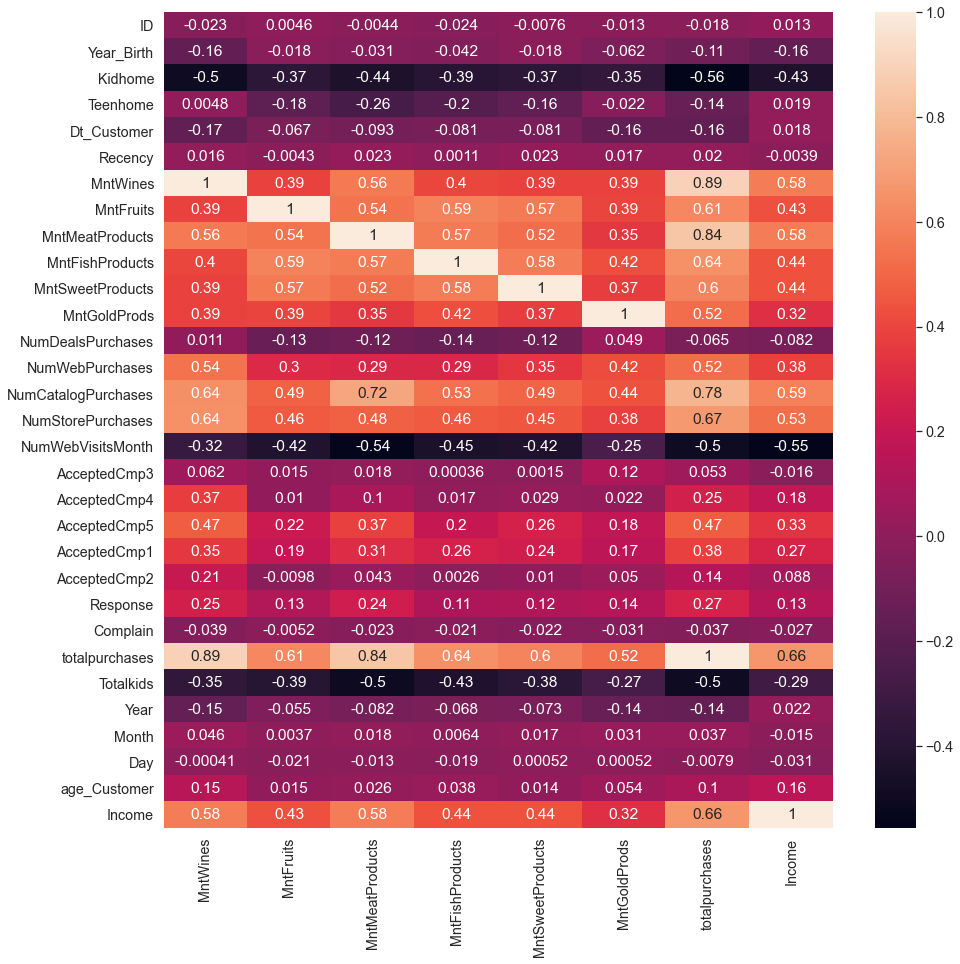

In [213]:
sns.heatmap(df.corr()[[ 'MntWines', 'MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','totalpurchases','Income']],annot=True)

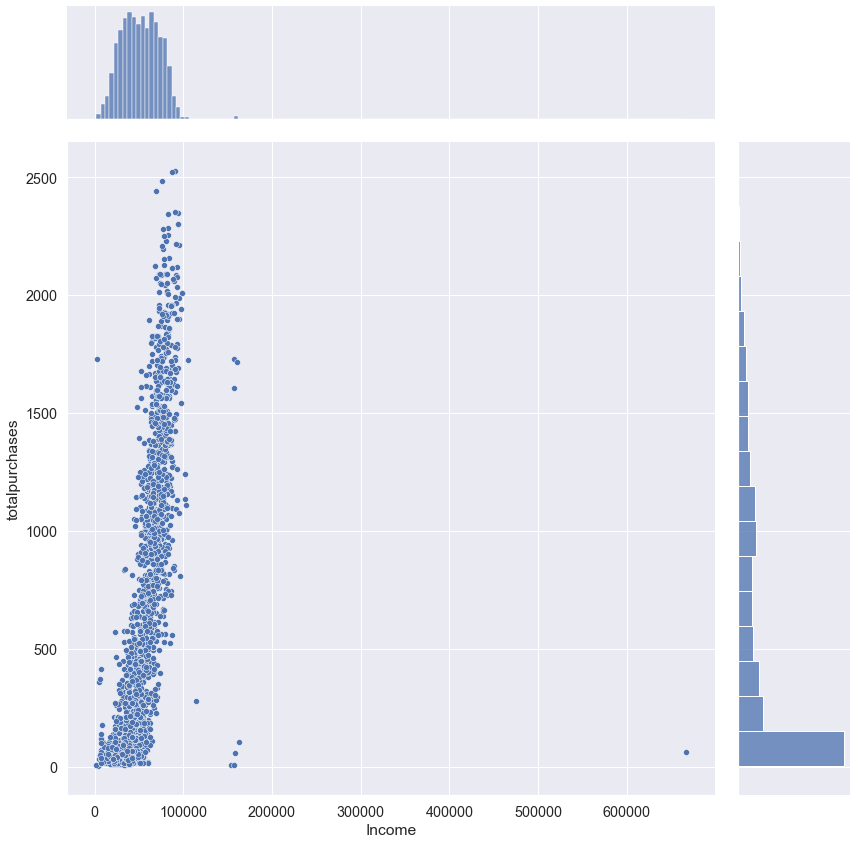

In [165]:
sns.jointplot(y='totalpurchases',x='Income',data=df,height=12)

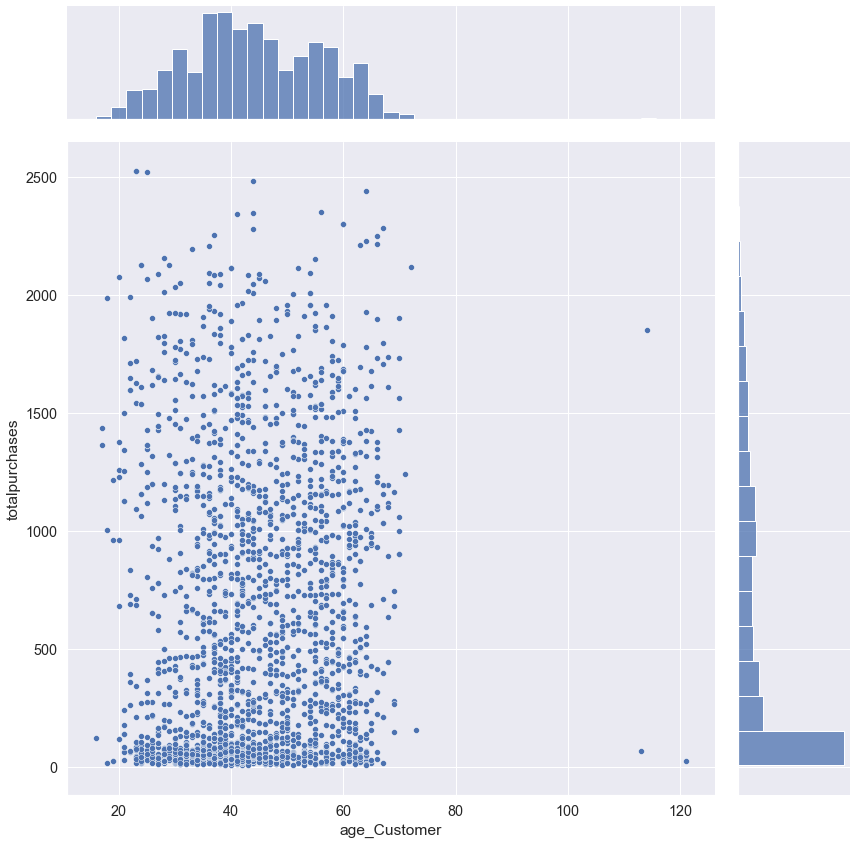

In [173]:
sns.jointplot(y='totalpurchases',x='age_Customer',data=df,height=12)

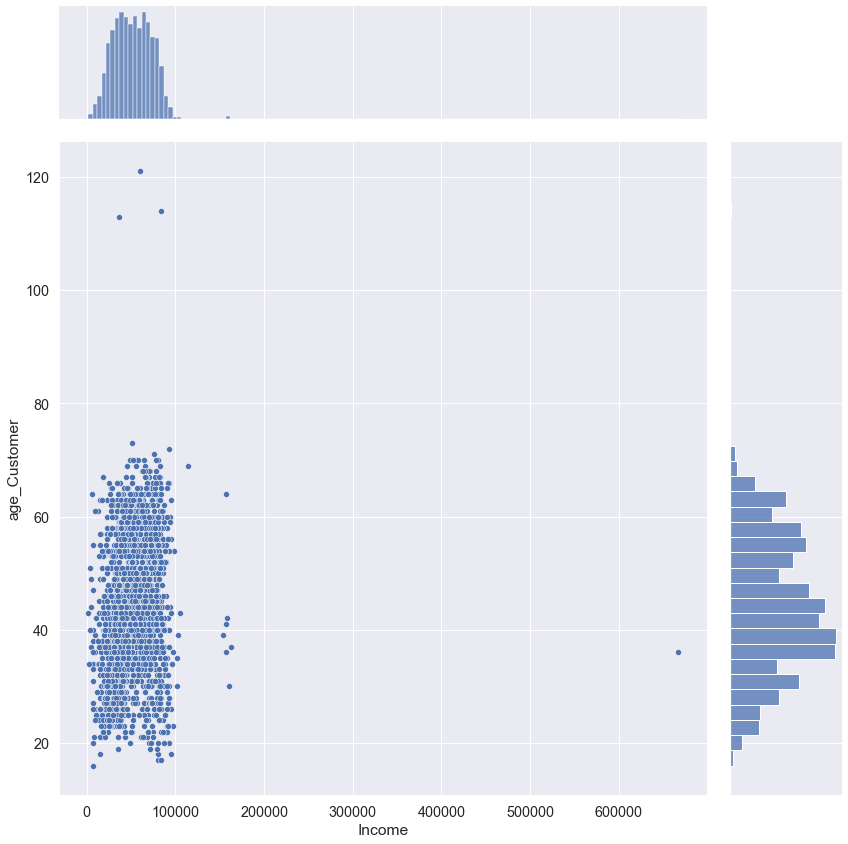

In [175]:
sns.jointplot(x='Income',y='age_Customer',data=df,height=12)

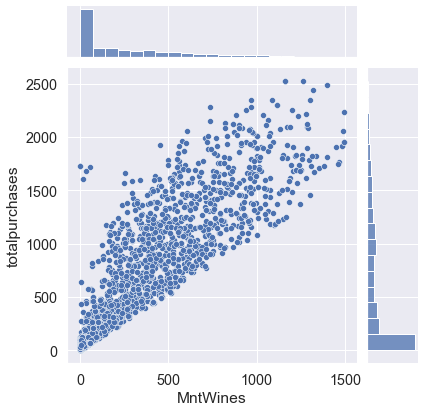

In [103]:
sns.jointplot(y='totalpurchases',x='MntWines',data=df)

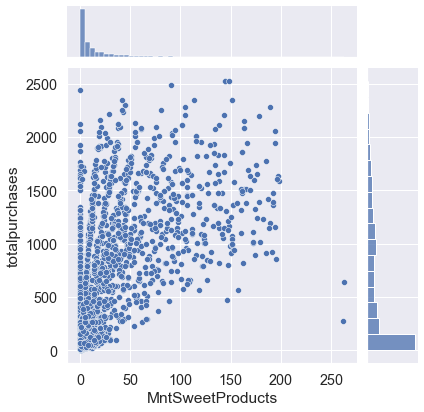

In [107]:
sns.jointplot(y='totalpurchases',x='MntSweetProducts',data=df)

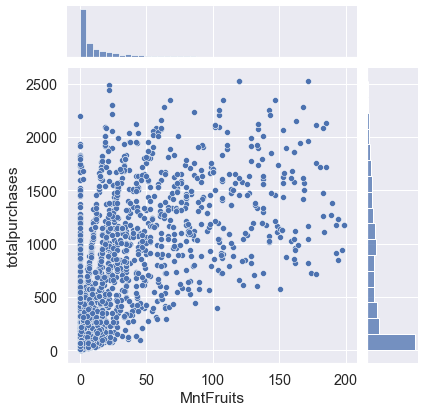

In [104]:
sns.jointplot(y='totalpurchases',x='MntFruits',data=df)

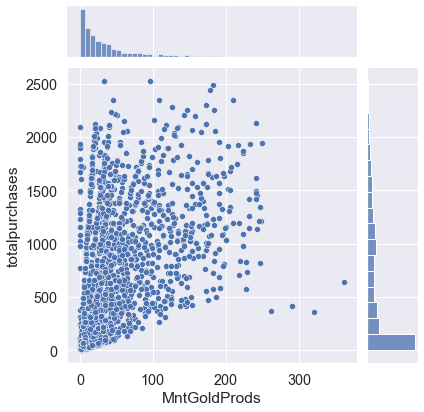

In [108]:
sns.jointplot(y='totalpurchases',x='MntGoldProds',data=df)

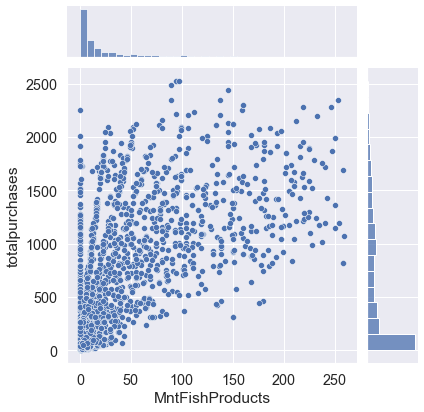

In [106]:
sns.jointplot(y='totalpurchases',x='MntFishProducts',data=df)

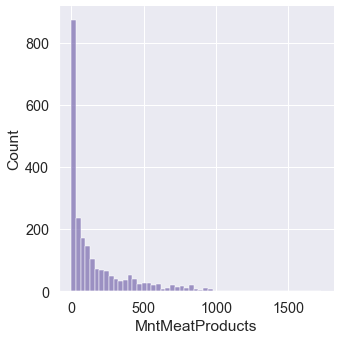

In [82]:
sns.displot(df['MntMeatProducts'],kde=False,color='m')

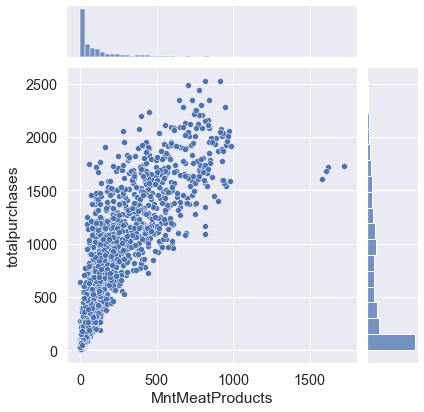

In [105]:
sns.jointplot(y='totalpurchases',x='MntMeatProducts',data=df)

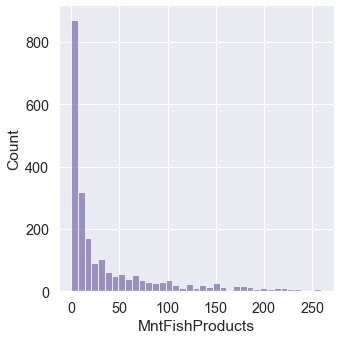

In [83]:
sns.displot(df['MntFishProducts'],kde=False,color='m')

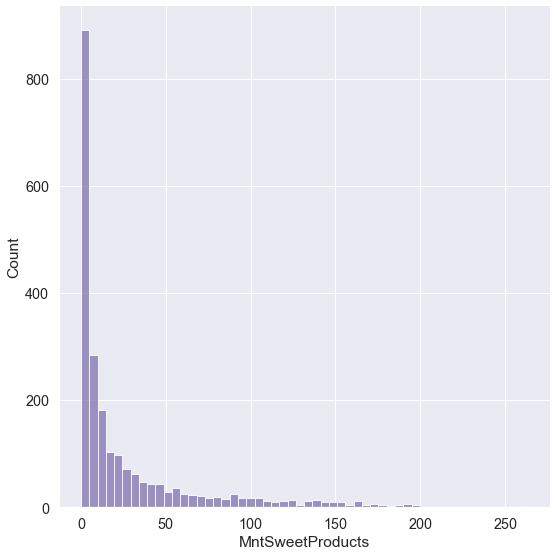

In [84]:
sns.displot(df['MntSweetProducts'],kde=False,color='m',height=8)

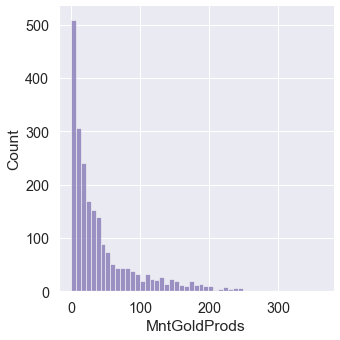

In [85]:
sns.displot(df['MntGoldProds'],kde=False,color='m')

#### products are performing best
*1-MntWines
*2-MntMeatProducts
*3-MntFishProducts
*4-MntFruits
*5-MntSweetProducts
*6-MntGoldProds


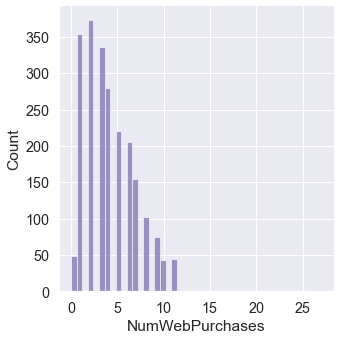

In [87]:
sns.displot(df['NumWebPurchases'],kde=False,color='m')

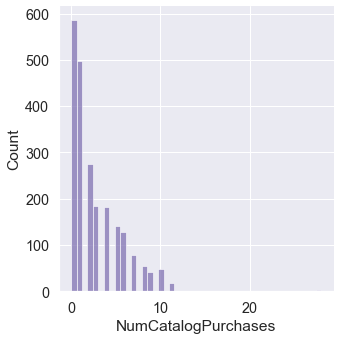

In [88]:
sns.displot(df['NumCatalogPurchases'],kde=False,color='m')

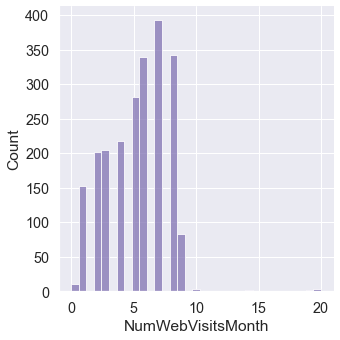

In [89]:
sns.displot(df['NumWebVisitsMonth'],kde=False,color='m')

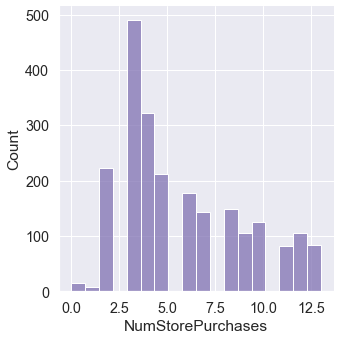

In [90]:
sns.displot(df['NumStorePurchases'],kde=False,color='m')

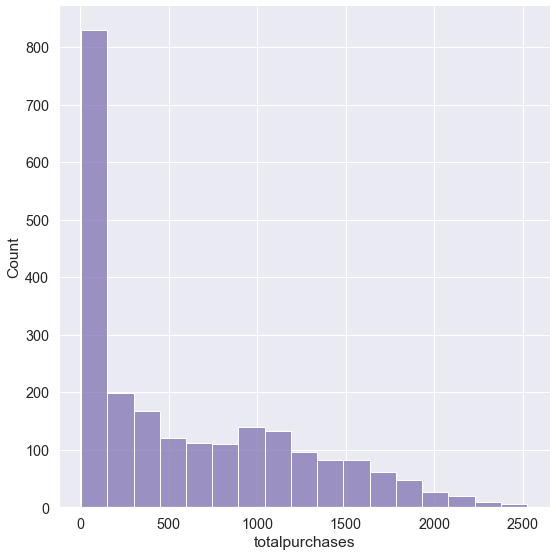

In [91]:
sns.displot(df['totalpurchases'],kde=False,color='m',height=8)

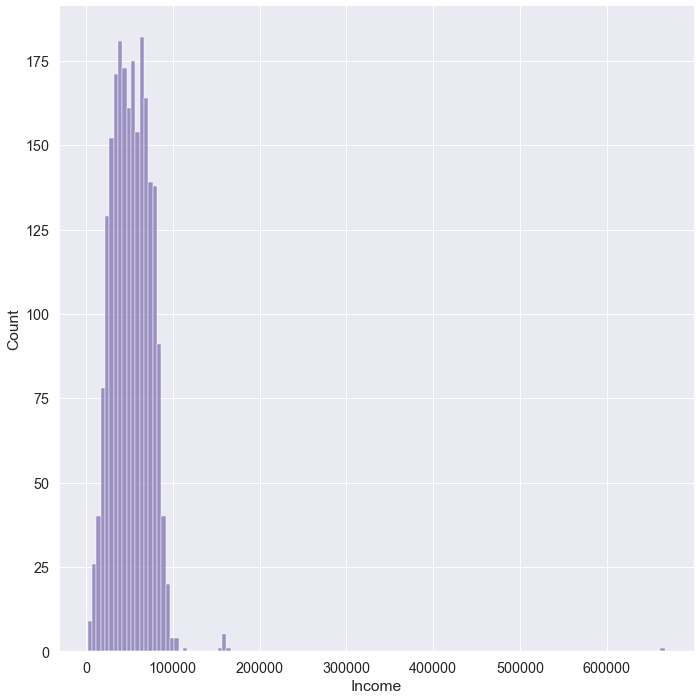

In [92]:
sns.displot(df['Income'],kde=False,color='m',height=10)

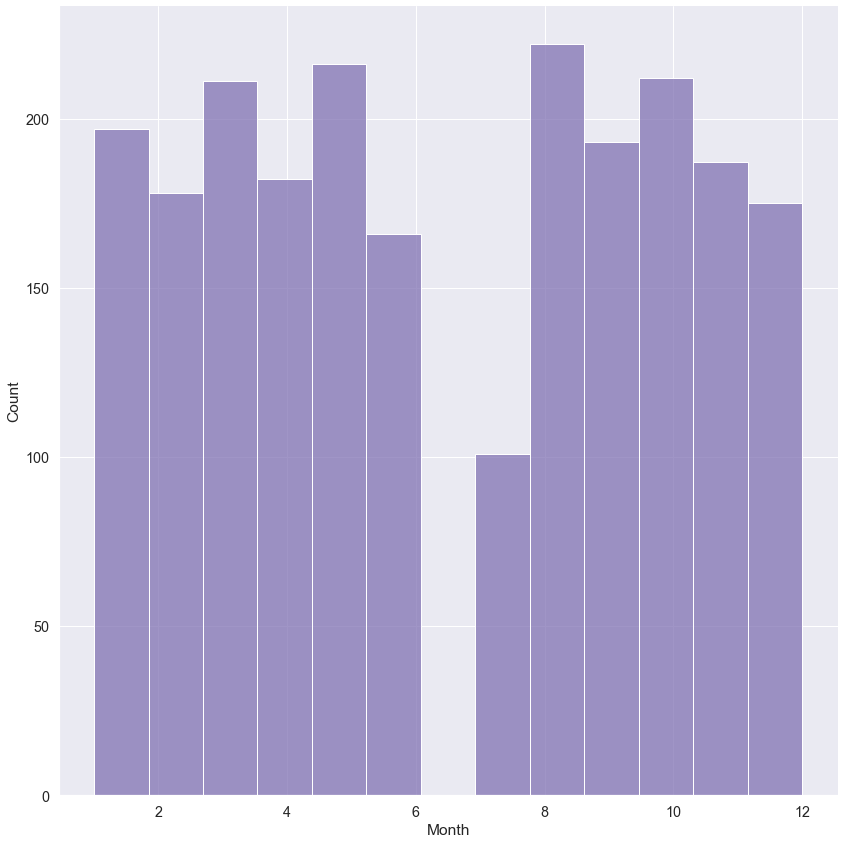

In [121]:
sns.displot(df['Month'],kde=False,color='m',height=12,hue=
)

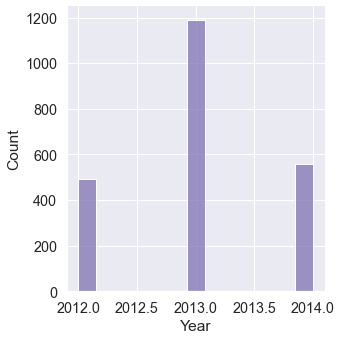

In [94]:
sns.displot(df['Year'],kde=False,color='m')

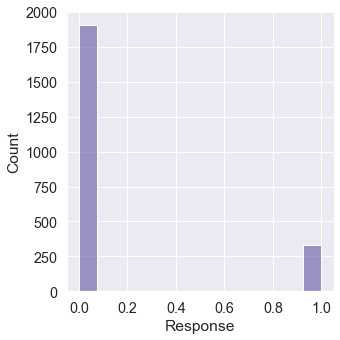

In [95]:
sns.displot(df['Response'],kde=False,color='m')

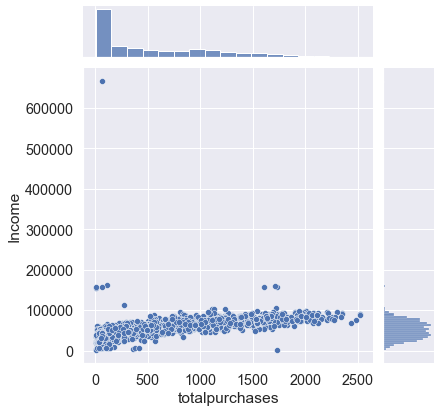

In [96]:
sns.jointplot(y='Income',x='totalpurchases',data=df)

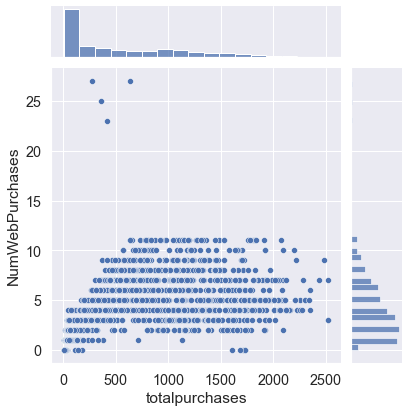

In [97]:
sns.jointplot(x='totalpurchases',y='NumWebPurchases',data=df)

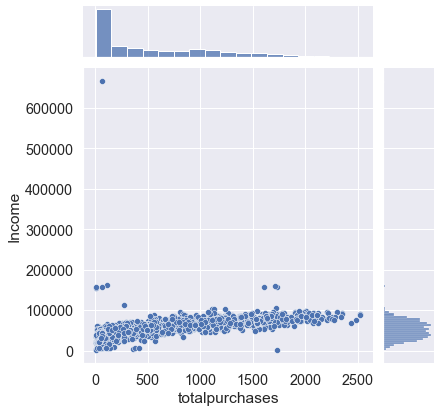

In [98]:
sns.jointplot(y='Income',x='totalpurchases',data=df)

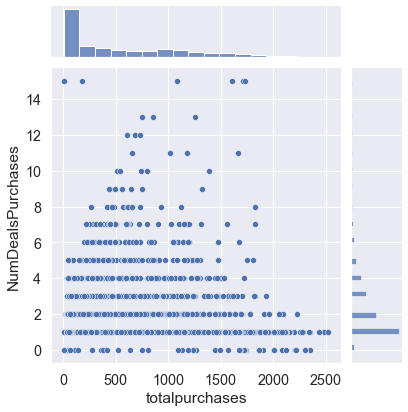

In [99]:
sns.jointplot(x='totalpurchases',y='NumDealsPurchases',data=df)

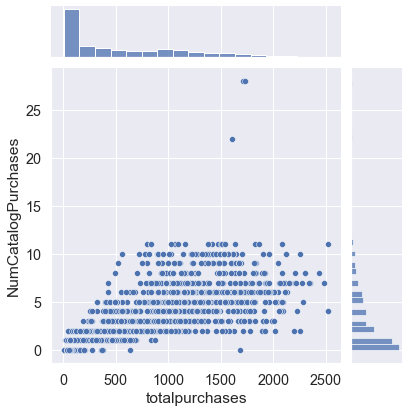

In [100]:
sns.jointplot(x='totalpurchases',y='NumCatalogPurchases',data=df)

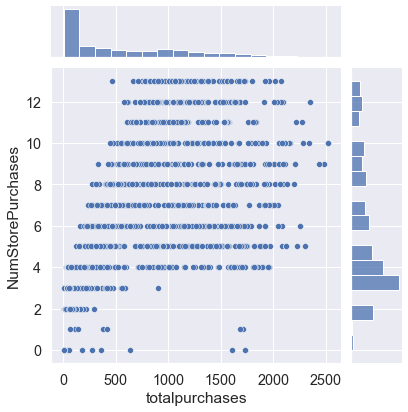

In [101]:
sns.jointplot(x='totalpurchases',y='NumStorePurchases',data=df)

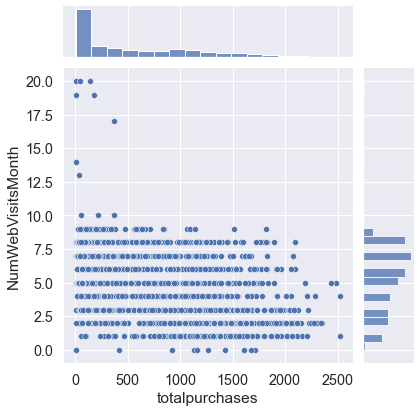

In [102]:
sns.jointplot(x='totalpurchases',y='NumWebVisitsMonth',data=df)

<AxesSubplot:xlabel='Marital_Status', ylabel='totalpurchases'>

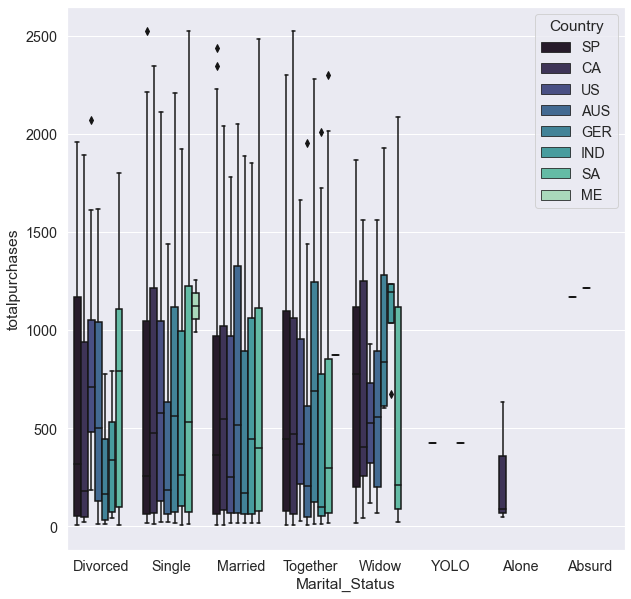

In [166]:
sns.boxplot(x='Marital_Status',y='totalpurchases',data=df,palette='mako',hue='Country')

<AxesSubplot:xlabel='Education', ylabel='totalpurchases'>

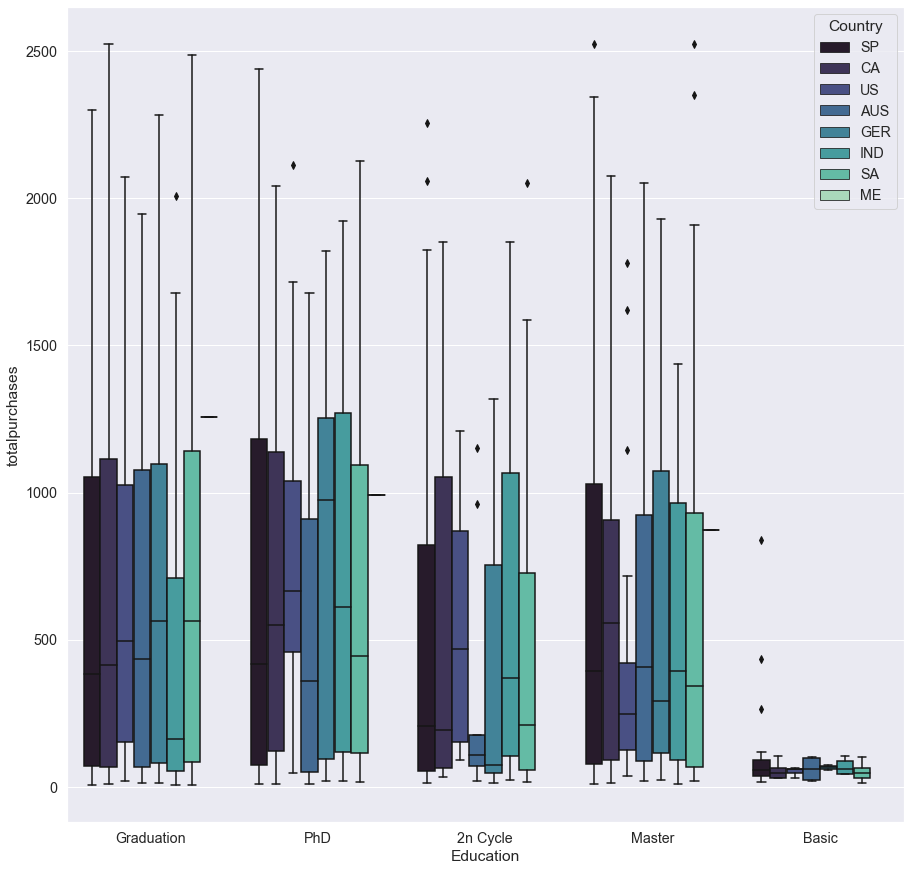

In [112]:
sns.boxplot(x='Education',y='totalpurchases',data=df,palette='mako',hue='Country')

<AxesSubplot:xlabel='Marital_Status', ylabel='totalpurchases'>

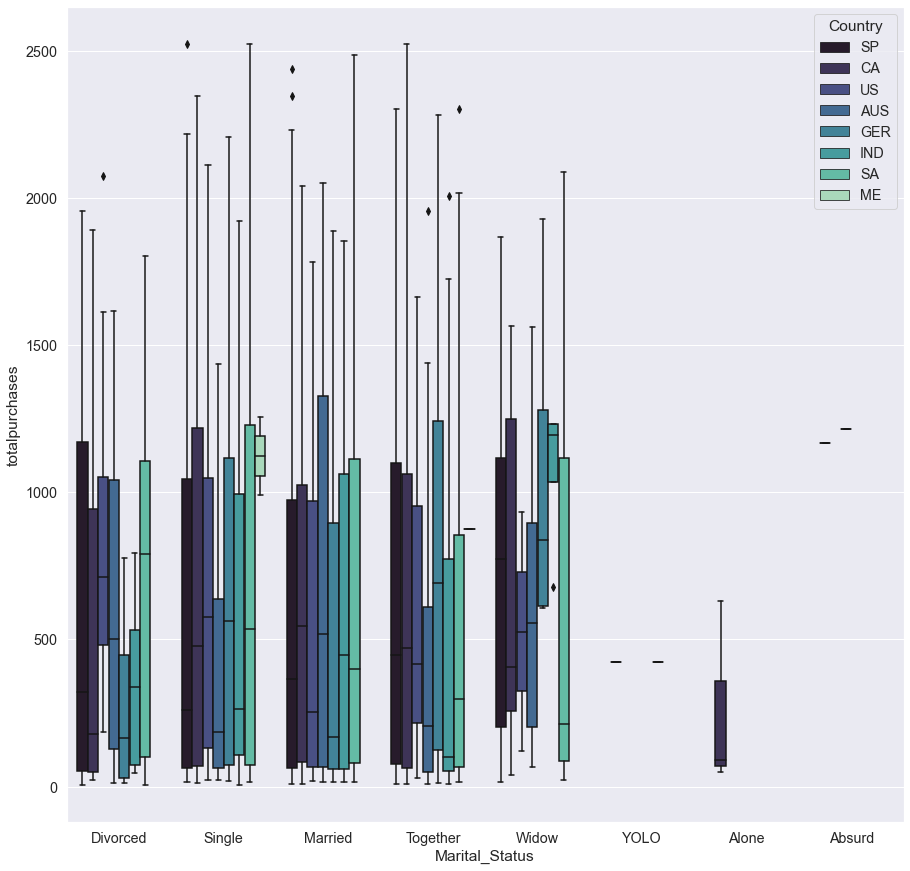

In [113]:
sns.boxplot(x='Marital_Status',y='totalpurchases',data=df,palette='mako',hue='Country')

<AxesSubplot:xlabel='Marital_Status', ylabel='NumWebVisitsMonth'>

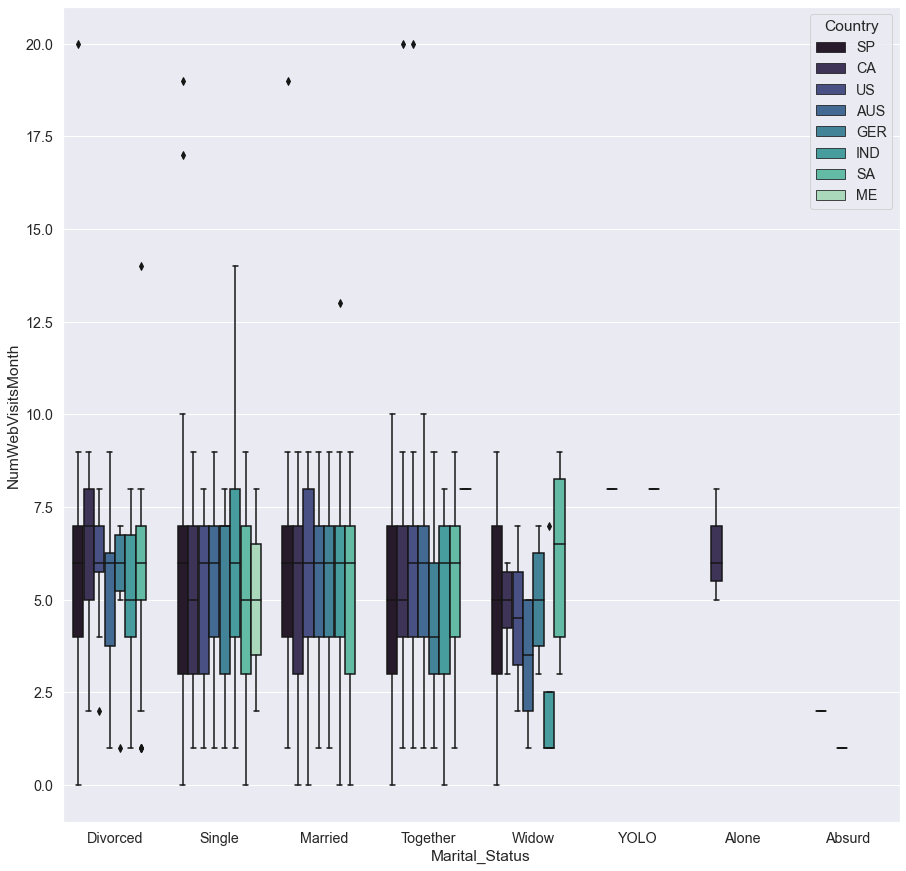

In [114]:
sns.boxplot(x='Marital_Status',y='NumWebVisitsMonth',data=df,palette='mako',hue='Country')

<AxesSubplot:xlabel='Marital_Status', ylabel='totalpurchases'>

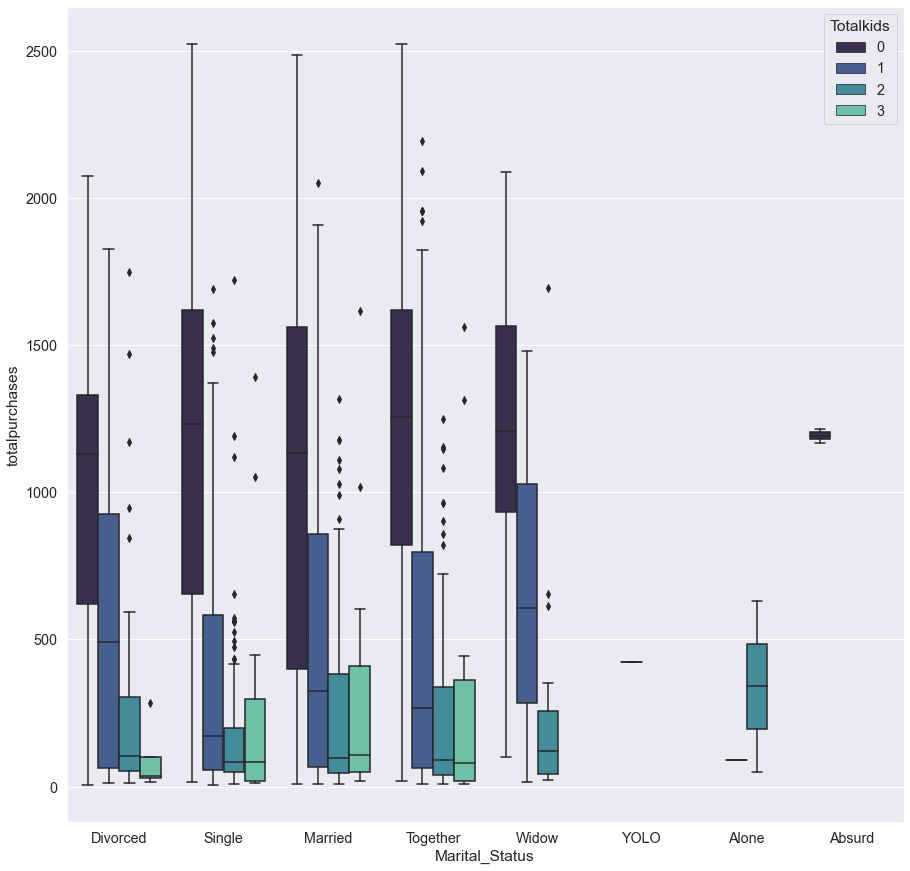

In [115]:
sns.boxplot(x='Marital_Status',y='totalpurchases',data=df,palette='mako',hue='Totalkids')

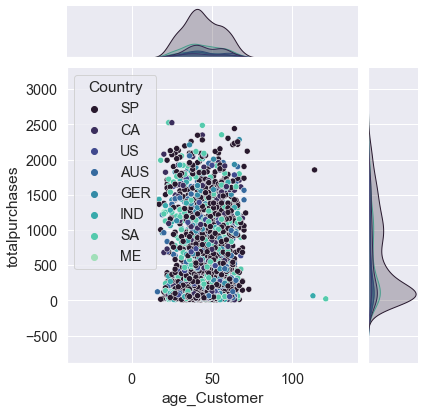

In [116]:
sns.jointplot(x='age_Customer',y='totalpurchases',data=df,palette='mako',hue='Country')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.3% of the points

<AxesSubplot:xlabel='totalpurchases', ylabel='age_Customer'>

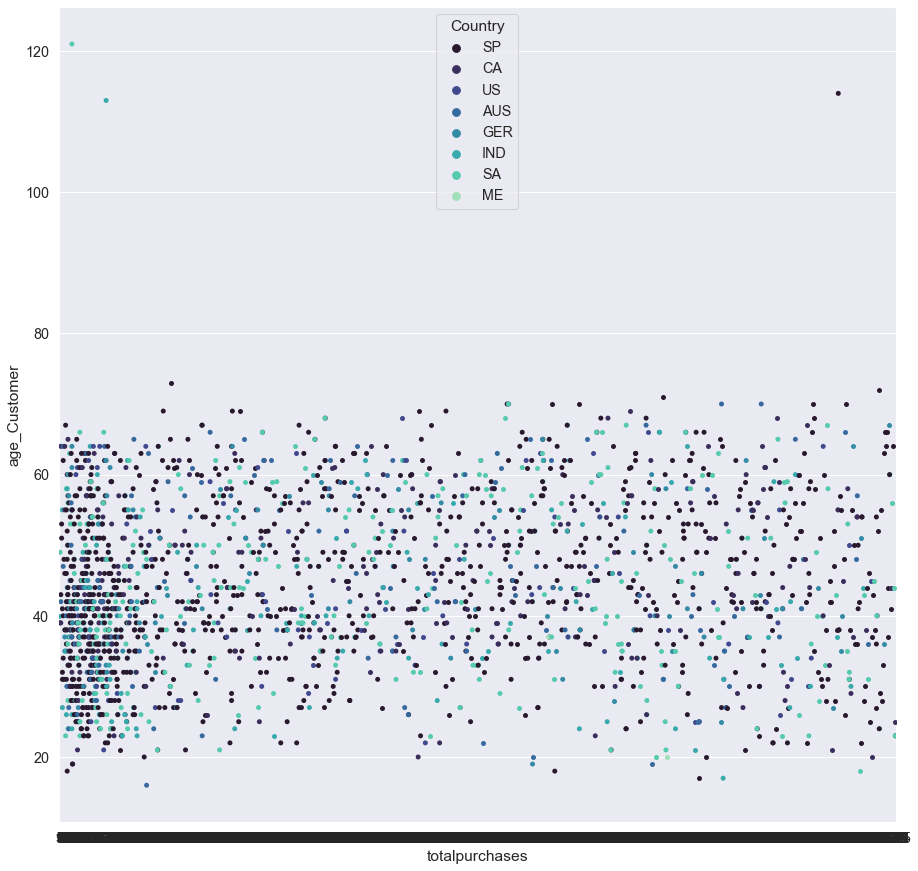

In [117]:
sns.swarmplot(y='age_Customer',x='totalpurchases',data=df,palette='mako',hue='Country')

<AxesSubplot:xlabel='Complain', ylabel='AcceptedCmp5'>

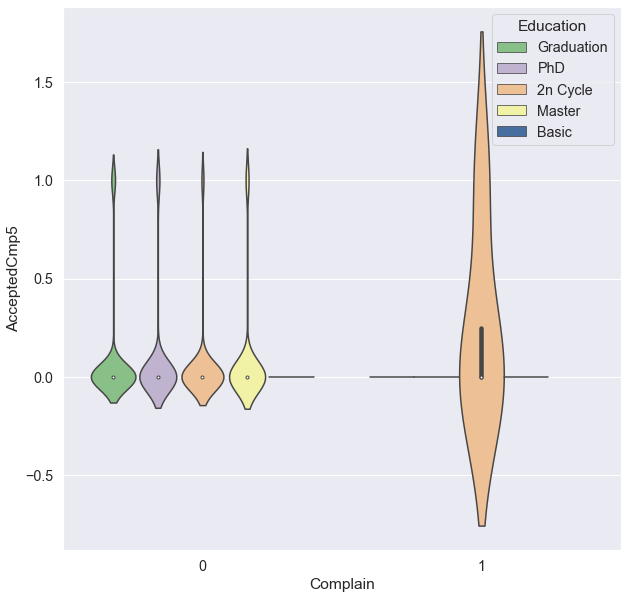

In [155]:
sns.violinplot(x='Complain',y='AcceptedCmp5',data=df,palette='viridis',hue='Education')

<AxesSubplot:xlabel='Country', ylabel='AcceptedCmp5'>

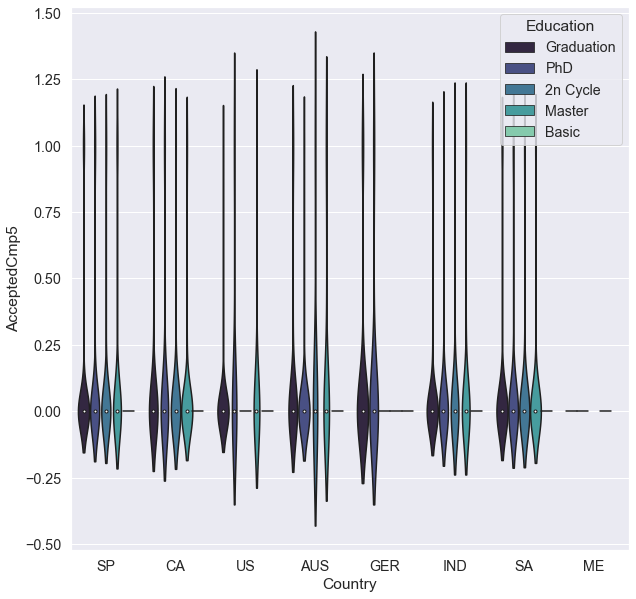

In [156]:
sns.violinplot(x='Country',y='AcceptedCmp5',data=df,palette='mako',hue='Education')

<AxesSubplot:xlabel='Country', ylabel='totalpurchases'>

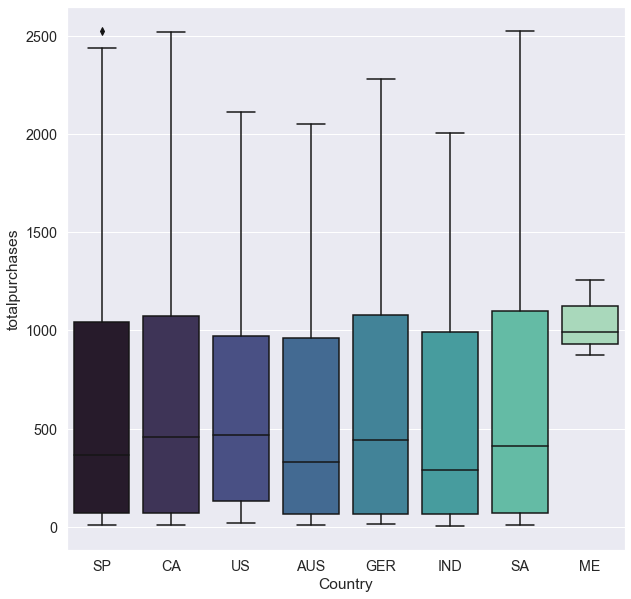

In [178]:
sns.boxplot(x='Country',y='totalpurchases',data=df,palette='mako')

### Is there a geo-regional significant relationship and campaign success?

In [273]:
df.groupby('Country').describe()[['AcceptedCmp5','AcceptedCmp2']].transpose()

Country                    AUS          CA         GER         IND   ME  \
AcceptedCmp5 count  160.000000  268.000000  120.000000  148.000000  3.0   
             mean     0.081250    0.078358    0.066667    0.040541  0.0   
             std      0.274076    0.269237    0.250490    0.197893  0.0   
             min      0.000000    0.000000    0.000000    0.000000  0.0   
             25%      0.000000    0.000000    0.000000    0.000000  0.0   
             50%      0.000000    0.000000    0.000000    0.000000  0.0   
             75%      0.000000    0.000000    0.000000    0.000000  0.0   
             max      1.000000    1.000000    1.000000    1.000000  0.0   
AcceptedCmp2 count  160.000000  268.000000  120.000000  148.000000  3.0   
             mean     0.000000    0.022388    0.016667    0.013514  0.0   
             std      0.000000    0.148219    0.128556    0.115852  0.0   
             min      0.000000    0.000000    0.000000    0.000000  0.0   
             25%      0.000000    0.000000    0.000000    0.000000  0.0   
             50%      0.000000    0.000000    0.000000    0.000000  0.0   
             75%      0.000000    0.000000    0.000000    0.000000  0.0   
             max      0.000000    1.000000    1.000000    1.000000  0.0   

Country                     SA           SP          US  
AcceptedCmp5 count  337.000000  1095.000000  109.000000  
             mean     0.062315     0.081279    0.045872  
             std      0.242085     0.273387    0.210173  
             min      0.000000     0.000000    0.000000  
             25%      0.000000     0.000000    0.000000  
             50%      0.000000     0.000000    0.000000  
             75%      0.000000     0.000000    0.000000  
             max      1.000000     1.000000    1.000000  
AcceptedCmp2 count  337.000000  1095.000000  109.000000  
             mean     0.011869     0.014612    0.000000  
             std      0.108459     0.120048    0.000000  
             min      0.000000     0.000000    0.000000  
             25%      0.000000     0.000000    0.000000  
             50%      0.000000     0.000000    0.000000  
             75%      0.000000     0.000000    0.000000  
             max      1.000000     1.000000    0.000000

<AxesSubplot:xlabel='Marital_Status', ylabel='AcceptedCmp2'>

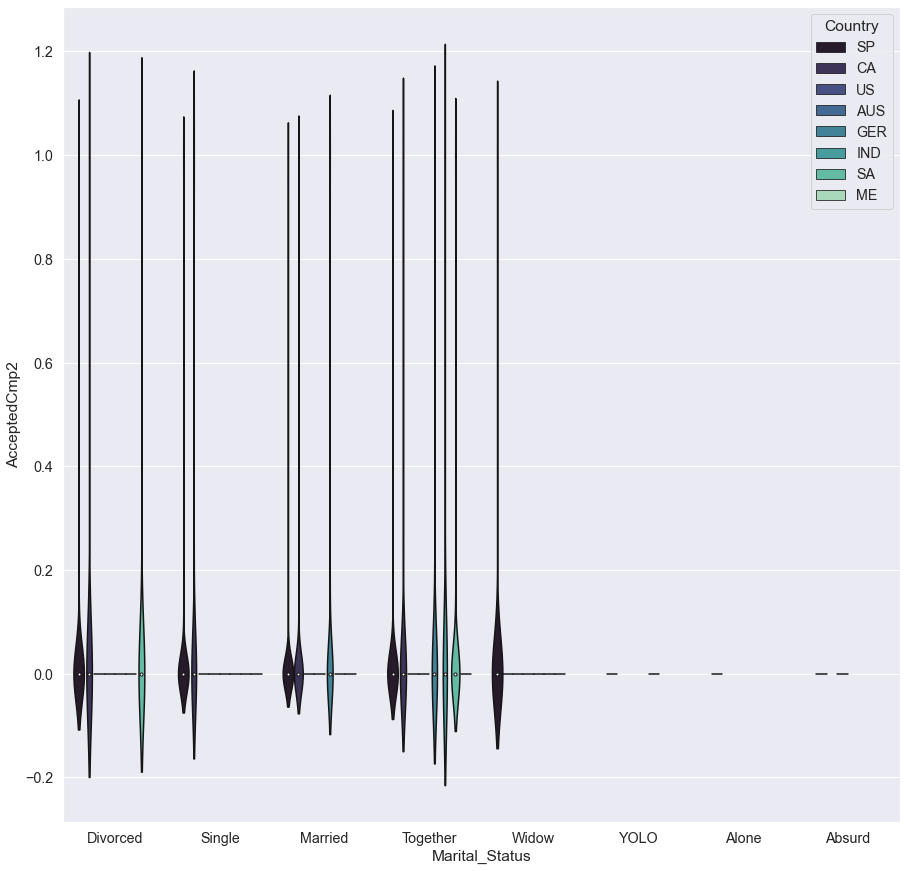

In [200]:
sns.violinplot(x='Marital_Status',y='AcceptedCmp2',data=df,palette='mako',hue='Country')

<AxesSubplot:xlabel='Education', ylabel='AcceptedCmp2'>

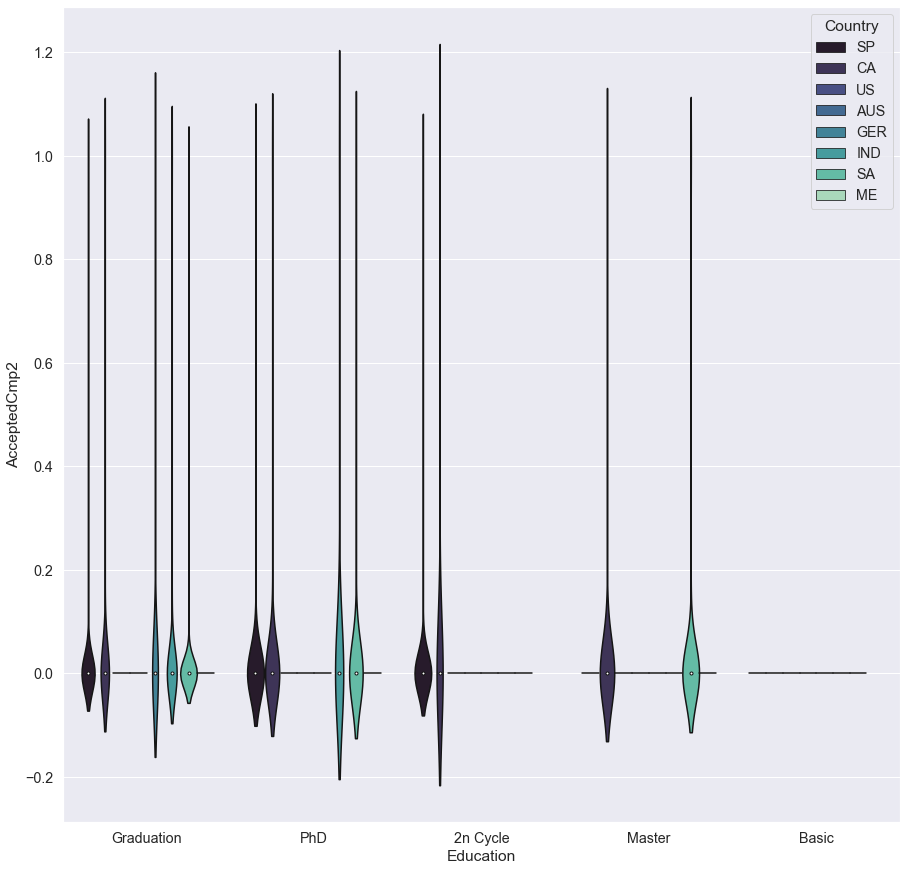

In [203]:
sns.violinplot(x='Education',y='AcceptedCmp2',data=df,palette='mako',hue='Country')

<AxesSubplot:xlabel='Country', ylabel='AcceptedCmp2'>

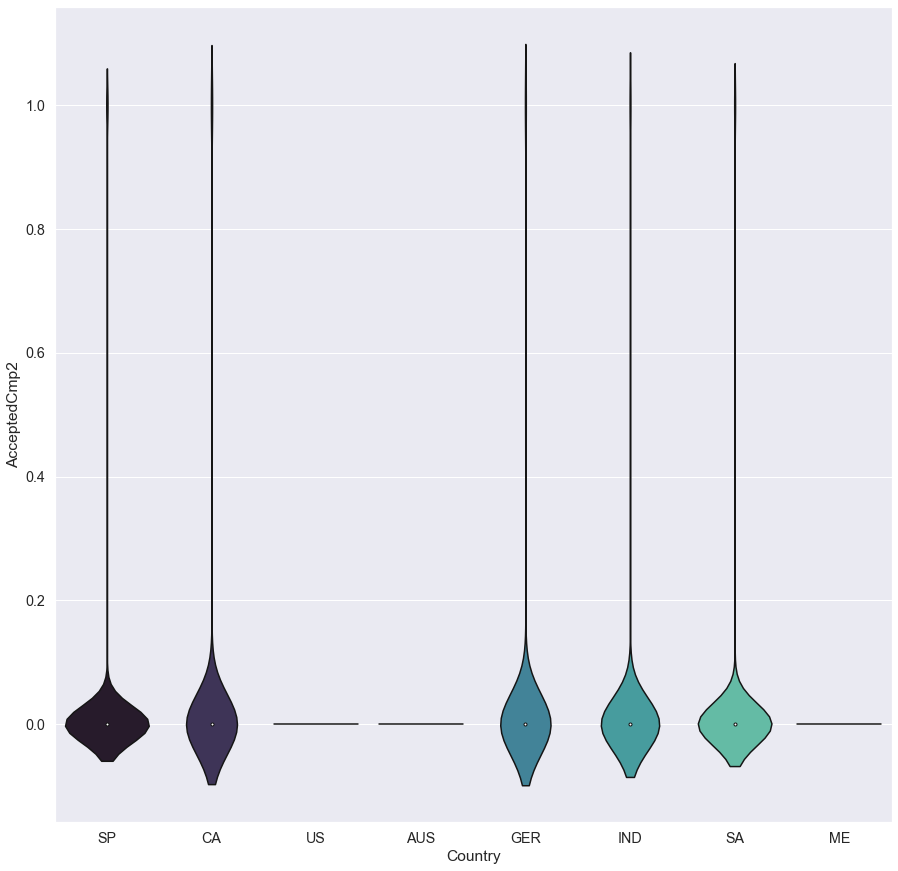

In [205]:
sns.violinplot(x='Country',y='AcceptedCmp2',data=df,palette='mako')

<AxesSubplot:xlabel='Marital_Status', ylabel='AcceptedCmp5'>

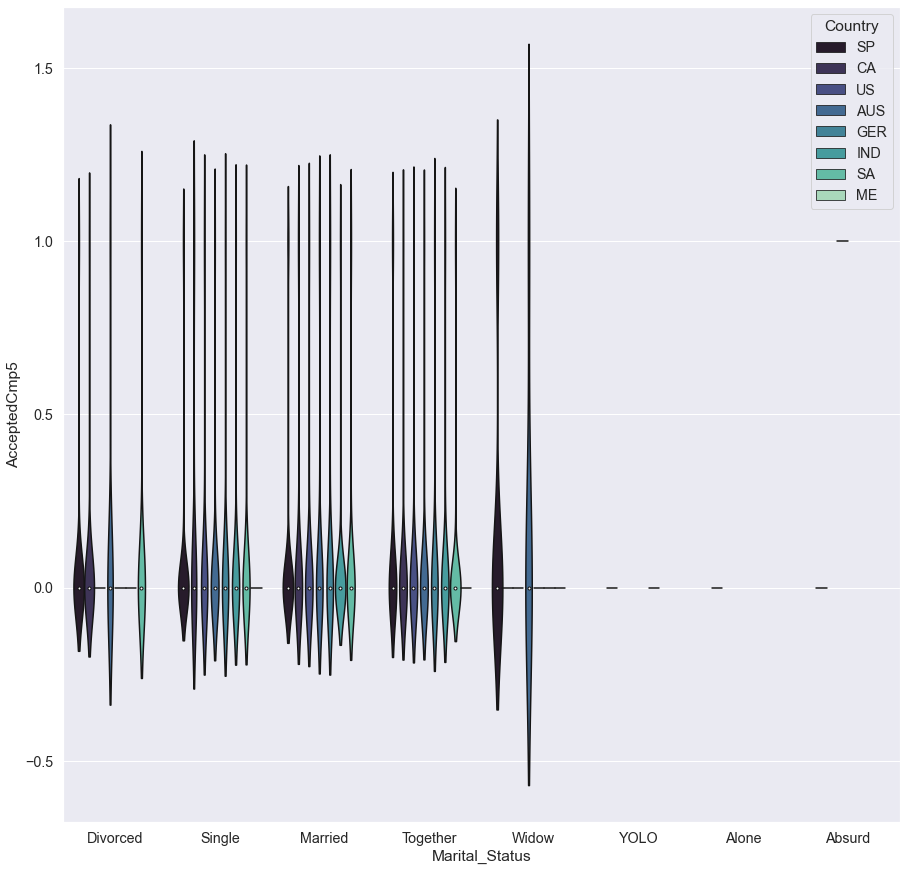

In [184]:
sns.violinplot(x='Marital_Status',y='AcceptedCmp5',data=df,palette='mako',hue='Country')

<AxesSubplot:xlabel='Complain', ylabel='AcceptedCmp2'>

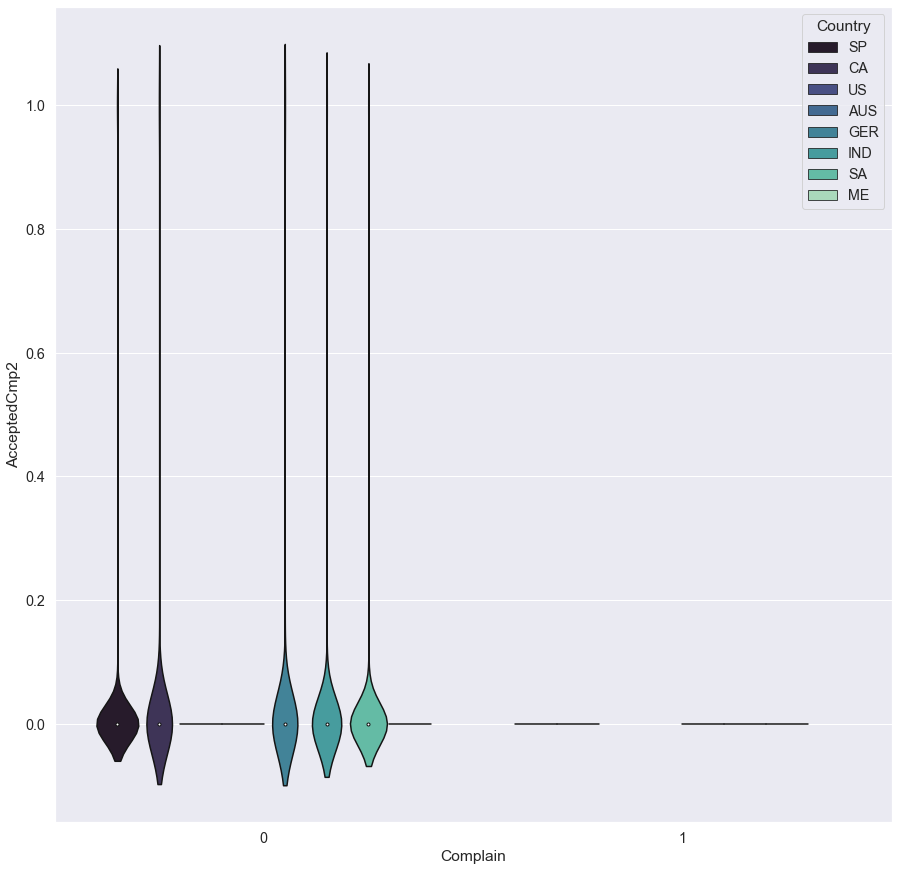

In [206]:
sns.violinplot(x='Complain',y='AcceptedCmp2',data=df,palette='mako',hue='Country')

<AxesSubplot:xlabel='Country', ylabel='AcceptedCmp5'>

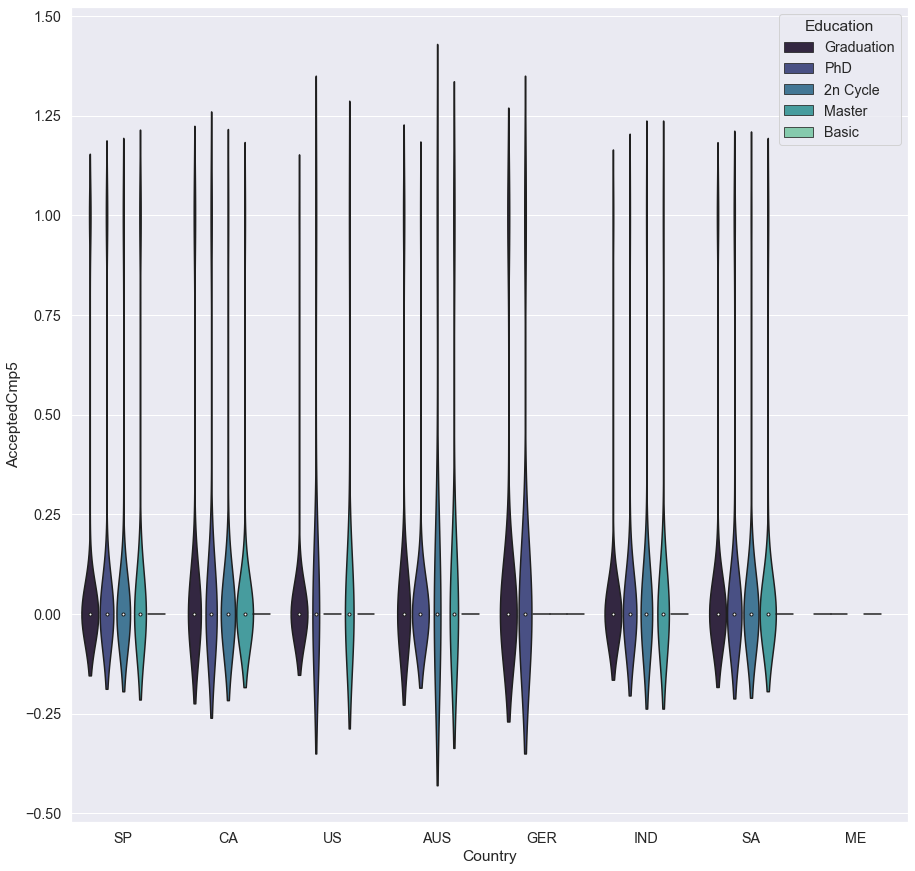

In [276]:
sns.violinplot(x='Country',y='AcceptedCmp5',data=df,palette='mako',hue='Education')

<AxesSubplot:xlabel='Complain', ylabel='AcceptedCmp5'>

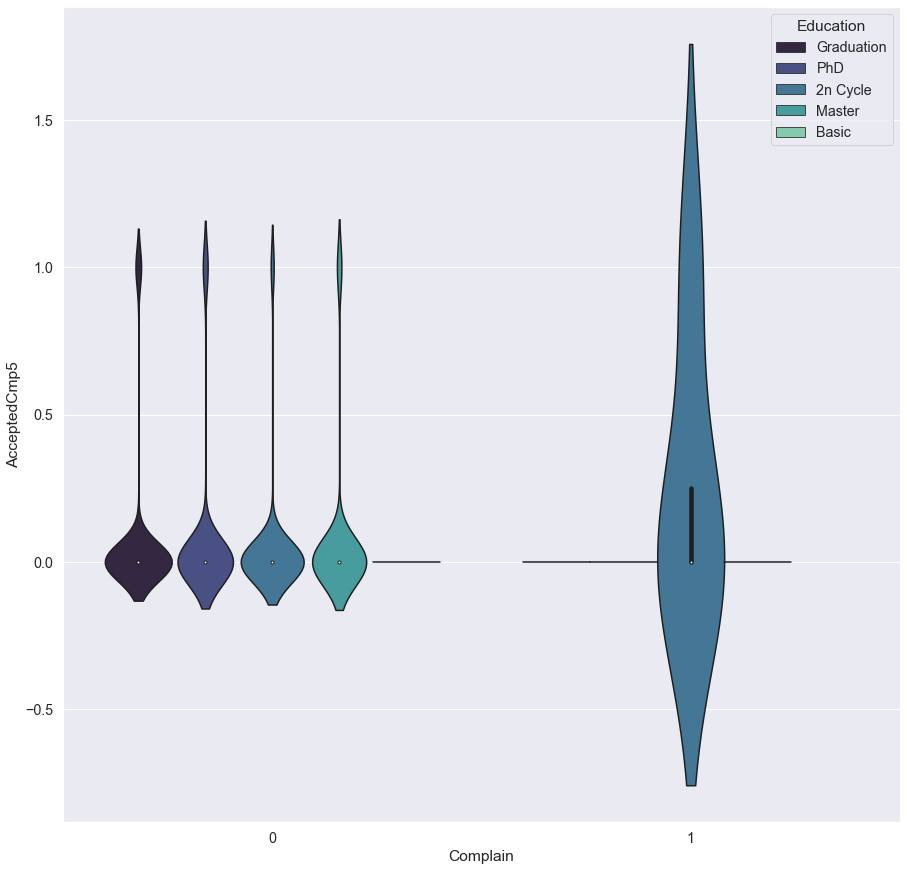

In [275]:
sns.violinplot(x='Complain',y='AcceptedCmp5',data=df,palette='mako',hue='Education')

<AxesSubplot:xlabel='Kidhome', ylabel='NumWebVisitsMonth'>

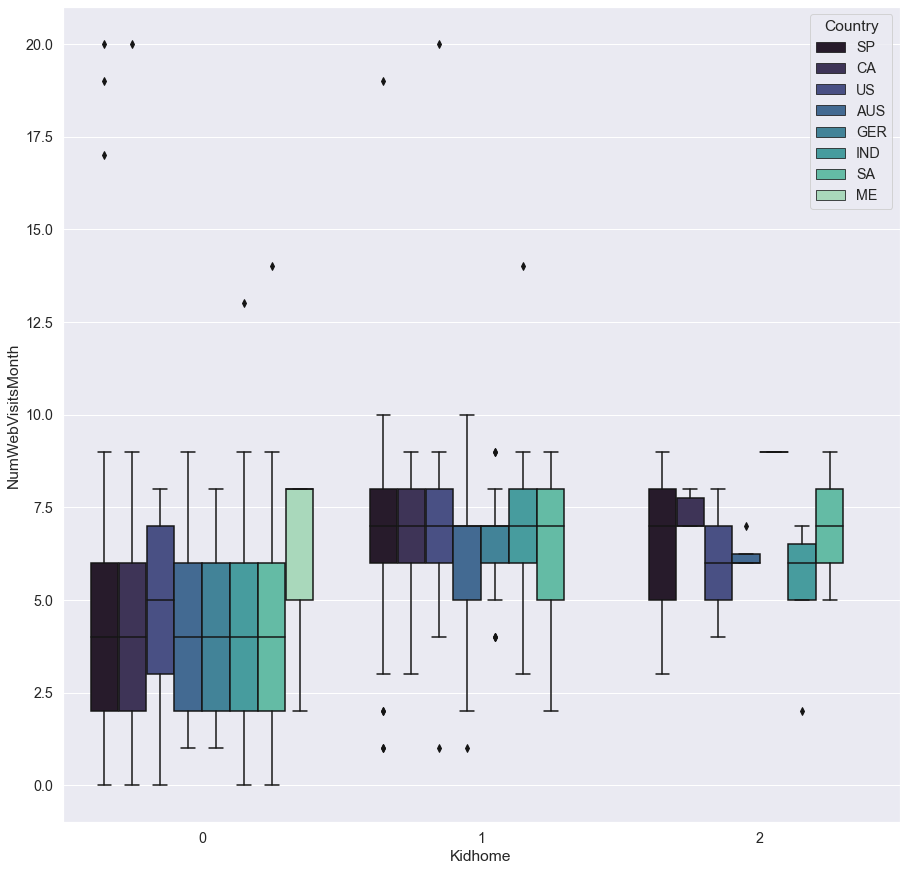

In [119]:
sns.boxplot(x='Kidhome',y='NumWebVisitsMonth',data=df,palette='mako',hue='Country')

<AxesSubplot:xlabel='Complain', ylabel='AcceptedCmp3'>

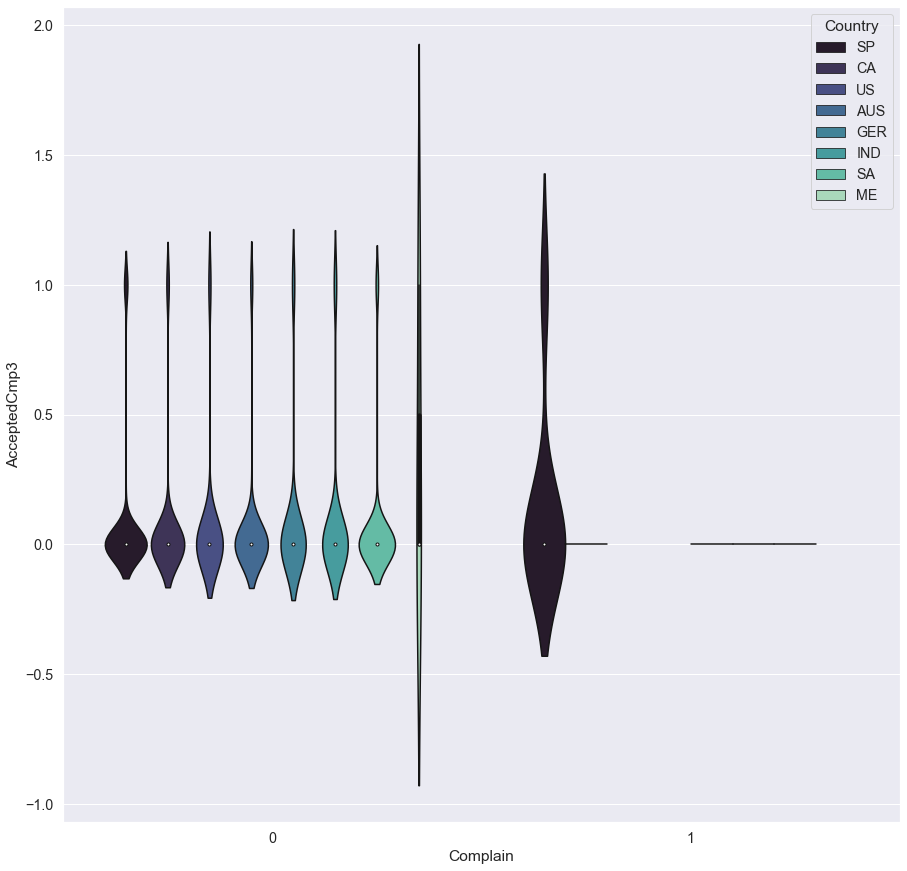

In [208]:
sns.violinplot(x='Complain',y='AcceptedCmp3',data=df,palette='mako',hue='Country')

<AxesSubplot:xlabel='Education', ylabel='NumWebVisitsMonth'>

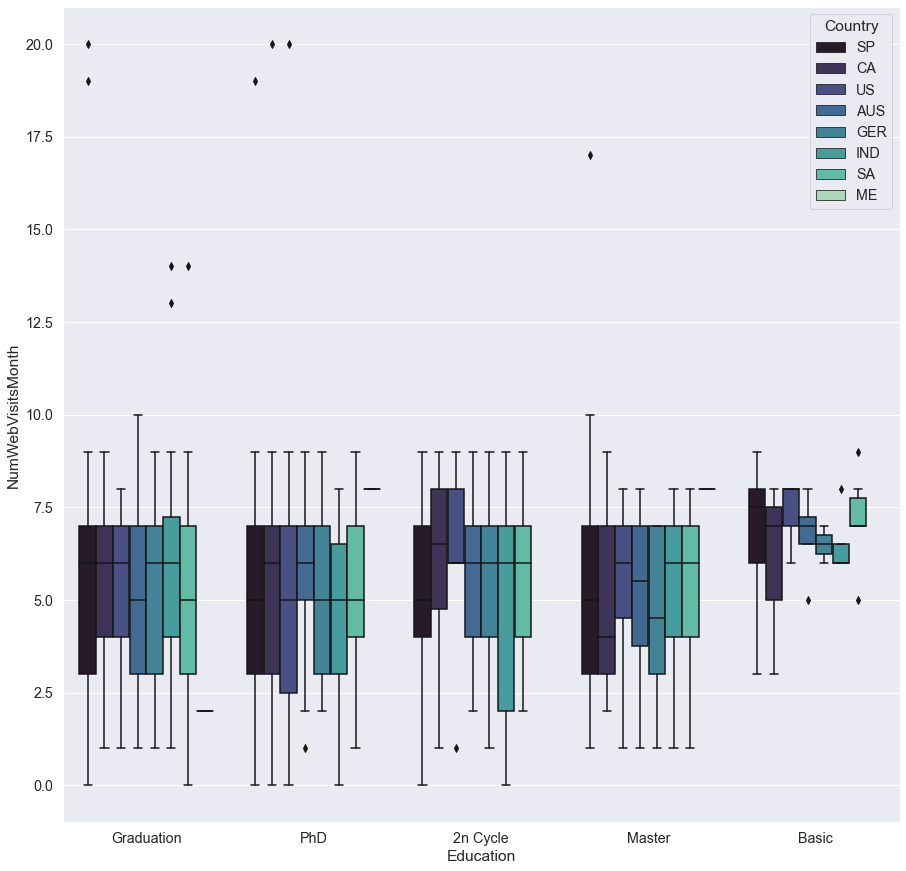

In [120]:
sns.boxplot(x='Education',y='NumWebVisitsMonth',data=df,palette='mako',hue='Country')

<AxesSubplot:xlabel='Complain', ylabel='AcceptedCmp5'>

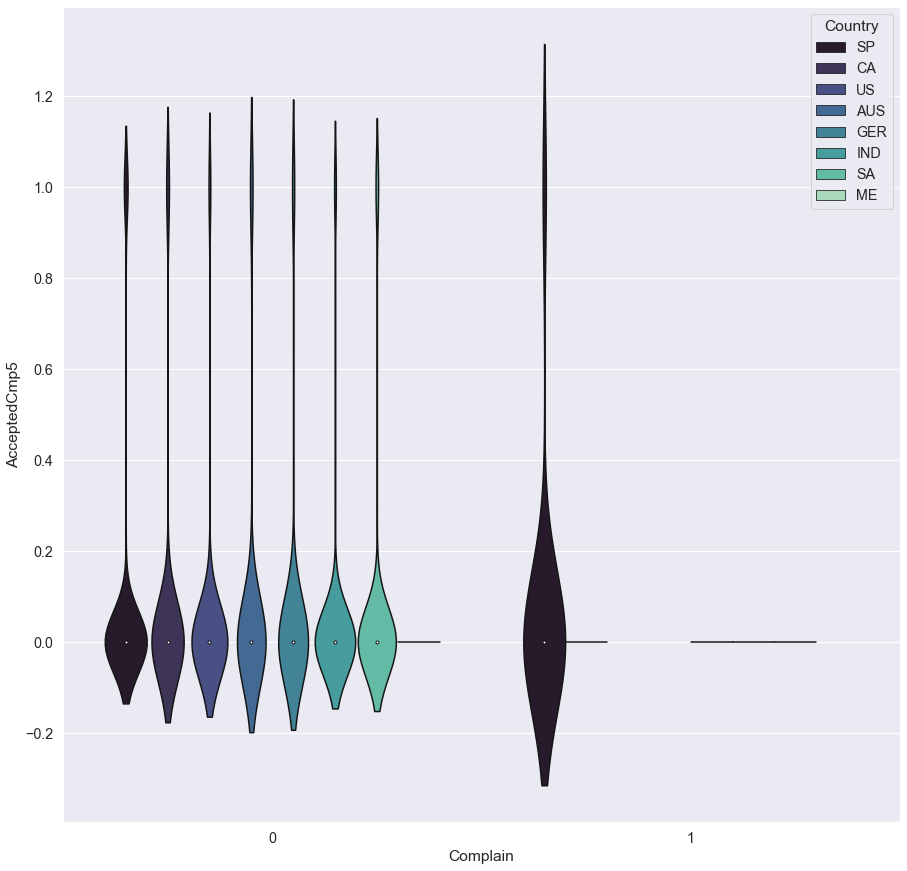

In [179]:
sns.violinplot(y='AcceptedCmp5',x='Complain',data=df,palette='mako',hue='Country')

<AxesSubplot:xlabel='Complain', ylabel='AcceptedCmp4'>

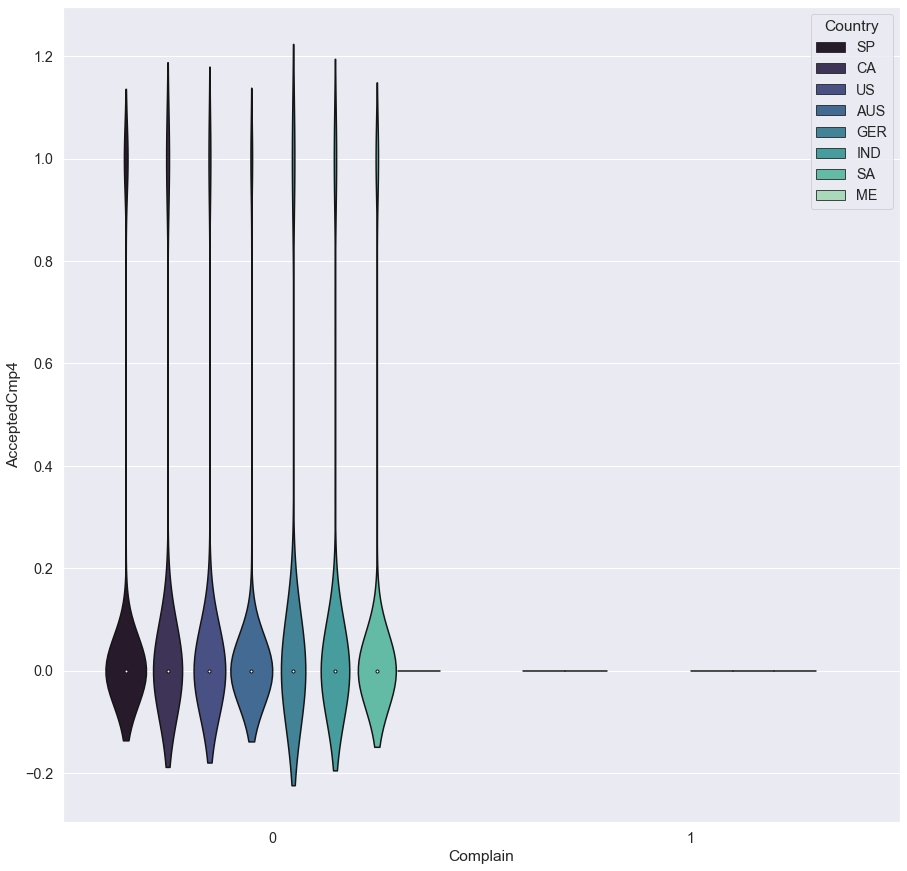

In [209]:
sns.violinplot(x='Complain',y='AcceptedCmp4',data=df,palette='mako',hue='Country')

<AxesSubplot:xlabel='Teenhome', ylabel='NumWebVisitsMonth'>

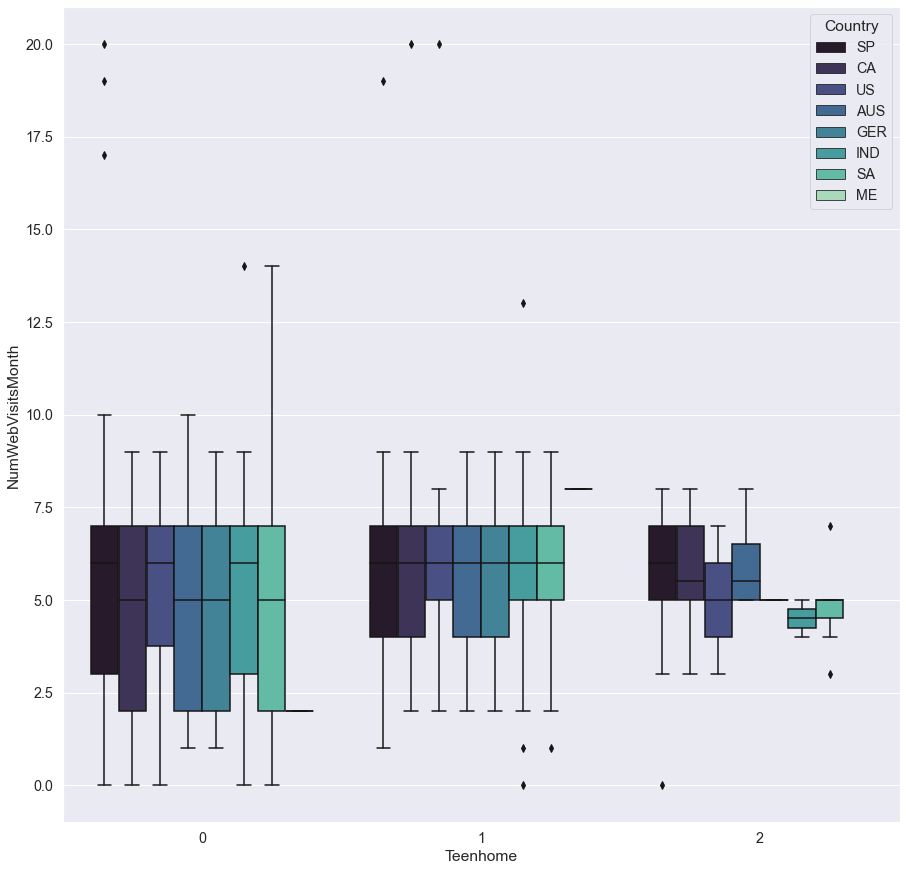

In [118]:
sns.boxplot(x='Teenhome',y='NumWebVisitsMonth',data=df,palette='mako',hue='Country')

<AxesSubplot:xlabel='Education', ylabel='AcceptedCmp5'>

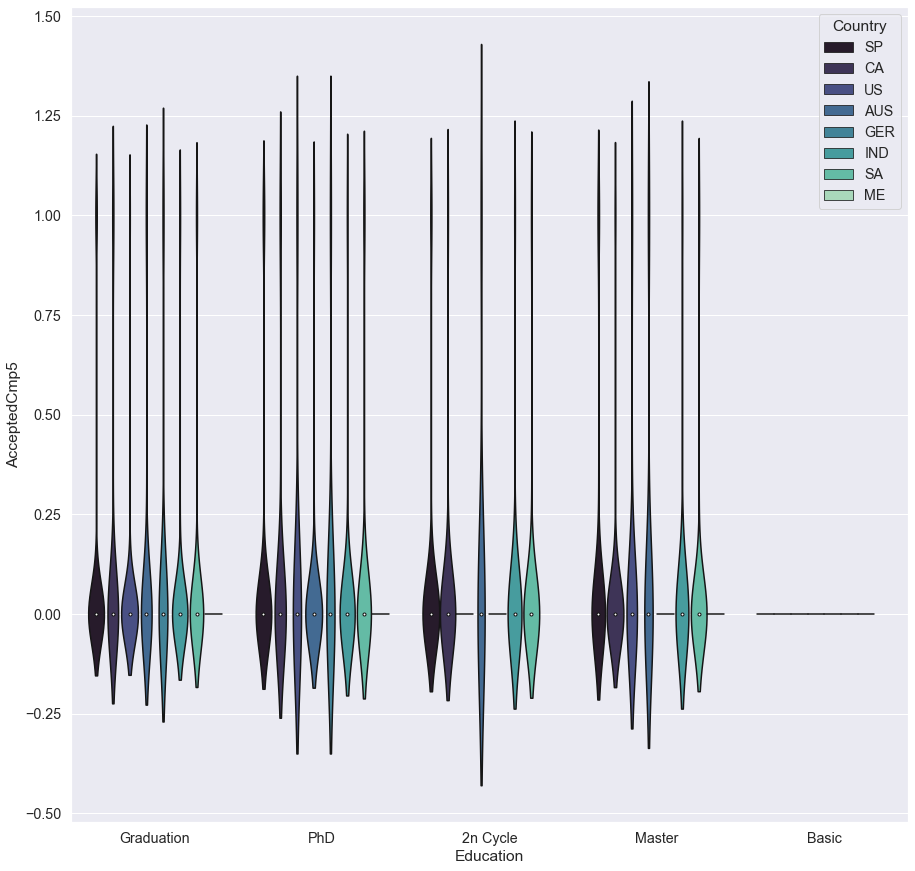

In [197]:
sns.violinplot(x='Education',y='AcceptedCmp5',data=df,palette='mako',hue='Country')

#### Yes, the success of the campaign is affected by geography

<AxesSubplot:>

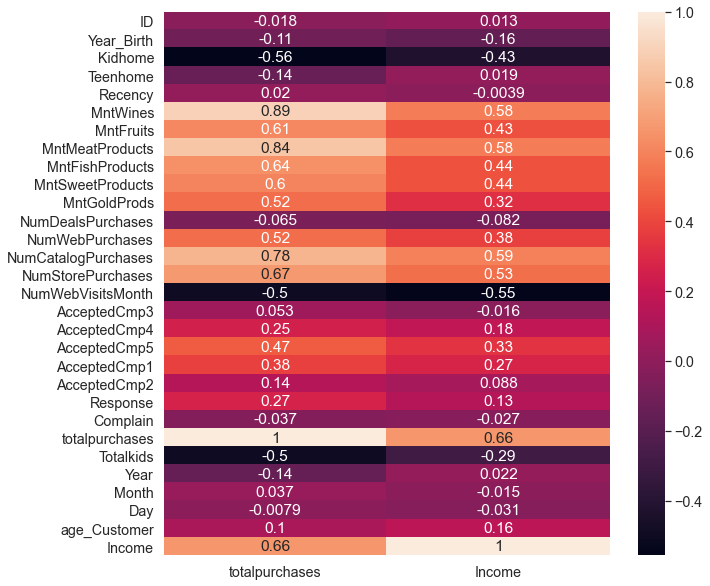

In [28]:
sns.heatmap(df.corr()[['totalpurchases','Income']],annot=True)

#### Customers who are old and love alcohol, and those who are married feel the distance of distress due to complaints and Montenegro was surprising

In [26]:
df.drop(['ID', 'Year_Birth','Totalkids', 'Year', 'Month', 'Day', 'age_Customer','Recency','Dt_Customer'], axis=1, inplace=True)


#### Handle Outliers 

In [27]:
from datasist.structdata import detect_outliers

In [28]:
out_idx = detect_outliers(df, 0, numerical)
df.drop(out_idx, axis=0, inplace=True)
df


Education Marital_Status  Kidhome  Teenhome  MntWines  MntFruits  \
1     Graduation         Single      0.0       0.0     464.0        5.0   
2     Graduation        Married      0.0       1.0     134.0       11.0   
3     Graduation       Together      1.0       1.0      10.0        0.0   
4     Graduation         Single      1.0       0.0       6.0       16.0   
6       2n Cycle        Married      0.0       0.0     769.0       80.0   
...          ...            ...      ...       ...       ...        ...   
2233    2n Cycle       Divorced      1.0       0.0      15.0        6.0   
2234  Graduation       Divorced      0.0       1.0     321.0       11.0   
2235         PhD       Divorced      0.0       1.0     372.0       18.0   
2236    2n Cycle        Married      1.0       0.0       5.0       10.0   
2237  Graduation       Divorced      1.0       0.0     185.0        2.0   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
1                64.0              7.0               0.0          37.0  ...   
2                59.0             15.0               2.0          30.0  ...   
3                 1.0              0.0               0.0           0.0  ...   
4                24.0             11.0               0.0          34.0  ...   
6               252.0             15.0              34.0          65.0  ...   
...               ...              ...               ...           ...  ...   
2233              8.0              7.0               4.0          25.0  ...   
2234            309.0             33.0              26.0          34.0  ...   
2235            126.0             47.0              48.0          78.0  ...   
2236             13.0              3.0               8.0          16.0  ...   
2237             88.0             15.0               5.0          14.0  ...   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
1                0             0             0             0             1   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                1             0             0             0             0   
6                1             0             0             0             0   
...            ...           ...           ...           ...           ...   
2233             0             0             0             0             0   
2234             0             0             0             0             0   
2235             0             0             0             0             0   
2236             0             0             0             0             0   
2237             0             0             0             0             0   

      Response  Complain  Country  totalpurchases   Income  
1            1         0       CA             577  57091.0  
2            0         0       US             251  67267.0  
3            0         0      AUS              11  32474.0  
4            1         0       SP              91  21474.0  
6            1         0      GER            1215  63564.0  
...        ...       ...      ...             ...      ...  
2233         0         1      IND              65  36640.0  
2234         0         0       US             734  78901.0  
2235         0         0       US             689  66476.0  
2236         0         0       SP              55  31056.0  
2237         0         0       SP             309  46310.0  

[1536 rows x 25 columns]

In [29]:
df.columns  


Index(['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'totalpurchases',
       'Income'],
      dtype='object')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1536 entries, 1 to 2237
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            1536 non-null   object 
 1   Marital_Status       1536 non-null   object 
 2   Kidhome              1536 non-null   float64
 3   Teenhome             1536 non-null   float64
 4   MntWines             1536 non-null   float64
 5   MntFruits            1536 non-null   float64
 6   MntMeatProducts      1536 non-null   float64
 7   MntFishProducts      1536 non-null   float64
 8   MntSweetProducts     1536 non-null   float64
 9   MntGoldProds         1536 non-null   float64
 10  NumDealsPurchases    1536 non-null   float64
 11  NumWebPurchases      1536 non-null   float64
 12  NumCatalogPurchases  1536 non-null   float64
 13  NumStorePurchases    1536 non-null   float64
 14  NumWebVisitsMonth    1536 non-null   float64
 15  AcceptedCmp3         1536 non-null   i

In [31]:
df.columns

Index(['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'totalpurchases',
       'Income'],
      dtype='object')

In [32]:
numerical=['Income','Kidhome','Teenhome','MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
'AcceptedCmp2', 'Response', 'Complain']
categoriacal=['Education','Marital_Status','Country']

In [33]:
df.isna().sum()/len(df)*100

Education              0.0
Marital_Status         0.0
Kidhome                0.0
Teenhome               0.0
MntWines               0.0
MntFruits              0.0
MntMeatProducts        0.0
MntFishProducts        0.0
MntSweetProducts       0.0
MntGoldProds           0.0
NumDealsPurchases      0.0
NumWebPurchases        0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
NumWebVisitsMonth      0.0
AcceptedCmp3           0.0
AcceptedCmp4           0.0
AcceptedCmp5           0.0
AcceptedCmp1           0.0
AcceptedCmp2           0.0
Response               0.0
Complain               0.0
Country                0.0
totalpurchases         0.0
Income                 0.0
dtype: float64

In [34]:
df = pd.get_dummies(df, columns=['Education','Marital_Status','Country'], drop_first=True)

In [35]:
df.sample(2)

Kidhome  Teenhome  MntWines  MntFruits  MntMeatProducts  \
389       0.0       1.0     666.0       35.0            124.0   
2210      0.0       1.0     538.0       13.0             91.0   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
389              69.0               8.0          26.0                1.0   
2210             17.0               6.0          26.0                6.0   

      NumWebPurchases  ...  Marital_Status_Together  Marital_Status_Widow  \
389               5.0  ...                        0                     0   
2210              6.0  ...                        0                     0   

      Marital_Status_YOLO  Country_CA  Country_GER  Country_IND  Country_ME  \
389                     0           0            0            0           0   
2210                    0           0            0            0           0   

      Country_SA  Country_SP  Country_US  
389            0           1           0  
2210           0           1           0  

[2 rows x 39 columns]

In [36]:
from sklearn.cluster import KMeans

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df)

Text(0, 0.5, 'Score')

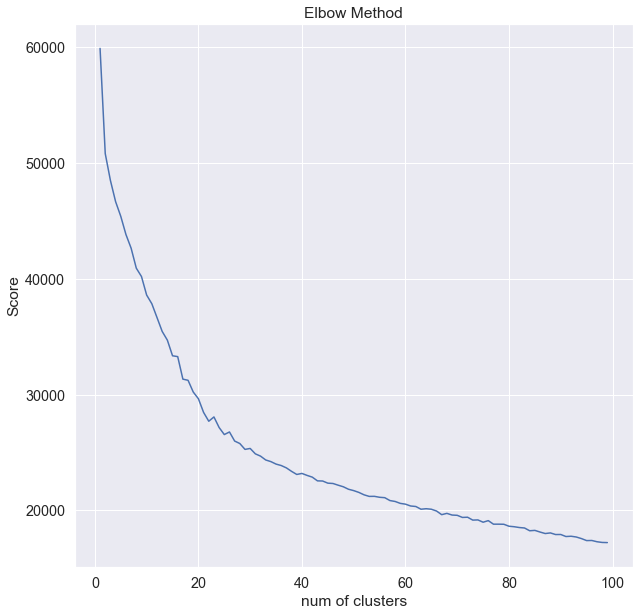

In [38]:
scores = []
for i in range(1, 100):
    model = KMeans(n_clusters=i)
    model.fit(df_scaled)
    scores.append(model.inertia_)
plt.plot(range(1, 100), scores)
plt.title("Elbow Method")
plt.xlabel("num of clusters")
plt.ylabel("Score")

In [39]:
model = KMeans(n_clusters=25)
clusters = model.fit_predict(df)
clusters

array([24,  2, 16, ...,  2, 20, 21])

In [40]:
centroids = model.cluster_centers_
centroids

array([[ 6.19718310e-01,  7.60563380e-01,  1.42253521e+02,
         4.42253521e+00,  4.71408451e+01,  8.36619718e+00,
         4.64788732e+00,  2.41549296e+01,  2.74647887e+00,
         3.57746479e+00,  9.71830986e-01,  4.40845070e+00,
         6.35211268e+00,  2.81690141e-02,  7.04225352e-02,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         7.04225352e-02,  1.73472348e-18,  2.30985915e+02,
         4.42268169e+04,  0.00000000e+00,  5.35211268e-01,
         2.95774648e-01,  1.40845070e-01,  1.12676056e-01,
         4.22535211e-01,  1.40845070e-01,  2.81690141e-01,
         4.22535211e-02,  2.16840434e-19,  5.63380282e-02,
         5.63380282e-02,  8.45070423e-02,  2.16840434e-19,
         1.97183099e-01,  4.78873239e-01,  2.81690141e-02],
       [ 8.52941176e-01,  2.64705882e-01,  1.38970588e+01,
         5.36764706e+00,  1.65588235e+01,  7.42647059e+00,
         6.26470588e+00,  1.35735294e+01,  1.80882353e+00,
         1.57352941e+00,  3.82352941e-01,  2.95588235e+

In [41]:
df

Kidhome  Teenhome  MntWines  MntFruits  MntMeatProducts  \
1         0.0       0.0     464.0        5.0             64.0   
2         0.0       1.0     134.0       11.0             59.0   
3         1.0       1.0      10.0        0.0              1.0   
4         1.0       0.0       6.0       16.0             24.0   
6         0.0       0.0     769.0       80.0            252.0   
...       ...       ...       ...        ...              ...   
2233      1.0       0.0      15.0        6.0              8.0   
2234      0.0       1.0     321.0       11.0            309.0   
2235      0.0       1.0     372.0       18.0            126.0   
2236      1.0       0.0       5.0       10.0             13.0   
2237      1.0       0.0     185.0        2.0             88.0   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
1                 7.0               0.0          37.0                1.0   
2                15.0               2.0          30.0                1.0   
3                 0.0               0.0           0.0                1.0   
4                11.0               0.0          34.0                2.0   
6                15.0              34.0          65.0                1.0   
...               ...               ...           ...                ...   
2233              7.0               4.0          25.0                1.0   
2234             33.0              26.0          34.0                3.0   
2235             47.0              48.0          78.0                2.0   
2236              3.0               8.0          16.0                1.0   
2237             15.0               5.0          14.0                2.0   

      NumWebPurchases  ...  Marital_Status_Together  Marital_Status_Widow  \
1                 7.0  ...                        0                     0   
2                 3.0  ...                        0                     0   
3                 1.0  ...                        1                     0   
4                 3.0  ...                        0                     0   
6                10.0  ...                        0                     0   
...               ...  ...                      ...                   ...   
2233              2.0  ...                        0                     0   
2234              9.0  ...                        0                     0   
2235              5.0  ...                        0                     0   
2236              1.0  ...                        0                     0   
2237              6.0  ...                        0                     0   

      Marital_Status_YOLO  Country_CA  Country_GER  Country_IND  Country_ME  \
1                       0           1            0            0           0   
2                       0           0            0            0           0   
3                       0           0            0            0           0   
4                       0           0            0            0           0   
6                       0           0            1            0           0   
...                   ...         ...          ...          ...         ...   
2233                    0           0            0            1           0   
2234                    0           0            0            0           0   
2235                    0           0            0            0           0   
2236                    0           0            0            0           0   
2237                    0           0            0            0           0   

      Country_SA  Country_SP  Country_US  
1              0           0           0  
2              0           0           1  
3              0           0           0  
4              0           1           0  
6              0           0           0  
...          ...         ...         ...  
2233           0           0           0  
2234           0           0           1  
2235           0           0           1  
2236    

In [42]:
import joblib

In [43]:
joblib.dump(model, 'kmeans_model.h5')
joblib.dump(scaler, 'kmeans_scaler.h5')

['kmeans_scaler.h5']

In [44]:
df.columns

Index(['Kidhome', 'Teenhome', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Complain', 'totalpurchases', 'Income', 'Education_Basic',
       'Education_Graduation', 'Education_Master', 'Education_PhD',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'Marital_Status_YOLO', 'Country_CA',
       'Country_GER', 'Country_IND', 'Country_ME', 'Country_SA', 'Country_SP',
       'Country_US'],
      dtype='object')

### noting

#### The data was excellent and contains many elements that benefit the data analyst One of the observations is that the presence of 
##### 1-Customers who had children affected negatively
##### 2- Choosing all social statuses was wrong 
##### 3- Defining all levels of education in all countries the same is wrong 
##### 4- The age level was very large and was not appropriate

In [45]:
df['clusters']= clusters

In [46]:
df.corr()

Kidhome  Teenhome  MntWines  MntFruits  \
Kidhome                  1.000000 -0.202173 -0.493779  -0.314459   
Teenhome                -0.202173  1.000000  0.185646  -0.035363   
MntWines                -0.493779  0.185646  1.000000   0.405358   
MntFruits               -0.314459 -0.035363  0.405358   1.000000   
MntMeatProducts         -0.404578 -0.019897  0.667151   0.575480   
MntFishProducts         -0.318070 -0.080066  0.420755   0.589965   
MntSweetProducts        -0.338068 -0.025090  0.399428   0.590966   
MntGoldProds            -0.324583  0.051770  0.405076   0.384730   
NumDealsPurchases        0.081053  0.348552  0.182913   0.060772   
NumWebPurchases         -0.402154  0.208299  0.682899   0.396143   
NumCatalogPurchases     -0.479610  0.097565  0.745504   0.496485   
NumStorePurchases       -0.515572  0.209816  0.765907   0.510650   
NumWebVisitsMonth        0.372356 -0.099873 -0.258906  -0.308759   
AcceptedCmp3             0.032510 -0.052749  0.027254   0.002464   
AcceptedCmp4            -0.203681  0.082725  0.424885   0.049304   
AcceptedCmp5            -0.138911 -0.127410  0.368308   0.128238   
AcceptedCmp1            -0.115172 -0.024592  0.308362   0.045084   
AcceptedCmp2            -0.070863 -0.003418  0.195618  -0.007282   
Response                 0.004782 -0.101403  0.105906   0.079384   
Complain                 0.021986 -0.011049 -0.028900   0.002730   
totalpurchases          -0.516557  0.119691  0.954574   0.559079   
Income                  -0.449654  0.340160  0.719712   0.438998   
Education_Basic          0.028529 -0.159096 -0.130745  -0.019560   
Education_Graduation     0.068644 -0.027379 -0.098720   0.008774   
Education_Master        -0.028447  0.032464  0.035933  -0.009984   
Education_PhD           -0.091533  0.122332  0.218229  -0.030130   
Marital_Status_Divorced  0.007648  0.043015  0.029343   0.006652   
Marital_Status_Married  -0.023168 -0.002550  0.008244  -0.009636   
Marital_Status_Single    0.051776 -0.082393 -0.040201   0.010785   
Marital_Status_Together  0.000119  0.019081 -0.005732  -0.001502   
Marital_Status_Widow    -0.071600  0.070059  0.031556   0.001925   
Marital_Status_YOLO     -0.037910  0.029293  0.018029  -0.016970   
Country_CA               0.003015  0.033854 -0.005104  -0.022801   
Country_GER             -0.023729 -0.018214  0.010481  -0.005155   
Country_IND              0.035245  0.009224 -0.014163   0.026575   
Country_ME              -0.037910  0.029293  0.063108  -0.014675   
Country_SA               0.058067 -0.031936 -0.000400  -0.023465   
Country_SP              -0.048404 -0.001832 -0.001271   0.017801   
Country_US              -0.045929 -0.001238  0.028249   0.014222   
clusters                -0.032435  0.025536 -0.018670   0.024762   

                         MntMeatProducts  MntFishProducts  MntSweetProducts  \
Kidhome                        -0.404578        -0.318070         -0.338068   
Teenhome                       -0.019897        -0.080066         -0.025090   
MntWines                        0.667151         0.420755          0.399428   
MntFruits                       0.575480         0.589965          0.590966   
MntMeatProducts                 1.000000         0.638691          0.600405   
MntFishProducts                 0.638691         1.000000          0.658806   
MntSweetProducts                0.600405         0.658806          1.000000   
MntGoldProds                    0.432885         0.391106          0.361580   
NumDealsPurchases               0.065836         0.022389          0.055681   
NumWebPurchases                 0.500441         0.378519          0.375414   
NumCatalogPurchases             0.745977         0.551503          0.559843   
NumStorePurchases               0.661975         0.484164          0.510033   
NumWebVisitsMonth              -0.409884        -0.345865         -0.335765   
AcceptedCmp3                   -0.005256        -0.024426         -0.006492   
AcceptedCmp4                    0.152792         0.0

In [47]:
df

Kidhome  Teenhome  MntWines  MntFruits  MntMeatProducts  \
1         0.0       0.0     464.0        5.0             64.0   
2         0.0       1.0     134.0       11.0             59.0   
3         1.0       1.0      10.0        0.0              1.0   
4         1.0       0.0       6.0       16.0             24.0   
6         0.0       0.0     769.0       80.0            252.0   
...       ...       ...       ...        ...              ...   
2233      1.0       0.0      15.0        6.0              8.0   
2234      0.0       1.0     321.0       11.0            309.0   
2235      0.0       1.0     372.0       18.0            126.0   
2236      1.0       0.0       5.0       10.0             13.0   
2237      1.0       0.0     185.0        2.0             88.0   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
1                 7.0               0.0          37.0                1.0   
2                15.0               2.0          30.0                1.0   
3                 0.0               0.0           0.0                1.0   
4                11.0               0.0          34.0                2.0   
6                15.0              34.0          65.0                1.0   
...               ...               ...           ...                ...   
2233              7.0               4.0          25.0                1.0   
2234             33.0              26.0          34.0                3.0   
2235             47.0              48.0          78.0                2.0   
2236              3.0               8.0          16.0                1.0   
2237             15.0               5.0          14.0                2.0   

      NumWebPurchases  ...  Marital_Status_Widow  Marital_Status_YOLO  \
1                 7.0  ...                     0                    0   
2                 3.0  ...                     0                    0   
3                 1.0  ...                     0                    0   
4                 3.0  ...                     0                    0   
6                10.0  ...                     0                    0   
...               ...  ...                   ...                  ...   
2233              2.0  ...                     0                    0   
2234              9.0  ...                     0                    0   
2235              5.0  ...                     0                    0   
2236              1.0  ...                     0                    0   
2237              6.0  ...                     0                    0   

      Country_CA  Country_GER  Country_IND  Country_ME  Country_SA  \
1              1            0            0           0           0   
2              0            0            0           0           0   
3              0            0            0           0           0   
4              0            0            0           0           0   
6              0            1            0           0           0   
...          ...          ...          ...         ...         ...   
2233           0            0            1           0           0   
2234           0            0            0           0           0   
2235           0            0            0           0           0   
2236           0            0            0           0           0   
2237           0            0            0           0           0   

      Country_SP  Country_US  clusters  
1              0           0        24  
2              0           1         2  
3              0           0        16  
4              1           0        10  
6              0           0        23  
...          ...         ...       ...  
2233           0           0         5  
2234           0           1        13  
2235           0           1         2  
2236           1           0        20  
2237           1           0        21  

[1536 rows x 40 columns]

<AxesSubplot:>

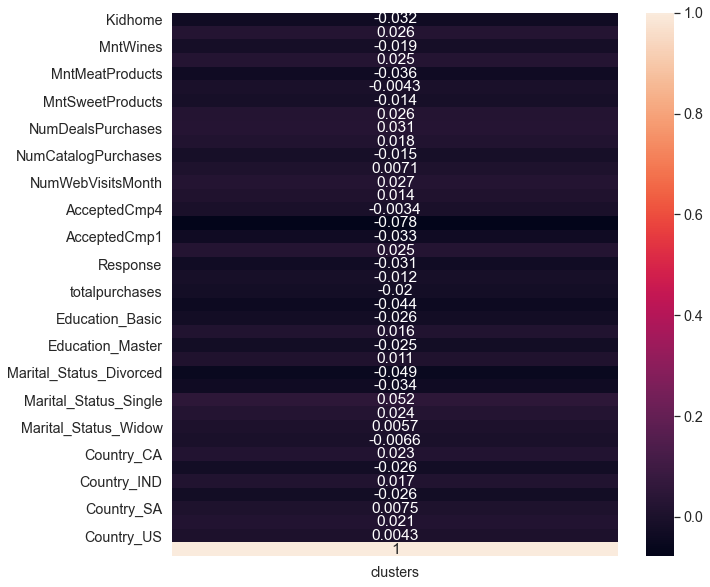

In [48]:
sns.heatmap(df.corr()[['clusters']],annot=True)

In [49]:
df.groupby('clusters').describe()[[ 'MntWines', 'MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].transpose()

clusters                        0           1            2            3   \
MntWines         count   71.000000   68.000000    66.000000    75.000000   
                 mean   142.253521   13.897059   507.106061   213.866667   
                 std    171.857642   16.371745   262.533756   246.800627   
                 min      4.000000    0.000000    66.000000     5.000000   
                 25%     30.000000    3.750000   346.750000    52.000000   
                 50%     87.000000    9.000000   486.000000   117.000000   
                 75%    184.500000   17.500000   726.500000   238.000000   
                 max    853.000000  101.000000  1200.000000  1166.000000   
MntFruits        count   71.000000   68.000000    66.000000    75.000000   
                 mean     4.422535    5.367647    24.181818     8.360000   
                 std      6.209812    8.655780    23.947320    15.113659   
                 min      0.000000    0.000000     0.000000     0.000000   
                 25%      0.000000    1.000000     7.000000     0.000000   
                 50%      2.000000    3.000000    17.000000     2.000000   
                 75%      6.000000    7.000000    34.250000     8.000000   
                 max     36.000000   47.000000    81.000000    65.000000   
MntMeatProducts  count   71.000000   68.000000    66.000000    75.000000   
                 mean    47.140845   16.558824   159.787879    58.066667   
                 std     42.885661   17.014816   101.515821    65.356059   
                 min      3.000000    1.000000    16.000000     3.000000   
                 25%     10.000000    6.750000    74.000000    14.000000   
                 50%     40.000000   12.000000   127.500000    33.000000   
                 75%     69.500000   19.250000   227.000000    82.000000   
                 max    234.000000   96.000000   435.000000   359.000000   
MntFishProducts  count   71.000000   68.000000    66.000000    75.000000   
                 mean     8.366197    7.426471    26.439394    13.453333   
                 std     14.228984   11.294321    28.674367    22.072542   
                 min      0.000000    0.000000     0.000000     0.000000   
                 25%      0.000000    1.500000     8.500000     0.000000   
                 50%      4.000000    3.000000    16.000000     4.000000   
                 75%     10.000000   10.000000    32.750000    13.000000   
                 max     86.000000   78.000000   120.000000    98.000000   
MntSweetProducts count   71.000000   68.000000    66.000000    75.000000   
                 mean     4.647887    6.264706    24.000000     8.746667   
                 std      9.461348    7.552044    23.333040    15.860109   
                 min      0.000000    0.000000     0.000000     0.000000   
                 25%      0.000000    1.750000     7.000000     0.000000   
                 50%      2.000000    3.000000    16.000000     2.000000   
                 75%      6.000000    9.000000    35.750000     9.000000   
                 max     72.000000   40.000000    80.000000    71.000000   
MntGoldProds     count   71.000000   68.000000    66.000000    75.000000   
                 mean    24.154930   13.573529    34.196970    27.160000   
                 std     28.673356   15.212246    24.245044    30.073352   
                 min      1.000000    0.000000     0.000000     0.000000   
                 25%      5.000000    3.000000    11.000000     6.000000   
                 50%     14.000000    9.000000    30.000000    18.000000   
                 75%     30.000000   18.500000    56.250000    38.500000   
                 max    124.000000   85.000000    81.000000   125.000000   

clusters                         4           5          6            7   \
MntWines         count    21.000000   84.000000  35.000000    48.000000   
                 mean    792.809524   47.904762   6.114286   350.333333   
                 std     301.026680   61.766100   

In [50]:
df.groupby('clusters').describe()[[ 'totalpurchases','Income']].transpose()

clusters                        0             1             2             3   \
totalpurchases count     71.000000     68.000000     66.000000     75.000000   
               mean     230.985915     63.088235    775.712121    329.653333   
               std      224.489675     59.905830    320.575721    315.056558   
               min       15.000000     11.000000    108.000000     17.000000   
               25%       62.500000     27.750000    516.250000     96.000000   
               50%      180.000000     47.000000    746.500000    257.000000   
               75%      305.500000     70.500000   1007.750000    441.000000   
               max     1049.000000    324.000000   1485.000000   1250.000000   
Income         count     71.000000     68.000000     66.000000     75.000000   
               mean   44226.816901  26390.161765  65953.106061  52019.070307   
               std      693.576699    711.095720    892.757218    700.398035   
               min    42997.000000  25130.000000  64325.000000  50785.000000   
               25%    43639.500000  25814.500000  65310.000000  51411.500000   
               50%    44322.000000  26490.000000  65747.500000  52190.000000   
               75%    44856.500000  27046.250000  66549.500000  52289.625677   
               max    45207.000000  27469.000000  67680.000000  53374.000000   

clusters                        4             5             6             7   \
totalpurchases count     21.000000     84.000000     35.000000     48.000000   
               mean    1245.857143    101.571429     51.771429    547.562500   
               std      380.017011    109.862925     25.020093    312.783720   
               min      523.000000     11.000000     16.000000     18.000000   
               25%     1062.000000     38.750000     31.000000    289.000000   
               50%     1315.000000     61.500000     49.000000    507.000000   
               75%     1615.000000    109.250000     64.500000    773.750000   
               max     1722.000000    488.000000    106.000000   1277.000000   
Income         count     21.000000     84.000000     35.000000     48.000000   
               mean   85709.809524  36390.404762  14777.685714  60040.187500   
               std     2361.130209    663.720766   1035.238585    728.433956   
               min    82733.000000  35178.000000  12393.000000  58917.000000   
               25%    83790.000000  35844.250000  14116.500000  59377.250000   
               50%    85696.000000  36309.000000  15033.000000  59986.500000   
               75%    86580.000000  36957.500000  15330.000000  60546.500000   
               max    90933.000000  37509.000000  16269.000000  61331.000000   

clusters                        8             9   ...            15  \
totalpurchases count     30.000000     56.000000  ...     55.000000   
               mean    1105.633333     77.607143  ...    901.745455   
               std      276.086753     77.671728  ...    350.734373   
               min      397.000000     11.000000  ...    227.000000   
               25%      969.000000     33.500000  ...    771.500000   
               50%     1079.500000     47.500000  ...    904.000000   
               75%     1241.750000     81.250000  ...   1091.000000   
               max     1804.000000    351.000000  ...   1598.000000   
Income         count     30.000000     56.000000  ...     55.000000   
               mean   74063.933333  28708.160714  ...  69619.272727   
               std     1408.538737    657.405777  ...   1081.454104   
               min    71969.000000  27573.000000  ...  67893.000000   
               25%    72702.750000  28249.000000  ...  68688.500000   
               50%    74227.500000  28577.000000  ...  69508.000000   
               75%    75205.500000  29302.250000  ...  70555.500000   
               max    76320.000000  29819.000000  ...  71613.000000   

clusters                        16            17            18        

In [51]:
new_df2=pd.pivot_table(data=df, values ='totalpurchases',columns ='clusters',index ='Income')
new_df2

clusters  0   1   2   3       4   5   6   7   8   9   ...  15  16  17  18  19  \
Income                                                ...                       
5305.0   NaN NaN NaN NaN     NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN   
7500.0   NaN NaN NaN NaN     NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN   
8820.0   NaN NaN NaN NaN     NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN   
8940.0   NaN NaN NaN NaN     NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN   
9255.0   NaN NaN NaN NaN     NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN   
...       ..  ..  ..  ..     ...  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..   
86836.0  NaN NaN NaN NaN   557.0 NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN   
87171.0  NaN NaN NaN NaN  1298.0 NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN   
89694.0  NaN NaN NaN NaN  1472.0 NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN   
90247.0  NaN NaN NaN NaN  1621.0 NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN   
90933.0  NaN NaN NaN NaN  1685.0 NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN   

clusters  20  21  22  23  24  
Income                        
5305.0   NaN NaN NaN NaN NaN  
7500.0   NaN NaN NaN NaN NaN  
8820.0   NaN NaN NaN NaN NaN  
8940.0   NaN NaN NaN NaN NaN  
9255.0   NaN NaN NaN NaN NaN  
...       ..  ..  ..  ..  ..  
86836.0  NaN NaN NaN NaN NaN  
87171.0  NaN NaN NaN NaN NaN  
89694.0  NaN NaN NaN NaN NaN  
90247.0  NaN NaN NaN NaN NaN  
90933.0  NaN NaN NaN NaN NaN  

[1350 rows x 25 columns]

<AxesSubplot:xlabel='clusters', ylabel='Income'>

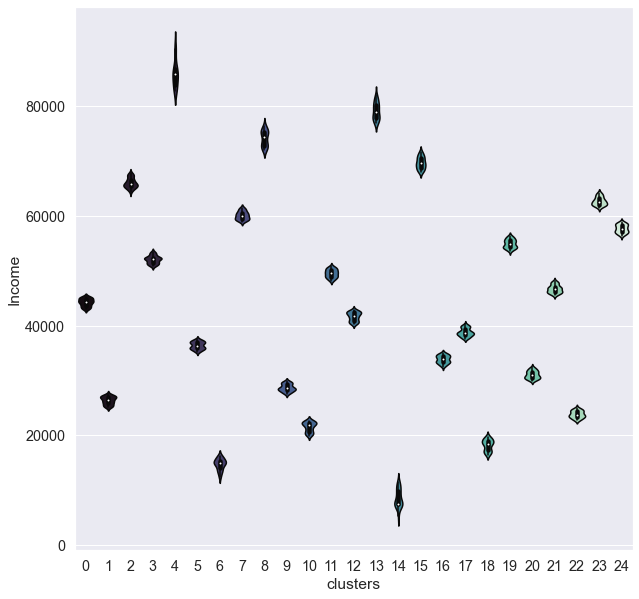

In [52]:
sns.violinplot(y='Income',x='clusters',data=df,palette='mako')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 85.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 85.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 78.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 86.9% of the points

<AxesSubplot:xlabel='clusters', ylabel='Income'>

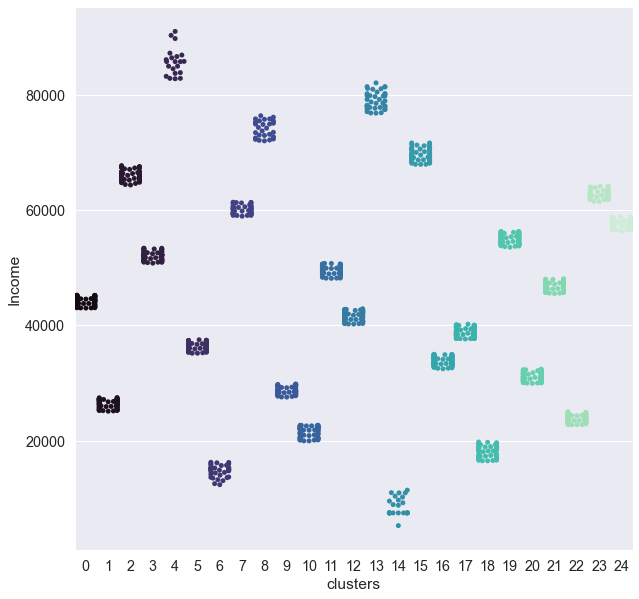

In [53]:

sns.swarmplot(y='Income',x='clusters',data=df,palette='mako')

<AxesSubplot:xlabel='clusters', ylabel='totalpurchases'>

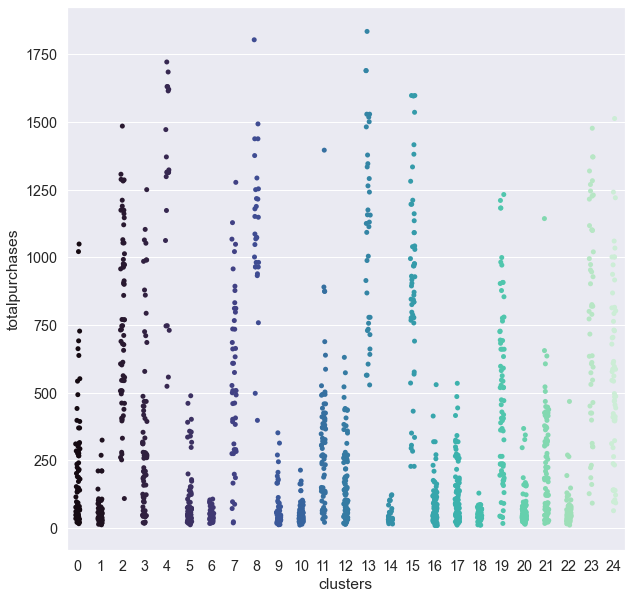

In [54]:
sns.stripplot(y='totalpurchases',x='clusters',data=df,palette='mako')

In [55]:
df[(df['clusters']==(0))][['Income','totalpurchases']].describe()

Income  totalpurchases
count     71.000000       71.000000
mean   44226.816901      230.985915
std      693.576699      224.489675
min    42997.000000       15.000000
25%    43639.500000       62.500000
50%    44322.000000      180.000000
75%    44856.500000      305.500000
max    45207.000000     1049.000000

In [56]:
df[(df['clusters']==(2))][['Income','totalpurchases']].describe()

Income  totalpurchases
count     66.000000       66.000000
mean   65953.106061      775.712121
std      892.757218      320.575721
min    64325.000000      108.000000
25%    65310.000000      516.250000
50%    65747.500000      746.500000
75%    66549.500000     1007.750000
max    67680.000000     1485.000000

In [57]:
df[(df['clusters']==(3))][['Income','totalpurchases']].describe()

Income  totalpurchases
count     75.000000       75.000000
mean   52019.070307      329.653333
std      700.398035      315.056558
min    50785.000000       17.000000
25%    51411.500000       96.000000
50%    52190.000000      257.000000
75%    52289.625677      441.000000
max    53374.000000     1250.000000

In [58]:
df[(df['clusters']==(7))][['Income','totalpurchases']].describe()

Income  totalpurchases
count     48.000000        48.00000
mean   60040.187500       547.56250
std      728.433956       312.78372
min    58917.000000        18.00000
25%    59377.250000       289.00000
50%    59986.500000       507.00000
75%    60546.500000       773.75000
max    61331.000000      1277.00000

In [59]:
df[(df['clusters']==(8))][['Income','totalpurchases']].describe()

Income  totalpurchases
count     30.000000       30.000000
mean   74063.933333     1105.633333
std     1408.538737      276.086753
min    71969.000000      397.000000
25%    72702.750000      969.000000
50%    74227.500000     1079.500000
75%    75205.500000     1241.750000
max    76320.000000     1804.000000

In [60]:
df[(df['clusters']==(9))][['Income','totalpurchases']].describe()

Income  totalpurchases
count     56.000000       56.000000
mean   28708.160714       77.607143
std      657.405777       77.671728
min    27573.000000       11.000000
25%    28249.000000       33.500000
50%    28577.000000       47.500000
75%    29302.250000       81.250000
max    29819.000000      351.000000

In [61]:
df[(df['clusters']==(11))][['Income','totalpurchases']].describe()

Income  totalpurchases
count     73.000000       73.000000
mean   49494.027397      319.424658
std      740.756520      238.497200
min    48150.000000       20.000000
25%    48904.000000      135.000000
50%    49544.000000      315.000000
75%    50127.000000      411.000000
max    50737.000000     1396.000000

In [62]:
df[(df['clusters']==(19))][['Income','totalpurchases']].describe()

Income  totalpurchases
count     77.000000       77.000000
mean   54901.883117      472.311688
std      772.569840      317.768505
min    53537.000000       16.000000
25%    54210.000000      203.000000
50%    54809.000000      418.000000
75%    55563.000000      682.000000
max    56253.000000     1232.000000

In [63]:
df[(df['clusters']==(20))][['Income','totalpurchases']].describe()

Income  totalpurchases
count     83.000000       83.000000
mean   31067.746988       73.325301
std      696.884195       69.589933
min    29938.000000       13.000000
25%    30492.000000       37.500000
50%    30992.000000       51.000000
75%    31620.500000       75.500000
max    32414.000000      367.000000

In [64]:
df[(df['clusters']==(5))][['Income','totalpurchases']].describe()

Income  totalpurchases
count     84.000000       84.000000
mean   36390.404762      101.571429
std      663.720766      109.862925
min    35178.000000       11.000000
25%    35844.250000       38.750000
50%    36309.000000       61.500000
75%    36957.500000      109.250000
max    37509.000000      488.000000

In [65]:
df[(df['clusters']==(12))][['Income','totalpurchases']].describe()

Income  totalpurchases
count     91.000000       91.000000
mean   41658.527473      167.186813
std      805.846916      143.750781
min    40233.000000       13.000000
25%    40869.000000       58.000000
50%    41769.000000      120.000000
75%    42390.000000      252.000000
max    42873.000000      630.000000

In [66]:
df[(df['clusters']==(8))]

Kidhome  Teenhome  MntWines  MntFruits  MntMeatProducts  \
47        0.0       1.0     670.0        9.0            249.0   
48        0.0       1.0     158.0       35.0            179.0   
94        0.0       1.0     180.0       32.0            348.0   
225       0.0       0.0    1001.0       12.0            240.0   
300       0.0       0.0     712.0       26.0            538.0   
301       0.0       0.0     712.0       26.0            538.0   
577       0.0       0.0     795.0        0.0            545.0   
622       0.0       1.0     438.0       66.0            400.0   
641       1.0       0.0     800.0        0.0            297.0   
794       0.0       1.0     707.0       20.0            171.0   
912       0.0       0.0     571.0       12.0            523.0   
1082      1.0       1.0     505.0       72.0            270.0   
1083      1.0       1.0     505.0       72.0            270.0   
1092      0.0       1.0     526.0       35.0            214.0   
1177      0.0       0.0     625.0       35.0            169.0   
1235      0.0       0.0     390.0       22.0            323.0   
1236      0.0       0.0     390.0       22.0            323.0   
1278      0.0       0.0     377.0       10.0            540.0   
1334      0.0       1.0     707.0       21.0            250.0   
1354      0.0       1.0    1000.0        0.0             76.0   
1525      0.0       1.0    1115.0       12.0            128.0   
1577      0.0       1.0    1121.0        0.0             72.0   
1680      0.0       1.0     952.0       12.0            180.0   
1749      1.0       1.0     650.0       28.0            353.0   
1783      0.0       0.0     400.0       32.0            519.0   
1887      0.0       1.0     583.0       34.0            309.0   
1923      0.0       0.0    1142.0       51.0            415.0   
1941      0.0       0.0     741.0       19.0            154.0   
1978      0.0       0.0     631.0       28.0            491.0   
2113      0.0       0.0     272.0        7.0             80.0   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
47                0.0              28.0           9.0                2.0   
48                0.0               0.0         125.0                2.0   
94               76.0              32.0          90.0                2.0   
225              16.0              12.0          12.0                1.0   
300              69.0              13.0          80.0                1.0   
301              69.0              13.0          80.0                1.0   
577              95.0              58.0           0.0                1.0   
622              12.0              38.0         114.0                1.0   
641               0.0              34.0          57.0                2.0   
794              65.0              60.0          50.0                1.0   
912              63.0              60.0          24.0                1.0   
1082             36.0              27.0          54.0                4.0   
1083             36.0              27.0          54.0                4.0   
1092             69.0              53.0          35.0                2.0   
1177             58.0              17.0          35.0                1.0   
1235            104.0              35.0         107.0                1.0   
1236            104.0              35.0         107.0                1.0   
1278             80.0              30.0          10.0                1.0   
1334             85.0              43.0          73.0                2.0   
1354              0.0               0.0          10.0                3.0   
1525             33.0              12.0          76.0                1.0   
1577              0.0              12.0          12.0                4.0   
1680             47.0              12.0          12.0                2.0   
1749             45.0              42.0          30.0                5.0   
1783             71.0              75.0          54.0                1.0   
1887          

In [67]:
df[(df['clusters']==(2))]

Kidhome  Teenhome  MntWines  MntFruits  MntMeatProducts  \
2         0.0       1.0     134.0       11.0             59.0   
8         0.0       1.0     384.0        0.0            102.0   
9         0.0       1.0     384.0        0.0            102.0   
30        1.0       1.0     155.0        7.0             80.0   
41        0.0       1.0    1200.0        0.0            204.0   
...       ...       ...       ...        ...              ...   
2091      0.0       0.0     444.0       44.0            382.0   
2096      0.0       1.0     162.0       31.0            127.0   
2162      0.0       1.0     346.0       17.0             48.0   
2176      0.0       1.0     397.0       46.0            288.0   
2235      0.0       1.0     372.0       18.0            126.0   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
2                15.0               2.0          30.0                1.0   
8                21.0              32.0           5.0                3.0   
9                21.0              32.0           5.0                3.0   
30               13.0               7.0          10.0                3.0   
41               38.0              29.0          14.0                3.0   
...               ...               ...           ...                ...   
2091             11.0               8.0          17.0                1.0   
2096              8.0              17.0          69.0                2.0   
2162             23.0              13.0          13.0                4.0   
2176             20.0              38.0          70.0                2.0   
2235             47.0              48.0          78.0                2.0   

      NumWebPurchases  ...  Marital_Status_Widow  Marital_Status_YOLO  \
2                 3.0  ...                     0                    0   
8                 6.0  ...                     0                    0   
9                 6.0  ...                     0                    0   
30                5.0  ...                     0                    0   
41               11.0  ...                     0                    0   
...               ...  ...                   ...                  ...   
2091              3.0  ...                     0                    0   
2096              4.0  ...                     0                    0   
2162              8.0  ...                     0                    0   
2176              6.0  ...                     0                    0   
2235              5.0  ...                     0                    0   

      Country_CA  Country_GER  Country_IND  Country_ME  Country_SA  \
2              0            0            0           0           0   
8              0            0            0           0           0   
9              0            0            1           0           0   
30             0            0            0           0           0   
41             0            0            0           0           0   
...          ...          ...          ...         ...         ...   
2091           0            0            0           0           0   
2096           0            0            0           0           0   
2162           1            0            0           0           0   
2176           0            0            0           0           0   
2235           0            0            0           0           0   

      Country_SP  Country_US  clusters  
2              0           1         2  
8              0           1         2  
9              0           0         2  
30             1           0         2  
41             1           0         2  
...          ...         ...       ...  
2091           1           0         2  
2096           1           0         2  
2162           0           0         2  
2176           1           0         2  
2235           0           1         2  

[66 rows x 40 columns]

In [68]:
df[(df['clusters']==(19))]

Kidhome  Teenhome  MntWines  MntFruits  MntMeatProducts  \
15        1.0       1.0      63.0        6.0             57.0   
16        1.0       1.0      63.0        6.0             57.0   
90        0.0       1.0      42.0       11.0             57.0   
99        0.0       1.0     154.0       22.0            202.0   
110       0.0       1.0     399.0        4.0             30.0   
...       ...       ...       ...        ...              ...   
2046      0.0       1.0     208.0        7.0             82.0   
2136      0.0       1.0     263.0        5.0            233.0   
2184      0.0       1.0     136.0        1.0             12.0   
2189      0.0       1.0     267.0        6.0             54.0   
2205      0.0       1.0     199.0       12.0             31.0   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
15               13.0              13.0          22.0                4.0   
16               13.0              13.0          22.0                4.0   
90               10.0              28.0          14.0                1.0   
99               39.0              30.0           8.0                5.0   
110               6.0               4.0          30.0                3.0   
...               ...               ...           ...                ...   
2046             30.0              66.0          35.0                2.0   
2136             69.0              41.0          83.0                4.0   
2184              0.0               3.0          32.0                2.0   
2189              8.0               3.0          50.0                2.0   
2205              3.0              12.0           7.0                1.0   

      NumWebPurchases  ...  Marital_Status_Widow  Marital_Status_YOLO  \
15                2.0  ...                     0                    0   
16                2.0  ...                     0                    0   
90                1.0  ...                     0                    0   
99                4.0  ...                     0                    0   
110               7.0  ...                     0                    0   
...               ...  ...                   ...                  ...   
2046              3.0  ...                     0                    0   
2136              5.0  ...                     0                    0   
2184              4.0  ...                     0                    0   
2189              5.0  ...                     1                    0   
2205              3.0  ...                     0                    0   

      Country_CA  Country_GER  Country_IND  Country_ME  Country_SA  \
15             0            0            0           0           0   
16             0            0            0           0           0   
90             1            0            0           0           0   
99             0            0            0           0           0   
110            0            0            0           0           0   
...          ...          ...          ...         ...         ...   
2046           0            0            0           0           0   
2136           0            0            0           0           1   
2184           0            0            0           0           0   
2189           0            0            0           0           0   
2205           0            0            0           0           0   

      Country_SP  Country_US  clusters  
15             1           0        19  
16             1           0        19  
90             0           0        19  
99             1           0        19  
110            1           0        19  
...          ...         ...       ...  
2046           1           0        19  
2136           0           0        19  
2184           1           0        19  
2189           1           0        19  
2205           1           0        19  

[77 rows x 40 columns]

In [69]:
df[(df['clusters']==(22))]

Kidhome  Teenhome  MntWines  MntFruits  MntMeatProducts  \
86        0.0       0.0       1.0        8.0              6.0   
87        1.0       1.0      20.0        3.0             16.0   
92        1.0       1.0       4.0        1.0              7.0   
165       0.0       0.0      16.0       36.0             21.0   
178       1.0       0.0      14.0        7.0             11.0   
212       2.0       0.0       3.0        2.0              8.0   
311       0.0       0.0       4.0       24.0             11.0   
377       1.0       0.0       6.0       10.0             12.0   
390       1.0       0.0       5.0        3.0              4.0   
677       0.0       0.0      19.0        3.0              6.0   
690       1.0       0.0      16.0       17.0             19.0   
758       1.0       0.0       3.0        6.0              7.0   
894       1.0       0.0      38.0       15.0             54.0   
915       1.0       0.0       5.0        1.0              8.0   
916       1.0       0.0       5.0        1.0              8.0   
1019      1.0       0.0      18.0        0.0              4.0   
1039      1.0       0.0       4.0       19.0              9.0   
1062      1.0       0.0       2.0        1.0             18.0   
1163      0.0       0.0      28.0        6.0             27.0   
1190      1.0       0.0       1.0        4.0             10.0   
1191      1.0       0.0       1.0        4.0             10.0   
1194      1.0       0.0       6.0        0.0              3.0   
1337      1.0       0.0       2.0        4.0              2.0   
1463      1.0       0.0      22.0        0.0              6.0   
1486      1.0       0.0       5.0       23.0             15.0   
1504      1.0       0.0       7.0        2.0              8.0   
1513      1.0       0.0      19.0        3.0             19.0   
1523      0.0       1.0       9.0        7.0             13.0   
1536      1.0       0.0      14.0        1.0             21.0   
1593      1.0       0.0      13.0        2.0             18.0   
1610      1.0       0.0       2.0        0.0              6.0   
1622      1.0       0.0       2.0        8.0              8.0   
1627      0.0       0.0       0.0        0.0              1.0   
1696      1.0       0.0      14.0        1.0              7.0   
1697      1.0       0.0      14.0        1.0              7.0   
1713      1.0       0.0       6.0        3.0             14.0   
1723      1.0       0.0       4.0       22.0             11.0   
1787      1.0       0.0       9.0        1.0              6.0   
1815      1.0       0.0      16.0       12.0             18.0   
1852      1.0       1.0       8.0        3.0              9.0   
1869      1.0       0.0       1.0        6.0              2.0   
1874      0.0       0.0       4.0        6.0              8.0   
1892      1.0       0.0      27.0        2.0             14.0   
1933      0.0       0.0      10.0        7.0             25.0   
1972      1.0       0.0      25.0        5.0             19.0   
2044      1.0       0.0      53.0        3.0             49.0   
2085      1.0       0.0       5.0       36.0              7.0   
2117      1.0       0.0       1.0        3.0              6.0   
2118      1.0       0.0       1.0        3.0              6.0   
2120      0.0       0.0       8.0        9.0              9.0   
2194      1.0       0.0      28.0       34.0             62.0   
2198      1.0       0.0       6.0        6.0             29.0   
2200      1.0       0.0     104.0       20.0            101.0   
2202      1.0       1.0      35.0        0.0             11.0   
2203      1.0       0.0       8.0        4.0             10.0   
2220      0.0       0.0      73.0       28.0            217.0   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
86                4.0               8.0          16.0                1.0   
87                0.0               4.0           1.0                3.0   
92                2.0               1.0           2.0                2.0

In [70]:
df[(df['clusters']==(6))]

Kidhome  Teenhome  MntWines  MntFruits  MntMeatProducts  \
50        1.0       0.0      13.0        3.0              8.0   
206       1.0       0.0      16.0        5.0             30.0   
296       0.0       0.0       1.0        2.0              5.0   
318       1.0       0.0       1.0        3.0              3.0   
541       1.0       0.0      11.0        0.0              5.0   
601       1.0       0.0       1.0        1.0              4.0   
626       0.0       0.0       7.0        4.0             13.0   
627       0.0       0.0       7.0        4.0             13.0   
675       0.0       0.0       2.0        0.0              7.0   
843       0.0       0.0       0.0        4.0              5.0   
876       0.0       0.0       5.0        6.0             15.0   
896       1.0       0.0      21.0        2.0             28.0   
920       0.0       0.0       2.0        7.0             11.0   
958       1.0       1.0       3.0        9.0              4.0   
985       1.0       0.0       2.0        7.0              5.0   
1005      1.0       0.0      12.0        3.0              8.0   
1074      1.0       1.0       9.0        4.0             17.0   
1171      1.0       0.0       5.0        2.0             16.0   
1188      0.0       1.0       3.0        3.0              3.0   
1373      1.0       0.0       1.0        2.0              8.0   
1374      1.0       0.0       1.0        2.0              8.0   
1568      1.0       0.0       1.0        3.0              2.0   
1598      1.0       0.0       5.0       11.0             16.0   
1612      1.0       0.0       6.0        4.0              9.0   
1694      1.0       0.0      19.0        3.0             18.0   
1716      1.0       1.0       6.0       12.0              3.0   
1727      1.0       0.0      12.0       11.0             10.0   
1824      0.0       0.0       0.0        0.0              2.0   
1940      1.0       0.0       3.0        5.0             14.0   
1950      1.0       1.0       6.0        2.0              9.0   
1953      0.0       0.0       7.0        7.0             14.0   
1999      0.0       0.0       4.0        1.0             11.0   
2100      1.0       0.0       4.0        8.0             11.0   
2101      1.0       0.0      10.0        2.0             15.0   
2172      2.0       0.0       8.0        2.0             15.0   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
50                7.0               4.0          16.0                2.0   
206               8.0               7.0          26.0                3.0   
296               6.0               0.0           3.0                1.0   
318               8.0               1.0          13.0                2.0   
541               2.0               1.0           1.0                1.0   
601              11.0               9.0          10.0                1.0   
626              15.0               8.0          17.0                2.0   
627              15.0               8.0          17.0                2.0   
675               3.0               7.0          10.0                1.0   
843               6.0               0.0           4.0                1.0   
876              11.0               7.0          13.0                1.0   
896               3.0               2.0           9.0                3.0   
920              16.0              12.0          27.0                1.0   
958               7.0               8.0           7.0                4.0   
985               2.0              15.0          27.0                1.0   
1005              8.0               0.0          17.0                2.0   
1074             10.0               2.0           7.0                4.0   
1171              3.0               2.0          19.0                2.0   
1188             15.0               4.0          15.0                1.0   
1373              4.0               3.0          13.0                2.0   
1374              4.0               3.0          13.0                

In [71]:
df[(df['clusters']==(20))]

Kidhome  Teenhome  MntWines  MntFruits  MntMeatProducts  \
17        0.0       1.0      18.0        0.0              2.0   
19        2.0       1.0       5.0        0.0              3.0   
46        1.0       0.0      13.0        3.0              6.0   
85        1.0       0.0       3.0        4.0              7.0   
136       1.0       0.0      33.0        4.0             24.0   
...       ...       ...       ...        ...              ...   
2140      1.0       0.0      15.0        4.0             13.0   
2161      1.0       0.0      19.0        1.0             20.0   
2187      0.0       1.0      35.0        0.0             13.0   
2211      1.0       0.0      62.0        1.0             20.0   
2236      1.0       0.0       5.0       10.0             13.0   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
17                0.0               0.0           2.0                1.0   
19                0.0               0.0           5.0                1.0   
46                6.0               5.0           6.0                1.0   
85               15.0               8.0          11.0                1.0   
136               4.0               2.0           5.0                2.0   
...               ...               ...           ...                ...   
2140              0.0               0.0          19.0                1.0   
2161             16.0              14.0          28.0                2.0   
2187              2.0               0.0           2.0                2.0   
2211              4.0               0.0           7.0                2.0   
2236              3.0               8.0          16.0                1.0   

      NumWebPurchases  ...  Marital_Status_Widow  Marital_Status_YOLO  \
17                1.0  ...                     0                    0   
19                1.0  ...                     0                    0   
46                1.0  ...                     0                    0   
85                1.0  ...                     0                    0   
136               3.0  ...                     0                    0   
...               ...  ...                   ...                  ...   
2140              1.0  ...                     0                    0   
2161              3.0  ...                     0                    0   
2187              2.0  ...                     0                    0   
2211              2.0  ...                     0                    0   
2236              1.0  ...                     0                    0   

      Country_CA  Country_GER  Country_IND  Country_ME  Country_SA  \
17             0            0            0           0           0   
19             1            0            0           0           0   
46             0            0            0           0           0   
85             0            0            0           0           0   
136            0            0            1           0           0   
...          ...          ...          ...         ...         ...   
2140           0            0            0           0           0   
2161           0            0            0           0           0   
2187           0            0            0           0           0   
2211           1            0            0           0           0   
2236           0            0            0           0           0   

      Country_SP  Country_US  clusters  
17             1           0        20  
19             0           0        20  
46             1           0        20  
85             1           0        20  
136            0           0        20  
...          ...         ...       ...  
2140           1           0        20  
2161           0           0        20  
2187           1           0        20  
2211           0           0        20  
2236           1           0        20  

[83 rows x 40 columns]

In [72]:
df.columns

Index(['Kidhome', 'Teenhome', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Complain', 'totalpurchases', 'Income', 'Education_Basic',
       'Education_Graduation', 'Education_Master', 'Education_PhD',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'Marital_Status_YOLO', 'Country_CA',
       'Country_GER', 'Country_IND', 'Country_ME', 'Country_SA', 'Country_SP',
       'Country_US', 'clusters'],
      dtype='object')

In [73]:
model.predict(scaler.transform([[0,0,0,2000,200,200,100,10000,223,333,344,3334,0,0,1,0,0,0,2,0,15000,44244,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0]]))

array([14])